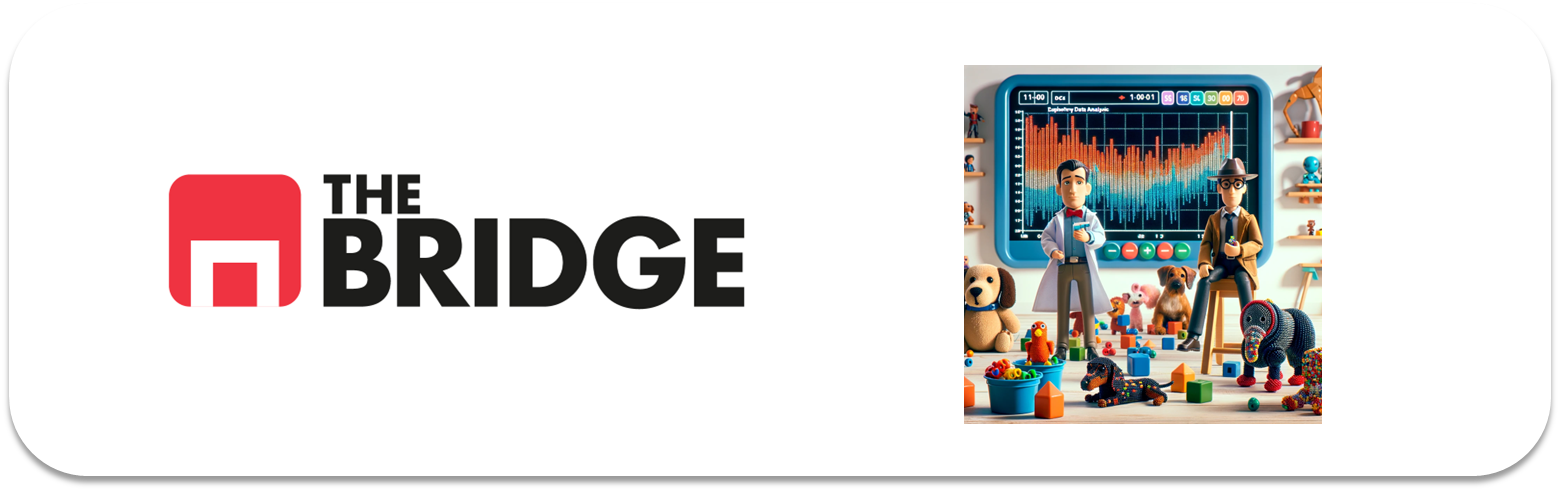

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas # Este módulo lo tienes en el directorio de los notebooks, puede abrirlo y jugar con las funciones que contiene


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [4]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [6]:
df_titanic_2 = df_titanic.copy()
dictionary = ["deck","survived","pclass","embarked"]
df_titanic.drop(columns=dictionary,inplace=True)


In [7]:
df_titanic

sex   age  sibsp  parch     fare   class    who  adult_male  \
0      male  22.0      1      0   7.2500   Third    man        True   
1    female  38.0      1      0  71.2833   First  woman       False   
2    female  26.0      0      0   7.9250   Third  woman       False   
3    female  35.0      1      0  53.1000   First  woman       False   
4      male  35.0      0      0   8.0500   Third    man        True   
..      ...   ...    ...    ...      ...     ...    ...         ...   
886    male  27.0      0      0  13.0000  Second    man        True   
887  female  19.0      0      0  30.0000   First  woman       False   
888  female   NaN      1      2  23.4500   Third  woman       False   
889    male  26.0      0      0  30.0000   First    man        True   
890    male  32.0      0      0   7.7500   Third    man        True   

     embark_town alive  alone  
0    Southampton    no  False  
1      Cherbourg   yes  False  
2    Southampton   yes   True  
3    Southampton   yes  False  
4    Southampton    no   True  
..           ...   ...    ...  
886  Southampton    no   True  
887  Southampton   yes   True  
888  Southampton    no  False  
889    Cherbourg   yes   True  
890   Queenstown    no   True  

[891 rows x 11 columns]

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [9]:
df_titanic["family_members"] = 0
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic_3 = df_titanic.copy()
dictionary = ["parch","sibsp"]
df_titanic.drop(columns=dictionary,inplace=True)
df_titanic

sex   age     fare   class    who  adult_male  embark_town alive  \
0      male  22.0   7.2500   Third    man        True  Southampton    no   
1    female  38.0  71.2833   First  woman       False    Cherbourg   yes   
2    female  26.0   7.9250   Third  woman       False  Southampton   yes   
3    female  35.0  53.1000   First  woman       False  Southampton   yes   
4      male  35.0   8.0500   Third    man        True  Southampton    no   
..      ...   ...      ...     ...    ...         ...          ...   ...   
886    male  27.0  13.0000  Second    man        True  Southampton    no   
887  female  19.0  30.0000   First  woman       False  Southampton   yes   
888  female   NaN  23.4500   Third  woman       False  Southampton    no   
889    male  26.0  30.0000   First    man        True    Cherbourg   yes   
890    male  32.0   7.7500   Third    man        True   Queenstown    no   

     alone  family_members  
0    False               1  
1    False               1  
2     True               0  
3    False               1  
4     True               0  
..     ...             ...  
886   True               0  
887   True               0  
888  False               3  
889   True               0  
890   True               0  

[891 rows x 10 columns]

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [15]:
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(df_titanic["embark_town"].mode()[0])
df_titanic["embark_town"]

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [25]:
df_titanic_4 = df_titanic.copy()



In [27]:
df_titanic["age"][df_titanic["who"]=='man'] = df_titanic["age"][df_titanic["who"]=="man"].fillna(df_titanic["age"][df_titanic["who"]=="man"].mean())


C:\Users\Jorge\AppData\Local\Temp\ipykernel_1032\2780176623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic["age"][df_titanic["who"]=='man'] = df_titanic["age"][df_titanic["who"]=="man"].fillna(df_titanic["age"][df_titanic["who"]=="man"].mean())


0      22.000000
4      35.000000
5      33.173123
6      54.000000
12     20.000000
         ...    
883    28.000000
884    25.000000
886    27.000000
889    26.000000
890    32.000000
Name: age, Length: 537, dtype: float64

In [28]:
df_titanic["age"][df_titanic["who"]=="woman"] = df_titanic["age"][df_titanic["who"]=="woman"].fillna(df_titanic["age"][df_titanic["who"]=="woman"].mean())

C:\Users\Jorge\AppData\Local\Temp\ipykernel_1032\1265933092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic["age"][df_titanic["who"]=="woman"] = df_titanic["age"][df_titanic["who"]=="woman"].fillna(df_titanic["age"][df_titanic["who"]=="woman"].mean())


In [34]:
df_titanic["age"][df_titanic["who"]=="child"] = df_titanic["age"][df_titanic["who"]=="child"].fillna(df_titanic["age"][df_titanic["who"]=="child"].mean())

C:\Users\Jorge\AppData\Local\Temp\ipykernel_1032\789410754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titanic["age"][df_titanic["who"]=="child"] = df_titanic["age"][df_titanic["who"]=="child"].fillna(df_titanic["age"][df_titanic["who"]=="child"].mean())


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [30]:
df_tipificacion = pd.DataFrame([df_titanic.nunique(), df_titanic.nunique()/len(df_titanic) * 100, df_titanic.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
df_tipificacion
df_tipificacion["Clasificada_como"] = "Categorica" # Partiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

Card     %_Card     Tipo   Clasificada_como
sex               2   0.224467   object            Binaria
age              89   9.988777  float64  Numerica Discreta
fare            248  27.833895  float64  Numerica Discreta
class             3     0.3367   object         Categorica
who               3     0.3367   object         Categorica
adult_male        2   0.224467     bool            Binaria
embark_town       3     0.3367   object         Categorica
alive             2   0.224467   object            Binaria
alone             2   0.224467     bool            Binaria
family_members    9   1.010101    int64         Categorica

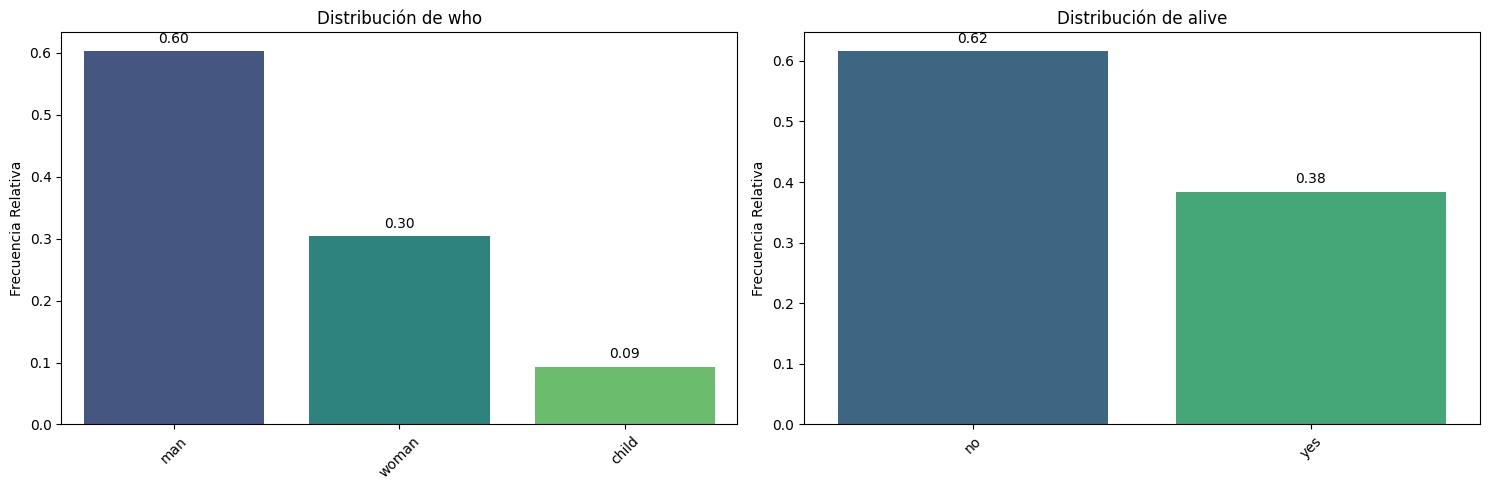

In [35]:
#1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la #supervivencia en el Titanic?¿Y entre ser adulto o ser niño?
pinta_distribucion_categoricas(df_titanic,["who","alive"], relativa= True, mostrar_valores= True)


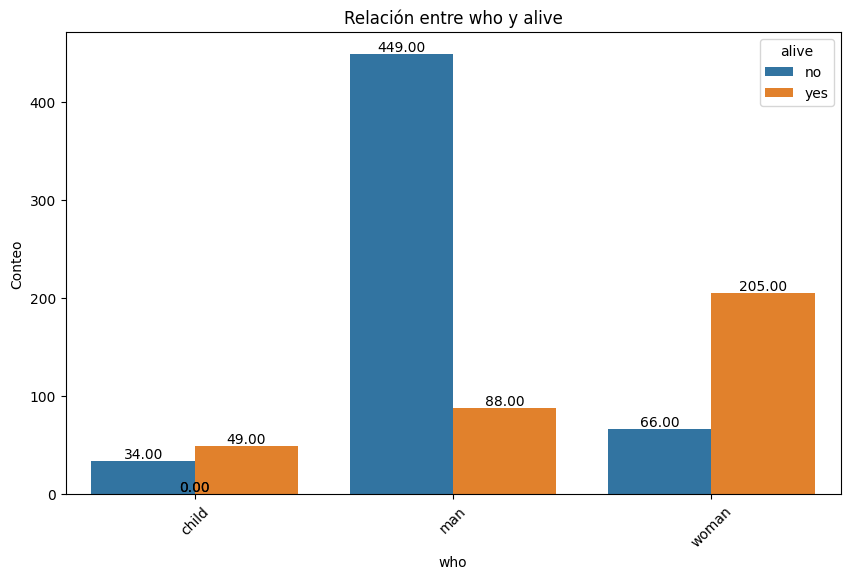

In [36]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)
#En términos absolutos murieron más hombres

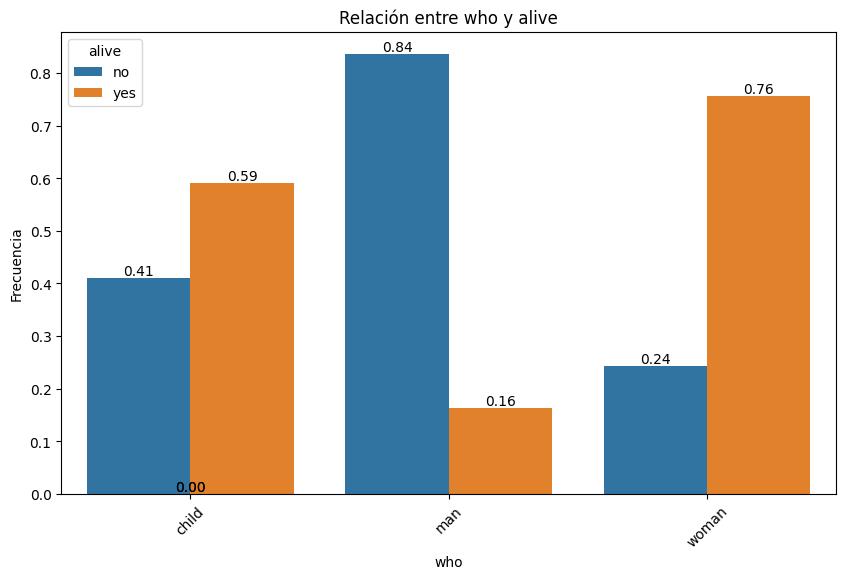

In [37]:
plot_categorical_relationship_fin(df_titanic, "who","alive", relative_freq = True, show_values = True)
#En términos relativos murieron más hombres y niños que mujeres

In [38]:
df_titanic.groupby("who", as_index = False)["alive"].value_counts(normalize = True)

who alive  proportion
0  child   yes    0.590361
1  child    no    0.409639
2    man    no    0.836127
3    man   yes    0.163873
4  woman   yes    0.756458
5  woman    no    0.243542

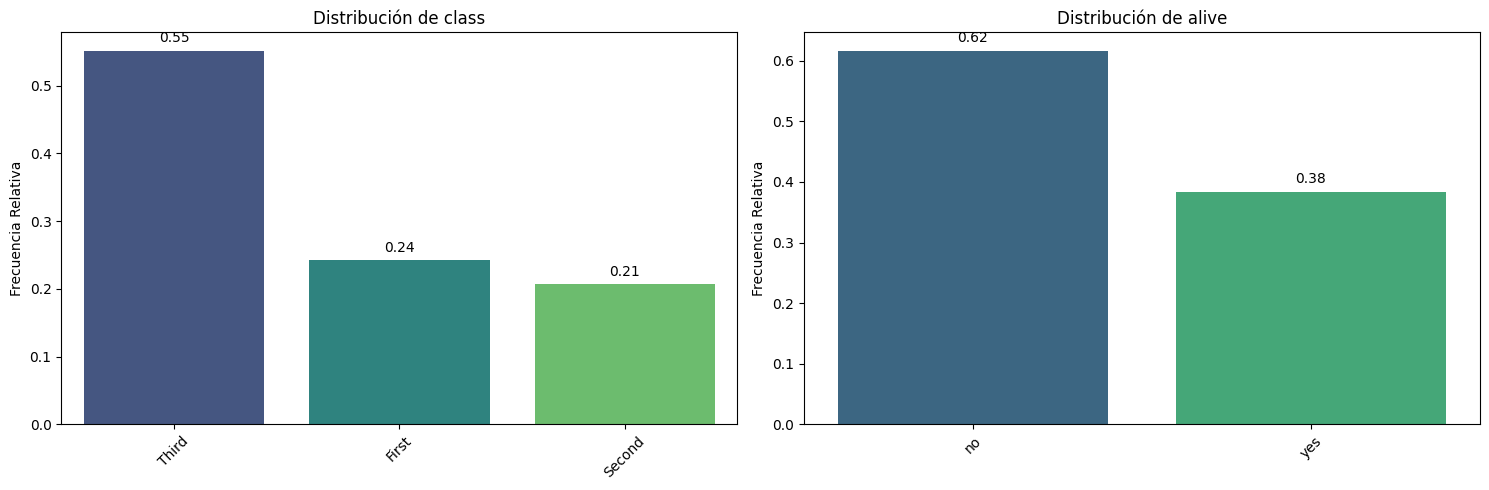

In [40]:
#2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
pinta_distribucion_categoricas(df_titanic,["class","alive"], relativa= True, mostrar_valores= True)

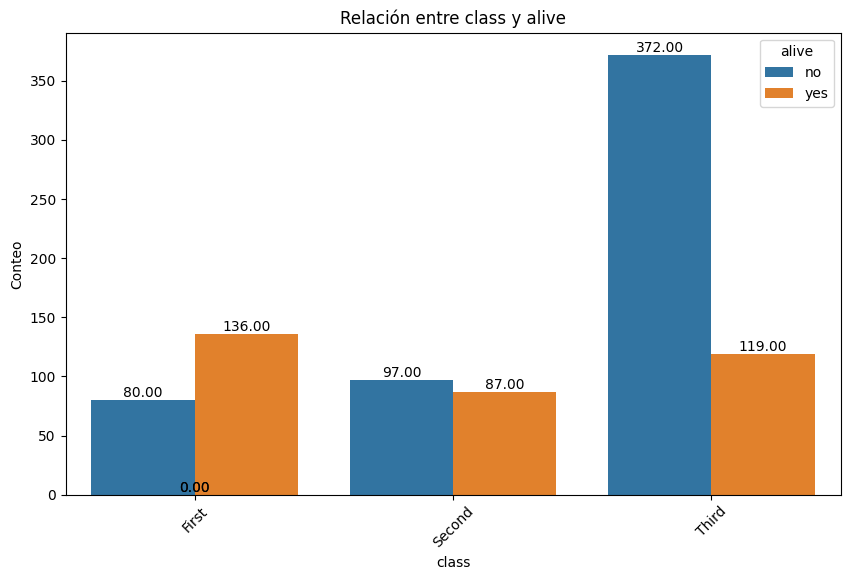

In [41]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values= True)
#En términos absolutos murieron más pasajeros de tercera

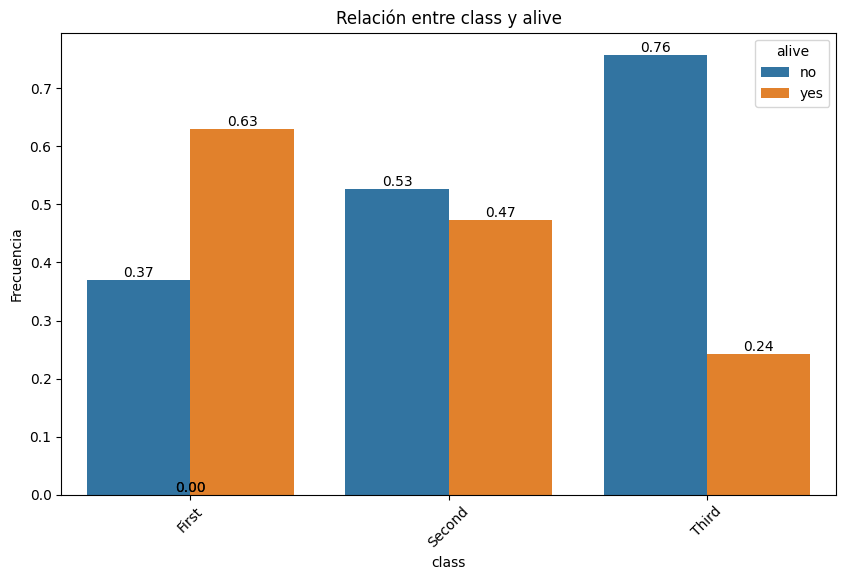

In [42]:
plot_categorical_relationship_fin(df_titanic, "class","alive", relative_freq = True, show_values = True)
#En términos relativos murieon más de tercera y segunda


In [43]:
df_titanic.groupby("class", as_index = False)["alive"].value_counts(normalize = True)

class alive  proportion
0   First   yes    0.629630
1   First    no    0.370370
2  Second    no    0.527174
3  Second   yes    0.472826
4   Third    no    0.757637
5   Third   yes    0.242363

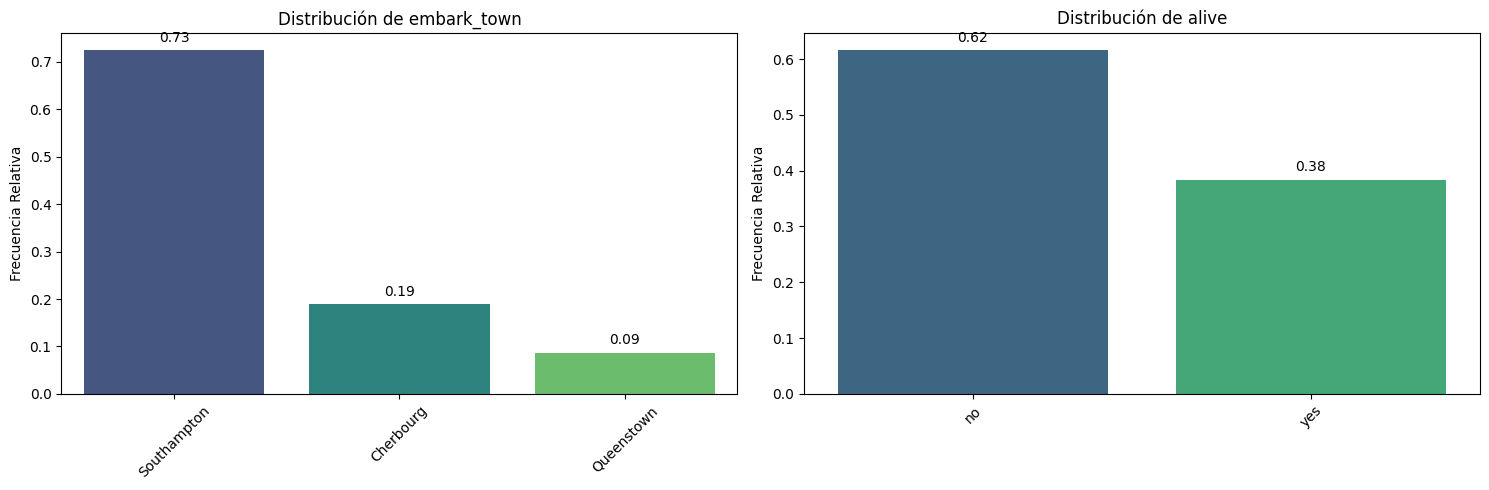

In [45]:
#3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
pinta_distribucion_categoricas(df_titanic,["embark_town","alive"], relativa= True, mostrar_valores= True)


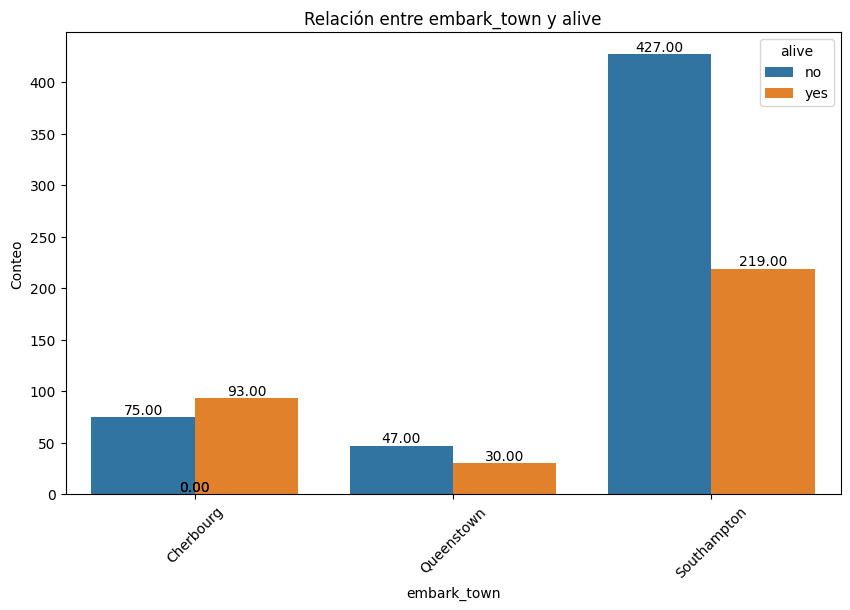

In [44]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)
#En términos absolutos murieron más de Southampton

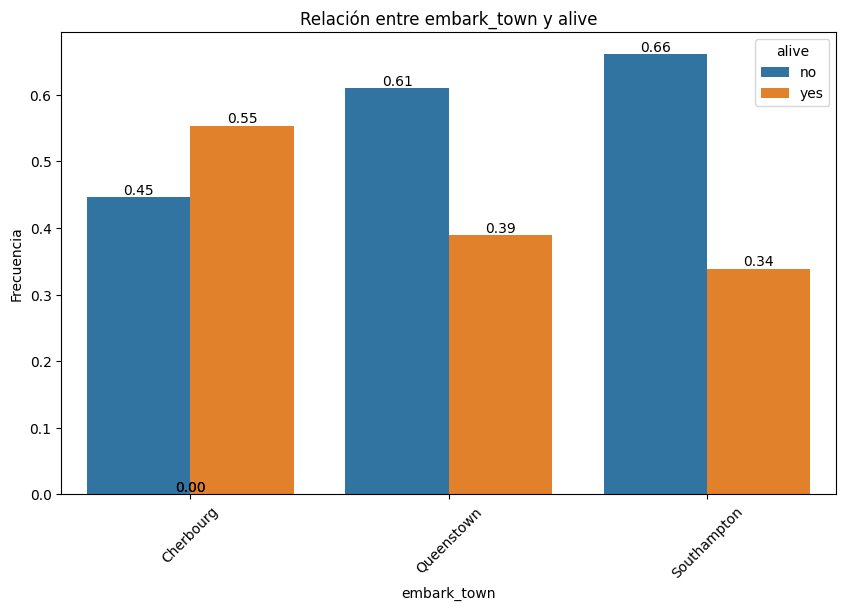

In [46]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", relative_freq = True, show_values = True)
#En términos relativos murieron más de Southampton

In [47]:
df_titanic.groupby("embark_town", as_index = False)["alive"].value_counts(normalize = True)

embark_town alive  proportion
0    Cherbourg   yes    0.553571
1    Cherbourg    no    0.446429
2   Queenstown    no    0.610390
3   Queenstown   yes    0.389610
4  Southampton    no    0.660991
5  Southampton   yes    0.339009

(2,)


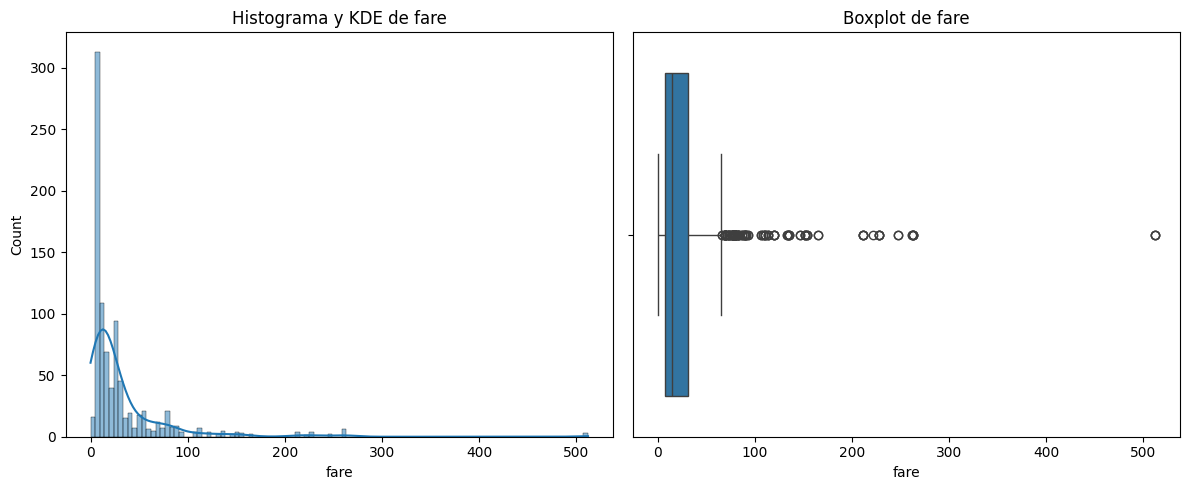

In [55]:
#4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
#pinta_distribucion_categoricas(df_titanic,["fare","alive"], relativa= True, mostrar_valores= True)
plot_combined_graphs(df_titanic,["fare"])

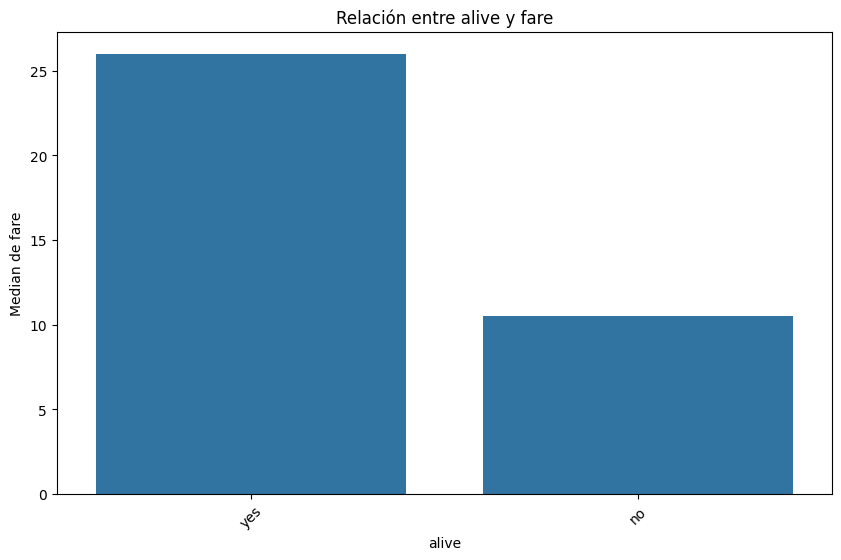

In [51]:
plot_categorical_numerical_relationship(df_titanic,"alive","fare", measure = "median")

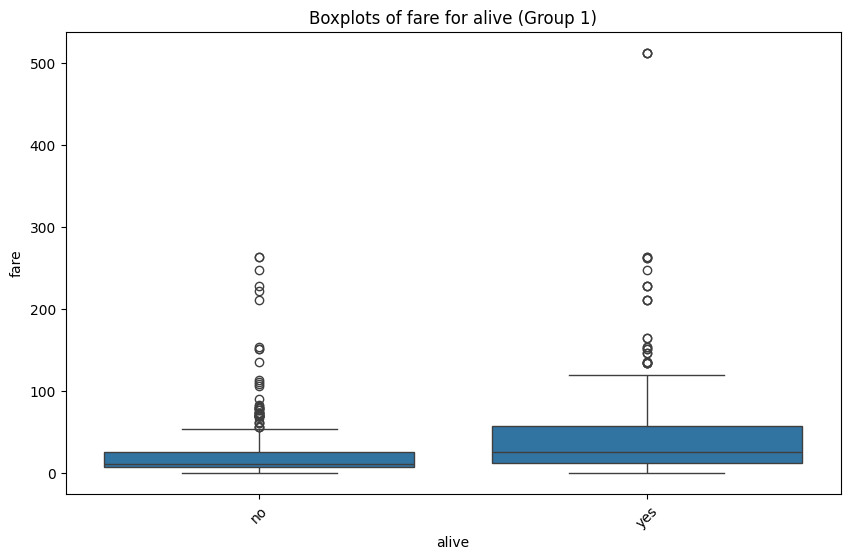

In [52]:
plot_grouped_boxplots(df_titanic,"alive","fare")

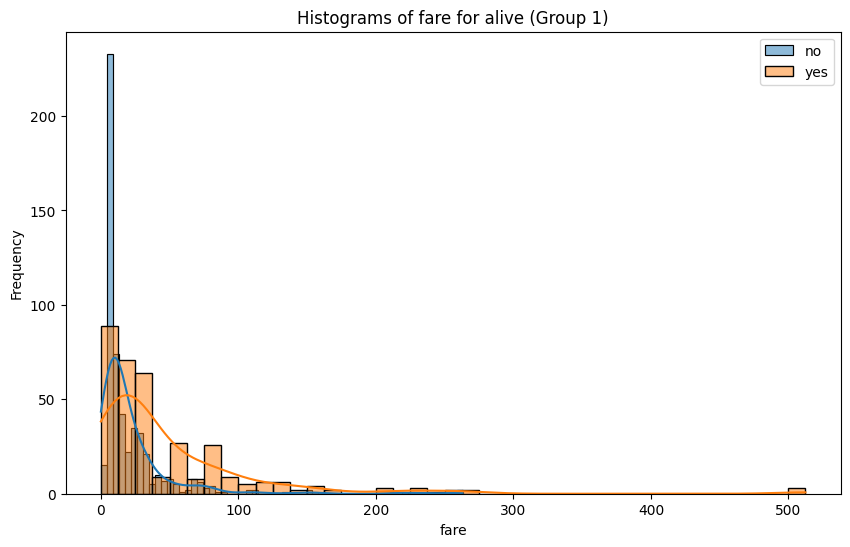

In [53]:
plot_grouped_histograms(df_titanic,"alive", "fare",2)

In [ ]:
#5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
#Los que no pagaron billete eran tripulación
#El hombre que pagó más sobrevivió

In [65]:
#6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.
df_titanic.groupby(["embark_town","fare"], as_index = False)["alive"].value_counts()
#Parece que no existe relación, murieron más de Southampton porque embarcaron más gente allí

embark_town      fare alive  count
0      Cherbourg    4.0125    no      1
1      Cherbourg    6.4375    no      1
2      Cherbourg    7.2250    no      9
3      Cherbourg    7.2250   yes      3
4      Cherbourg    7.2292    no     11
..           ...       ...   ...    ...
337  Southampton  164.8667   yes      2
338  Southampton  211.3375   yes      3
339  Southampton  221.7792    no      1
340  Southampton  263.0000    no      2
341  Southampton  263.0000   yes      2

[342 rows x 4 columns]

In [66]:
df_titanic.groupby(["embark_town"], as_index = False)["alive"].value_counts()


embark_town alive  count
0    Cherbourg   yes     93
1    Cherbourg    no     75
2   Queenstown    no     47
3   Queenstown   yes     30
4  Southampton    no    427
5  Southampton   yes    219

In [67]:
#7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) 
# sobrevivió más en términos absolutos y en términos relativos?
df_titanic.groupby(["class","age"], as_index = False)["alive"].value_counts()



class    age alive  count
0    First   0.92   yes      1
1    First   2.00    no      1
2    First   4.00   yes      1
3    First  11.00   yes      1
4    First  14.00   yes      1
..     ...    ...   ...    ...
265  Third  61.00    no      1
266  Third  63.00   yes      1
267  Third  65.00    no      1
268  Third  70.50    no      1
269  Third  74.00    no      1

[270 rows x 4 columns]

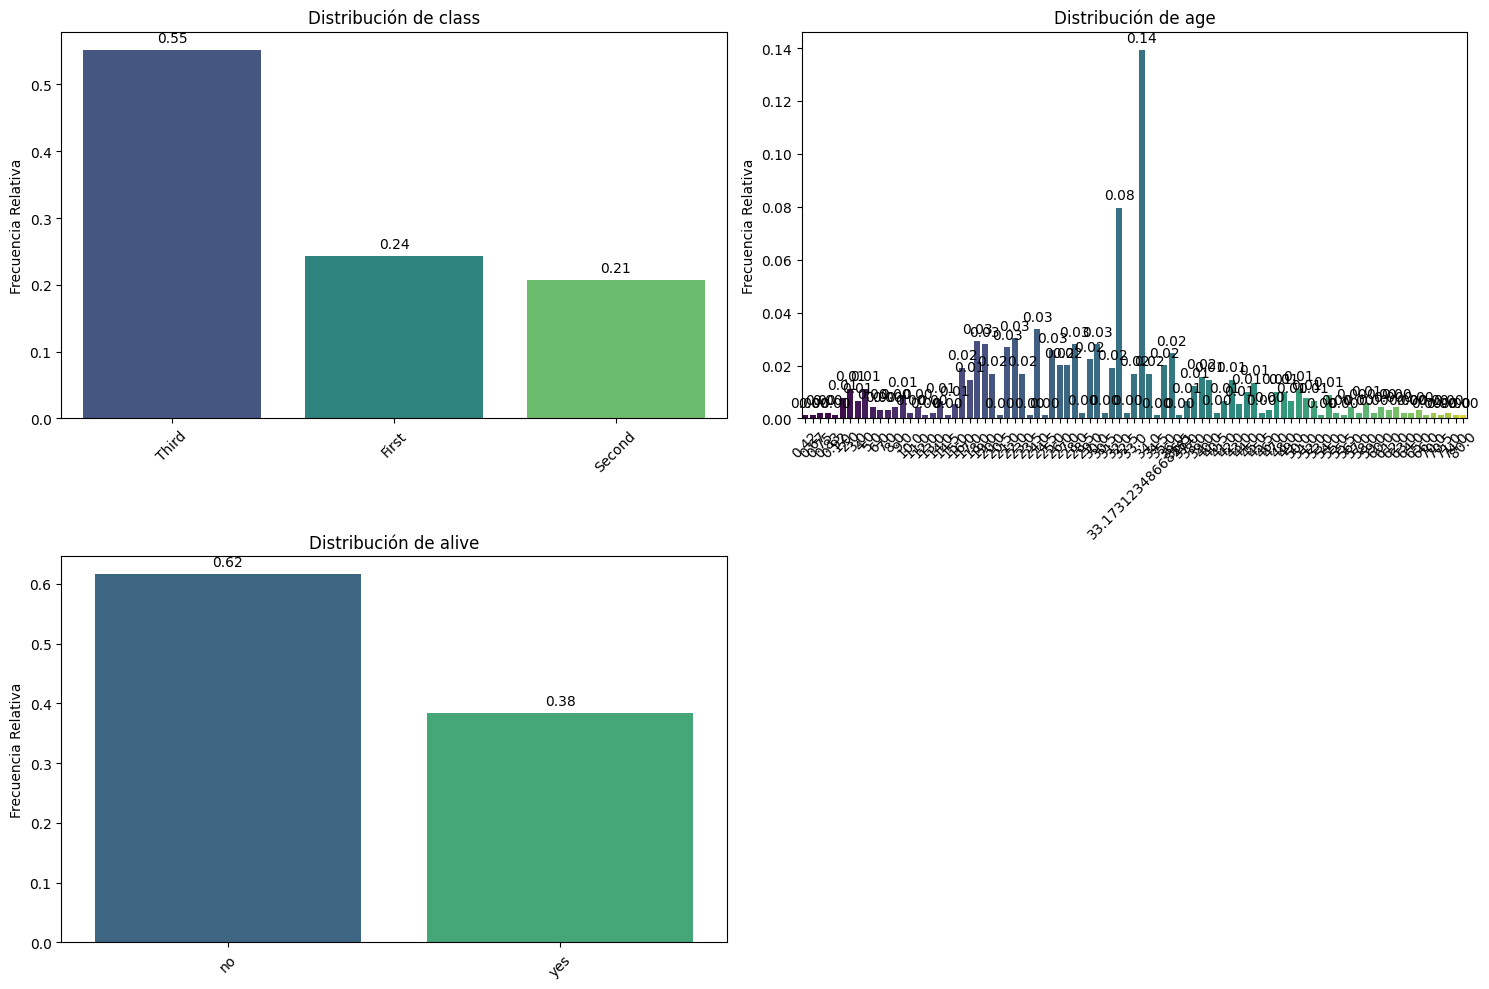

In [68]:
pinta_distribucion_categoricas(df_titanic,["class","age","alive"], relativa= True, mostrar_valores= True)


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot



### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [9]:
df_viajes_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
print(df_viajes_jun)
df_tipificacion_viajes_jun = pd.DataFrame([df_viajes_jun.nunique(), df_viajes_jun.nunique()/len(df_viajes_jun) * 100, df_viajes_jun.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
print(df_tipificacion_viajes_jun)
df_tipificacion_viajes_jun["Clasificada_como"] = "Categórica" # Partiendo de que casi todas parecen categóricas
df_tipificacion_viajes_jun.loc[df_tipificacion_viajes_jun.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion_viajes_jun.loc[df_tipificacion_viajes_jun["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion_viajes_jun.loc[df_tipificacion_viajes_jun["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion_viajes_jun

     aircompany       origen      destino  distancia        avion  con_escala  \
0        Airnar        París      Ginebra        411   Boeing 737       False   
1          FlyQ         Bali         Roma      12738   Boeing 737        True   
2      TabarAir      Ginebra  Los Angeles       9103  Airbus A380       False   
3    MoldaviAir        París   Cincinnati       6370   Boeing 737       False   
4      TabarAir   Cincinnati         Roma       7480   Boeing 747       False   
..          ...          ...          ...        ...          ...         ...   
595   PamPangea         Bali      Londres      12553   Boeing 737        True   
596      Airnar        Cádiz        París       1447  Airbus A380       False   
597      Airnar  Los Angeles        Cádiz       9373   Boeing 737       False   
598        FlyQ    Barcelona         Bali      13058   Boeing 747        True   
599    TabarAir      Londres   Nueva York       5566   Boeing 747       False   

        consumo_kg  duracio

Card     %_Card     Tipo   Clasificada_como
aircompany    5   0.833333   object         Categórica
origen       11   1.833333   object  Numerica Discreta
destino      11   1.833333   object  Numerica Discreta
distancia    45        7.5    int64  Numerica Discreta
avion         4   0.666667   object         Categórica
con_escala    2   0.333333     bool            Binaria
consumo_kg  501       83.5  float64  Numerica Continua
duracion    113  18.833333    int64  Numerica Discreta
ingresos    600      100.0  float64  Numerica Continua
id_vuelo    347  57.833333   object  Numerica Continua
mes           1   0.166667   object         Categórica

In [15]:
df_viajes_jun.groupby("aircompany")["aircompany"].value_counts()

aircompany
Airnar        100
FlyQ          108
MoldaviAir    133
PamPangea     117
TabarAir      142
Name: count, dtype: int64

In [18]:
df_viajes_jun.groupby("aircompany")["ingresos"].sum()

aircompany
Airnar        40529397.82
FlyQ          43374852.87
MoldaviAir    72894268.81
PamPangea     55974794.70
TabarAir      38487996.70
Name: ingresos, dtype: float64

In [41]:
df_viajes_jun_companyia=pd.DataFrame(columns=["aircompany","total_viajes"])
df_viajes_jun_companyia= df_viajes_jun.groupby("aircompany")["aircompany"].value_counts()
print(df_viajes_jun_companyia)
df_viajes_jun_companyia.head()
df_viajes_jun_ingresos=pd.DataFrame(columns=["aircompany","total_ingresos"])
df_viajes_jun_ingresos= df_viajes_jun.groupby("aircompany")["ingresos"].sum()
print(df_viajes_jun_ingresos)
df_viajes_jun_companyia_ingresos=pd.merge(df_viajes_jun_companyia,df_viajes_jun_ingresos,on="aircompany")
df_viajes_jun_companyia_ingresos.rename(columns={"aircompany":"aircompany","count":"total_viajes","ingresos":"total_ingresos"},inplace=True)
df_viajes_jun_companyia_ingresos["ingresos_por_viaje"] = df_viajes_jun_companyia_ingresos["total_ingresos"] / df_viajes_jun_companyia_ingresos["total_viajes"]
#df_viajes_jun_companyia_ingresos["total_viajes"]= df_viajes_jun.groupby("aircompany")["aircompany"].value_counts()
#df_viajes_jun_companyia_ingresos["total_ingresos"]= df_viajes_jun.groupby("aircompany")["ingresos"].value_counts()
df_viajes_jun_companyia_ingresos

aircompany
Airnar        100
FlyQ          108
MoldaviAir    133
PamPangea     117
TabarAir      142
Name: count, dtype: int64
aircompany
Airnar        40529397.82
FlyQ          43374852.87
MoldaviAir    72894268.81
PamPangea     55974794.70
TabarAir      38487996.70
Name: ingresos, dtype: float64


total_viajes  total_ingresos  ingresos_por_viaje
aircompany                                                  
Airnar               100     40529397.82       405293.978200
FlyQ                 108     43374852.87       401619.008056
MoldaviAir           133     72894268.81       548077.209098
PamPangea            117     55974794.70       478417.048718
TabarAir             142     38487996.70       271042.230282

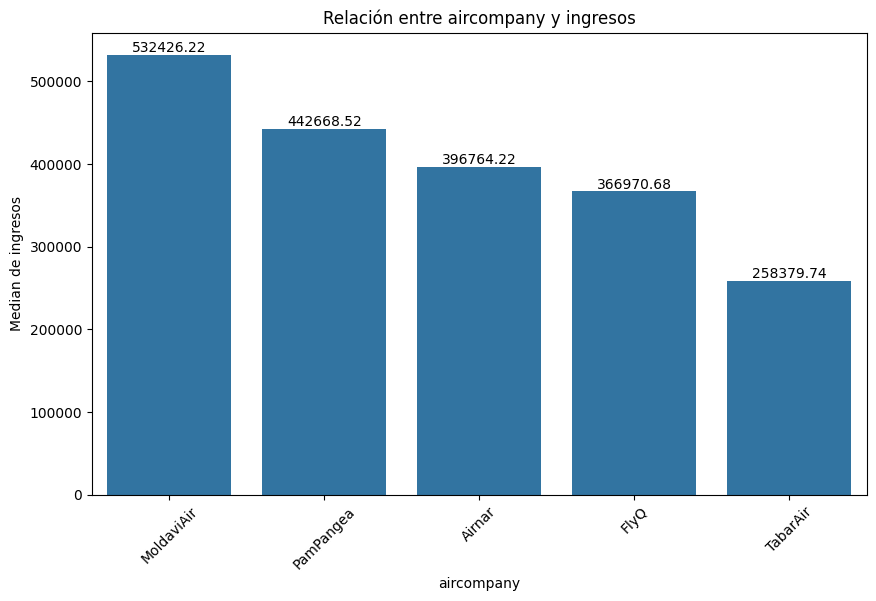

In [17]:
plot_categorical_numerical_relationship(df_viajes_jun,"aircompany","ingresos",show_values=True, measure = "median")
#Tabarair ha hecho más viajes pero ha ingresado menos 142 

#MoldaviAir ha hecho más viajes pero ha ingresado menos

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


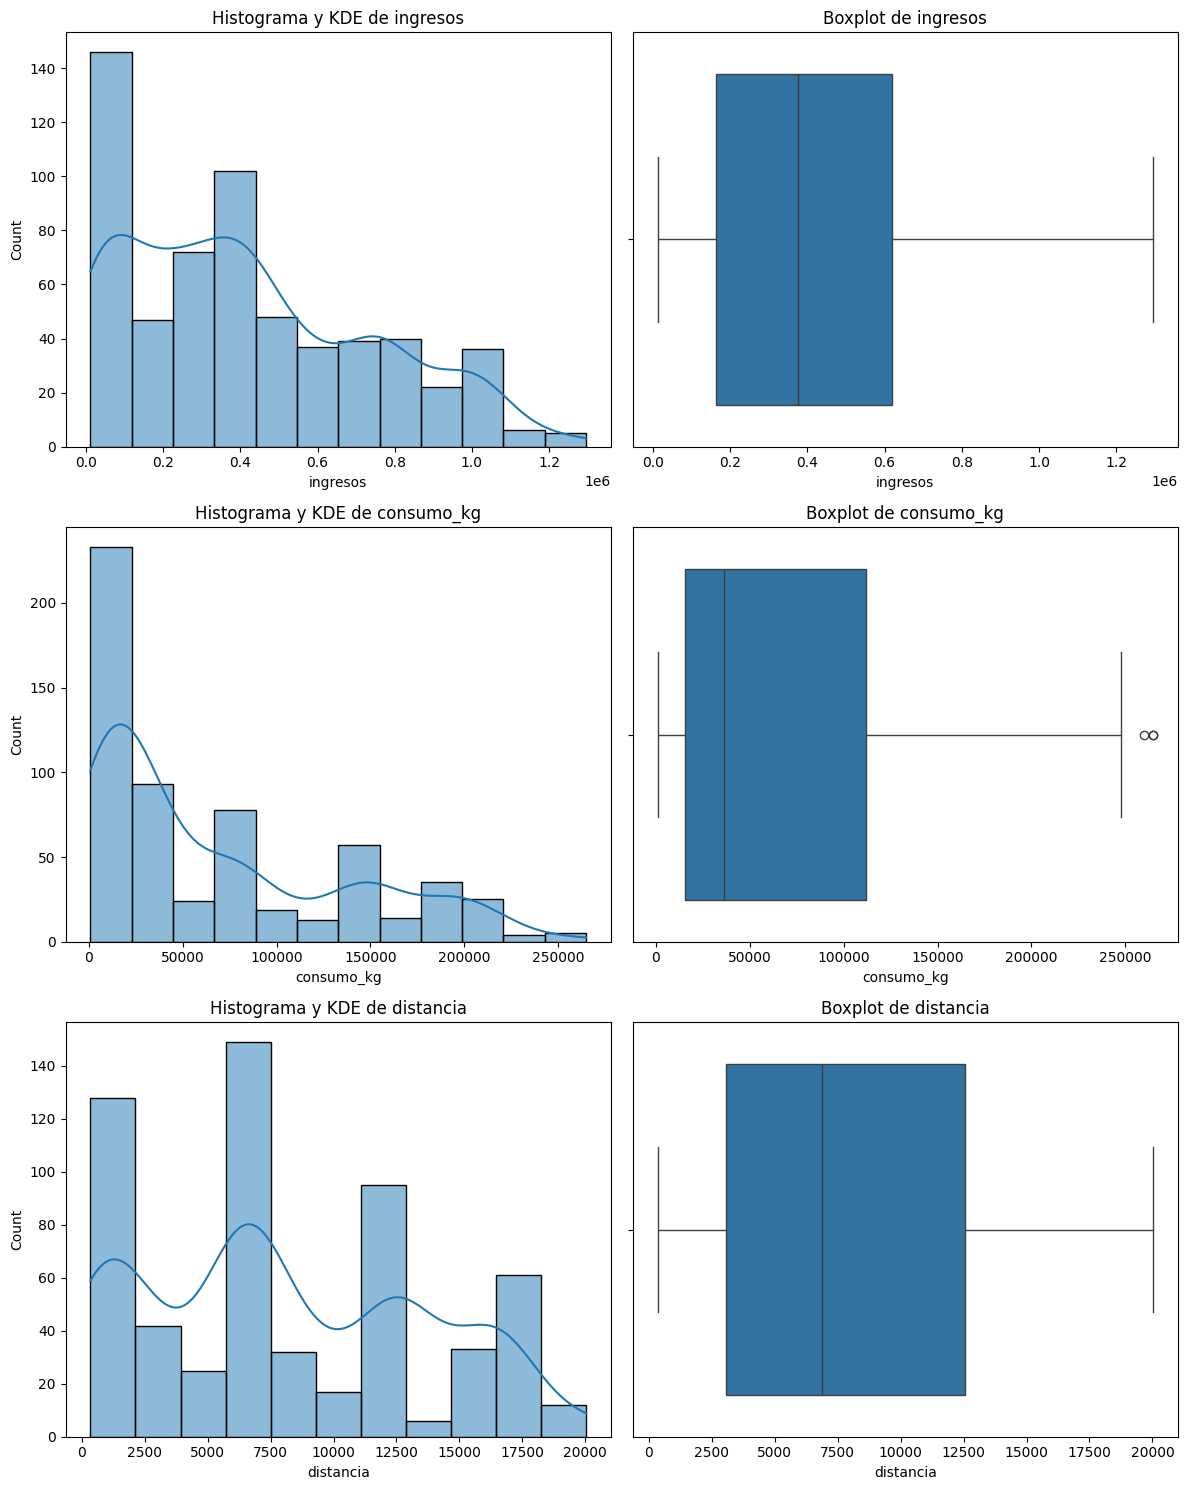

In [44]:

plot_combined_graphs(df_viajes_jun,["ingresos","consumo_kg","distancia"])


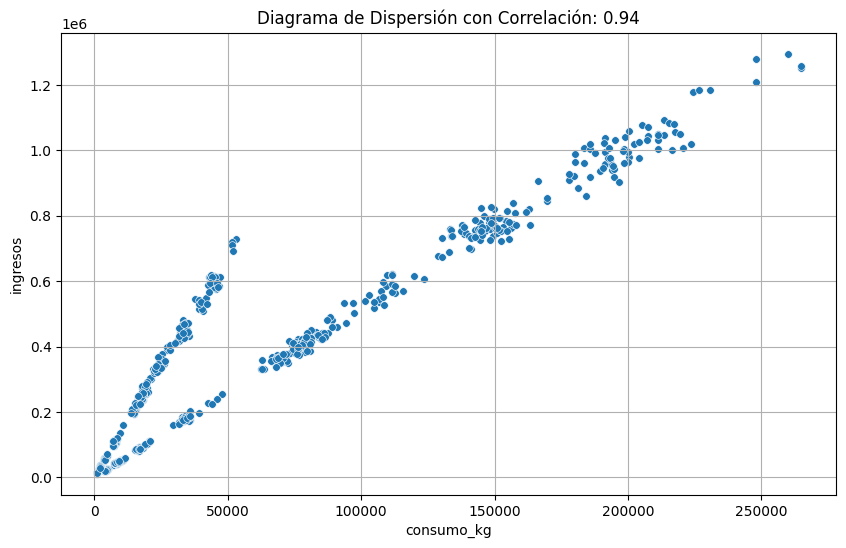

In [45]:
grafico_dispersion_con_correlacion(df_viajes_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)


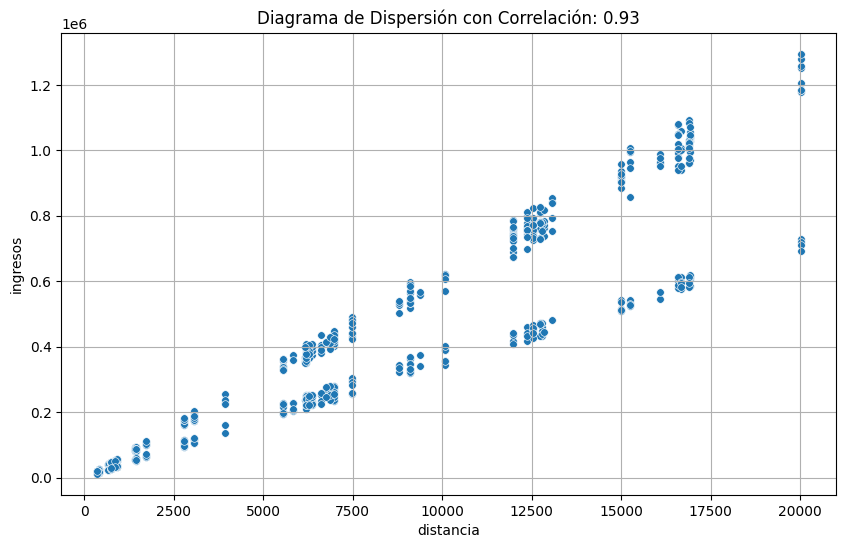

In [46]:
grafico_dispersion_con_correlacion(df_viajes_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)

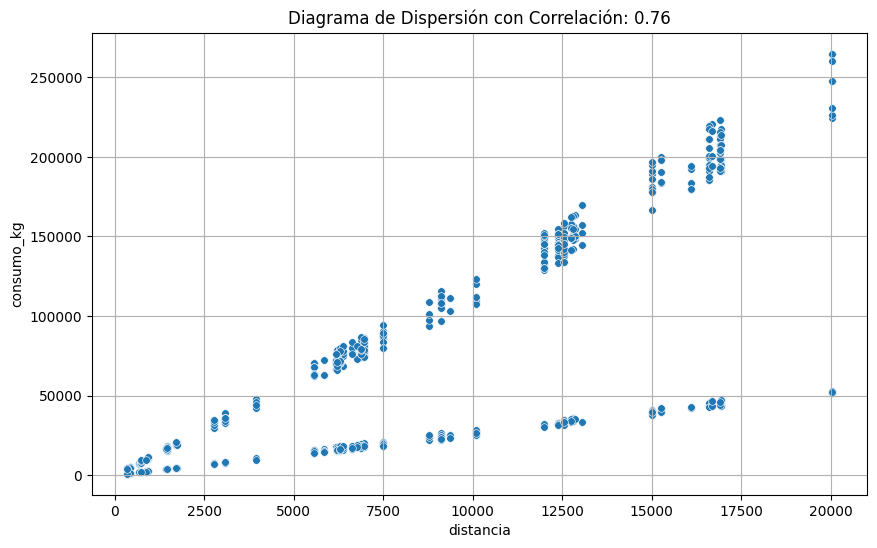

In [47]:
grafico_dispersion_con_correlacion(df_viajes_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

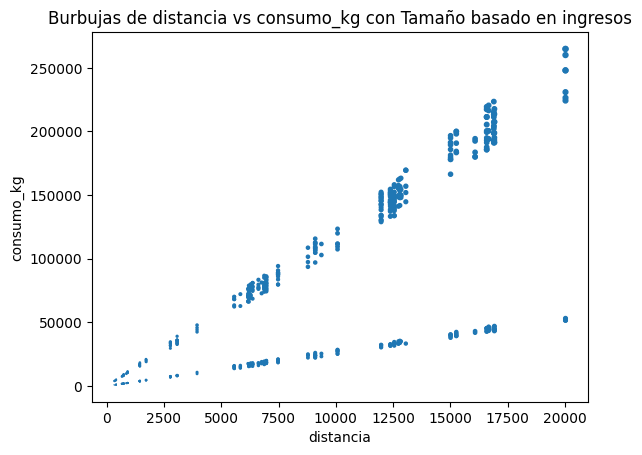

In [48]:
bubble_plot(df_viajes_jun,"distancia","consumo_kg","ingresos", scale = 100000)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Realiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [79]:
def aplica(row):

    for valor in row:
        #print(valor)
        if valor >= 10000:
            return "Larga"
        elif (valor<10000 and valor>5000):
            return "Media"
        elif valor<5000:
            return "Corta"
    
df_viajes_jun["cat_vuelo"] = df_viajes_jun["distancia"].apply(aplica,axis=1)
df_viajes_jun.groupby("cat_vuelo")["cat_vuelo"].value_counts()
df_viajes_jun

TypeError: aplica() got an unexpected keyword argument 'axis'

In [82]:
df_viajes_jun.loc[df_viajes_jun.distancia < 5000, "cat_vuelo"] = "Corta"
df_viajes_jun.loc[df_viajes_jun["distancia"] > 5000, "cat_vuelo"] ="Media"
df_viajes_jun.loc[df_viajes_jun["distancia"] > 10000, "cat_vuelo"] = "Larga"
df_viajes_jun

aircompany       origen      destino  distancia        avion  con_escala  \
0        Airnar        París      Ginebra        411   Boeing 737       False   
1          FlyQ         Bali         Roma      12738   Boeing 737        True   
2      TabarAir      Ginebra  Los Angeles       9103  Airbus A380       False   
3    MoldaviAir        París   Cincinnati       6370   Boeing 737       False   
4      TabarAir   Cincinnati         Roma       7480   Boeing 747       False   
..          ...          ...          ...        ...          ...         ...   
595   PamPangea         Bali      Londres      12553   Boeing 737        True   
596      Airnar        Cádiz        París       1447  Airbus A380       False   
597      Airnar  Los Angeles        Cádiz       9373   Boeing 737       False   
598        FlyQ    Barcelona         Bali      13058   Boeing 747        True   
599    TabarAir      Londres   Nueva York       5566   Boeing 747       False   

        consumo_kg  duracion   ingresos        id_vuelo    mes cat_vuelo  
0      1028.691900        51   14232.65  Air_PaGi_10737  Jun23     Corta  
1     33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23     Larga  
2    109439.907200       626  584789.19  Tab_GiLo_11380  Jun23     Media  
3     17027.010000       503  233342.51  Mol_PaCi_10737  Jun23     Media  
4     86115.744000       518  438535.07  Tab_CiRo_10747  Jun23     Media  
..             ...       ...        ...             ...    ...       ...  
595   33310.138680      1153  442668.52  Pam_BaLo_10737  Jun23     Larga  
596   17229.139600       116   87307.63  Air_CaPa_11380  Jun23     Corta  
597   23231.917800       731  339943.47  Air_LoCa_10737  Jun23     Media  
598  144766.211200      1070  752212.98  Fly_BaBa_10747  Jun23     Larga  
599   62893.573600       391  330320.81  Tab_LoNu_10747  Jun23     Media  

[600 rows x 12 columns]

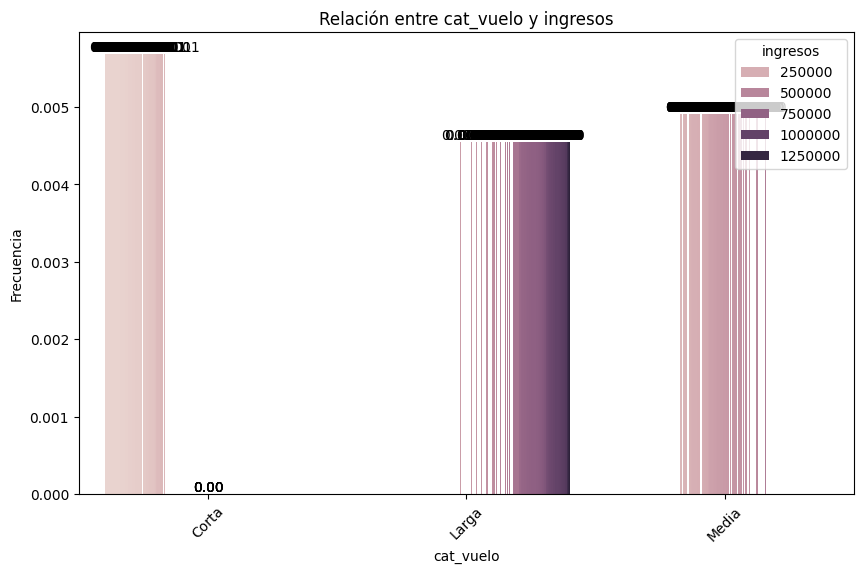

In [83]:
plot_categorical_relationship_fin(df_viajes_jun,"cat_vuelo","ingresos", relative_freq= True, show_values= True)

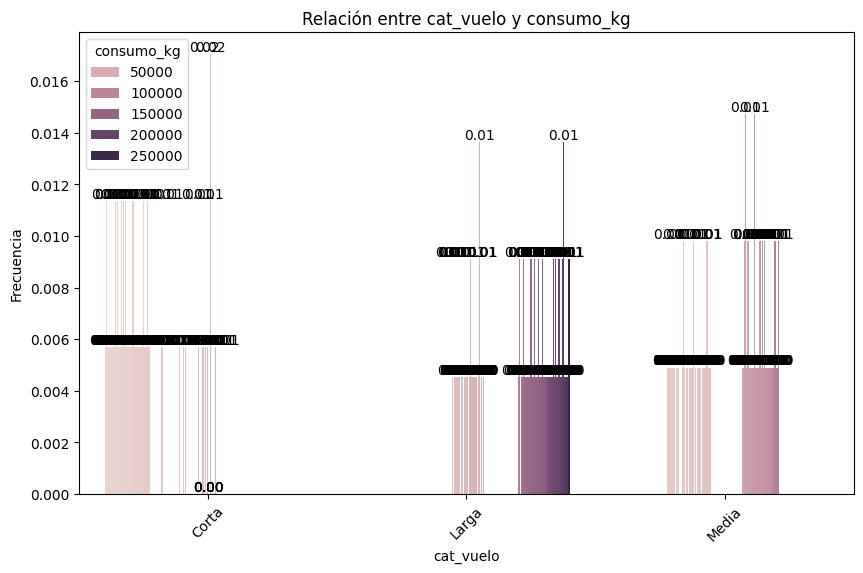

In [84]:
plot_categorical_relationship_fin(df_viajes_jun,"cat_vuelo","consumo_kg", relative_freq= True, show_values= True)

In [85]:
columnas = ["cat_vuelo","ingresos","consumo_kg"] 
col_directora = "cat_vuelo"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df_viajes_jun[col_directora].unique():
    diccionario_multivariante[valor] = df_viajes_jun.loc[df_viajes_jun[col_directora] == valor,[col_2,col_1]] # Ojo al orden quiero ver para cada cat_vuelo como es la distribución de consumo_kg
    

Respuesta Corta:


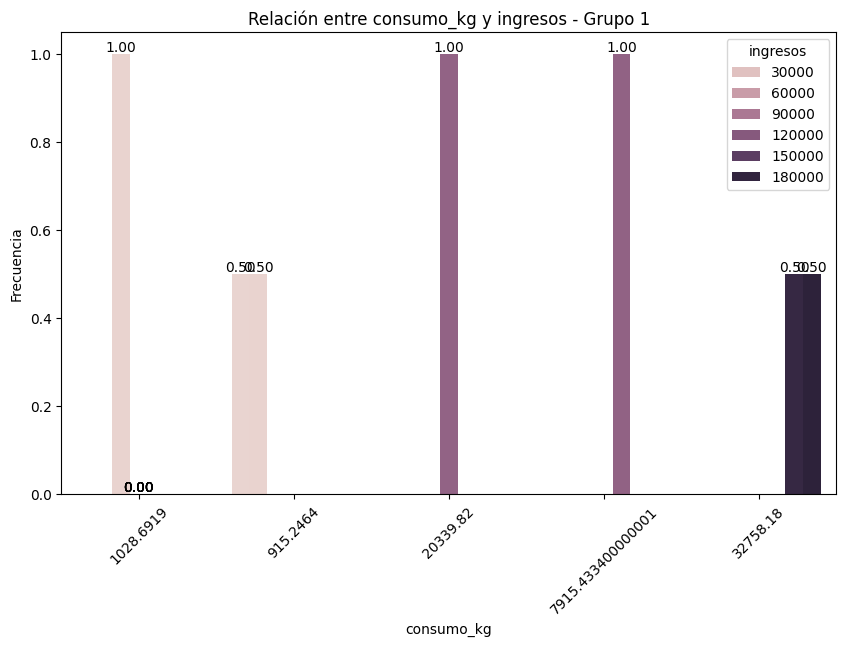

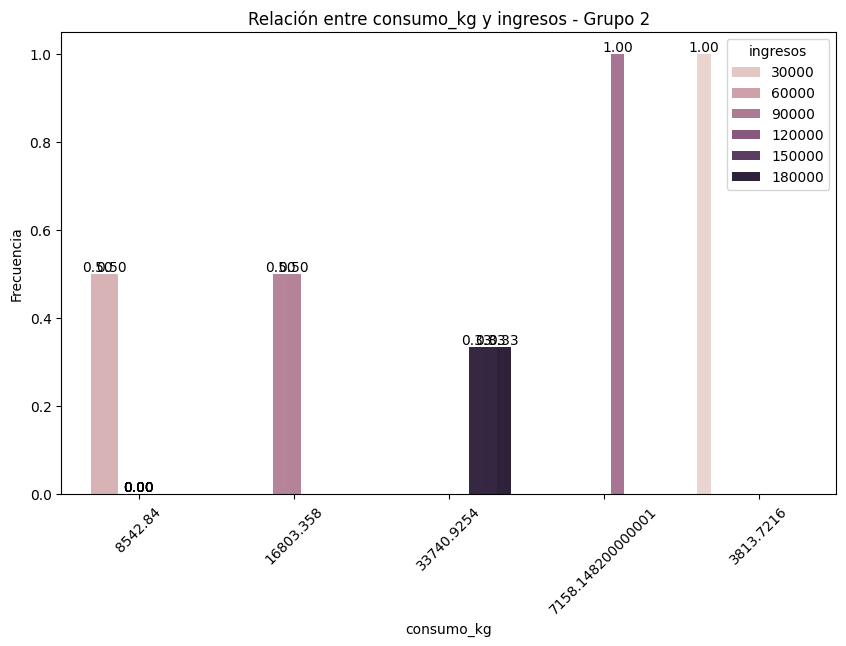

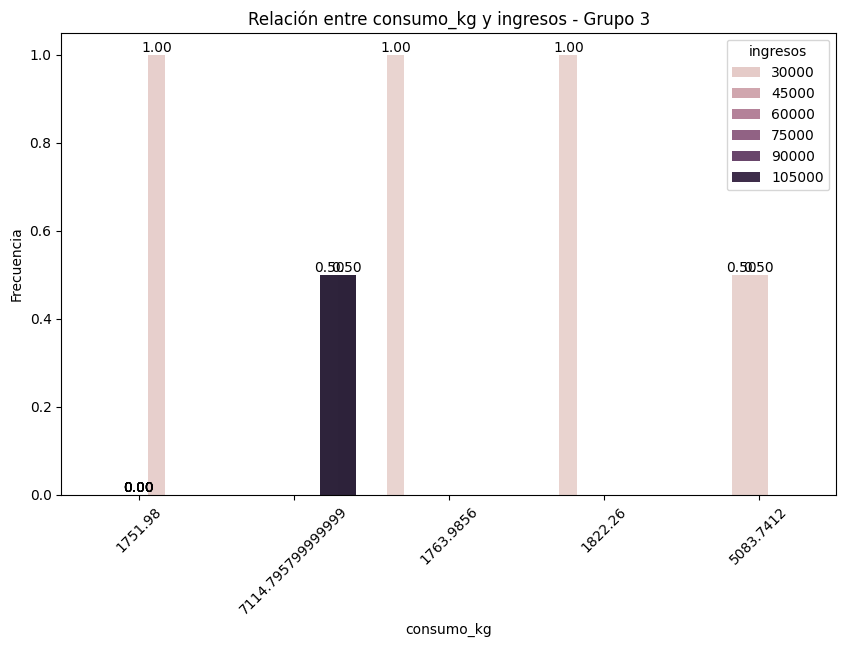

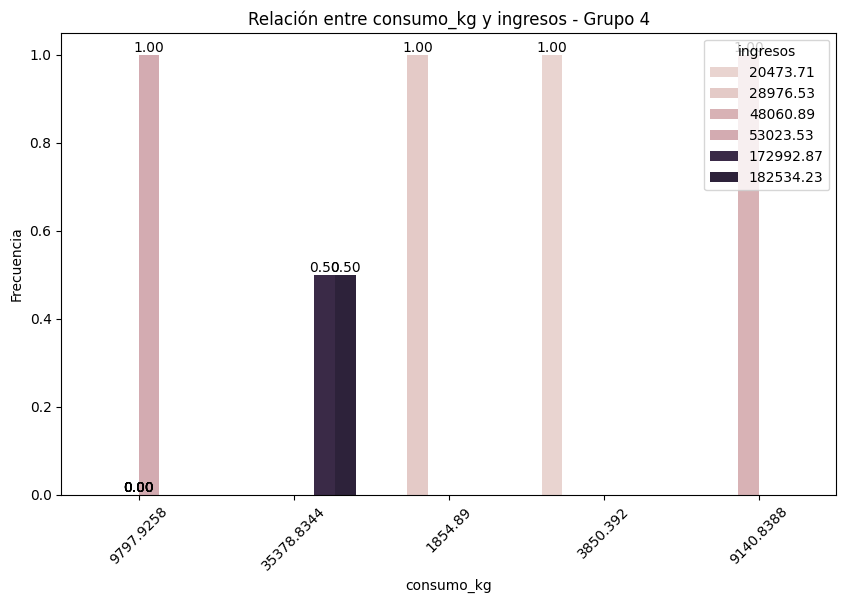

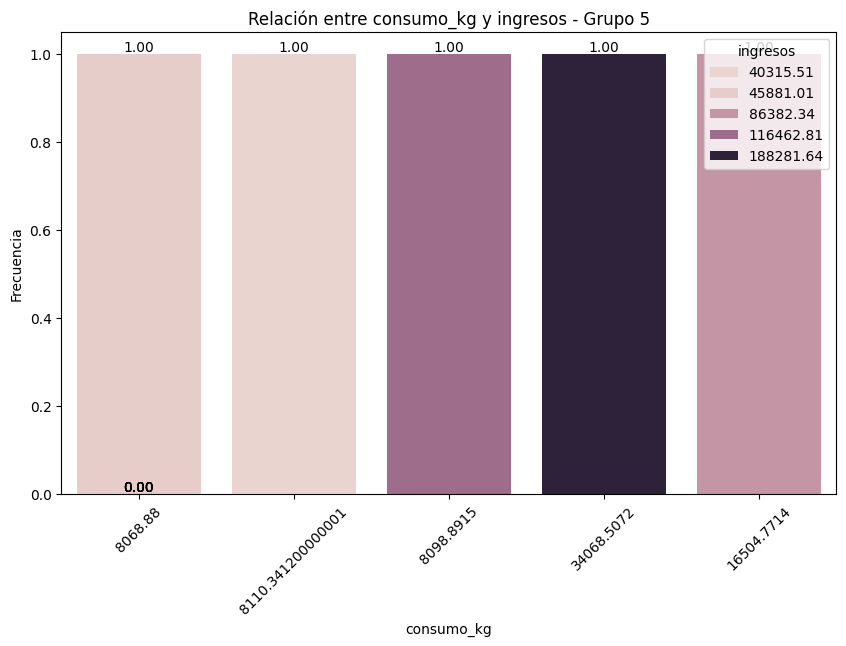

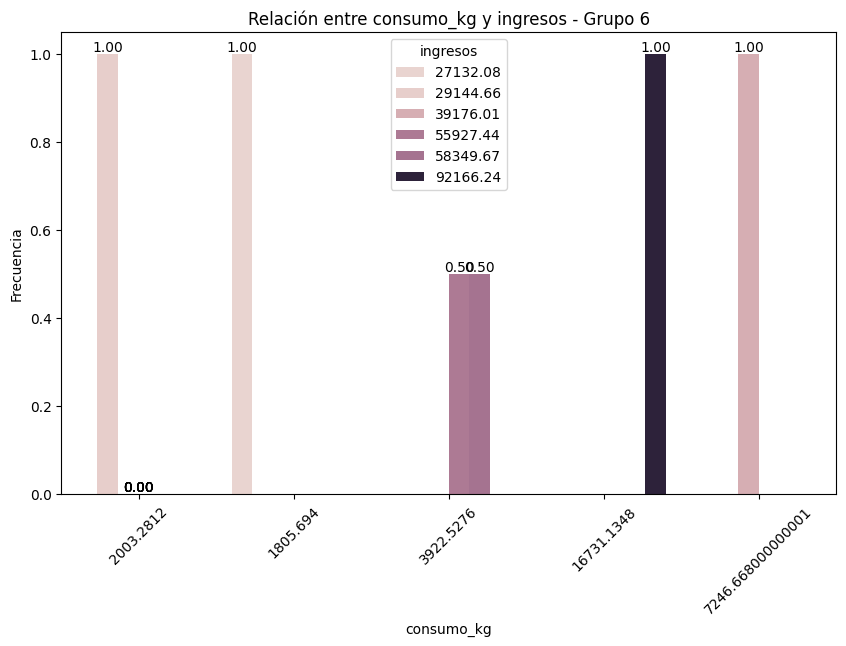

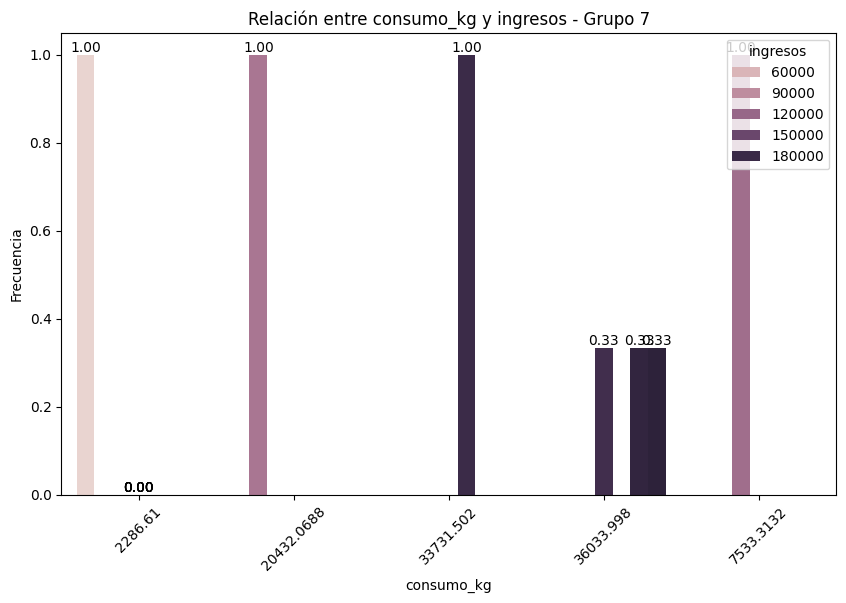

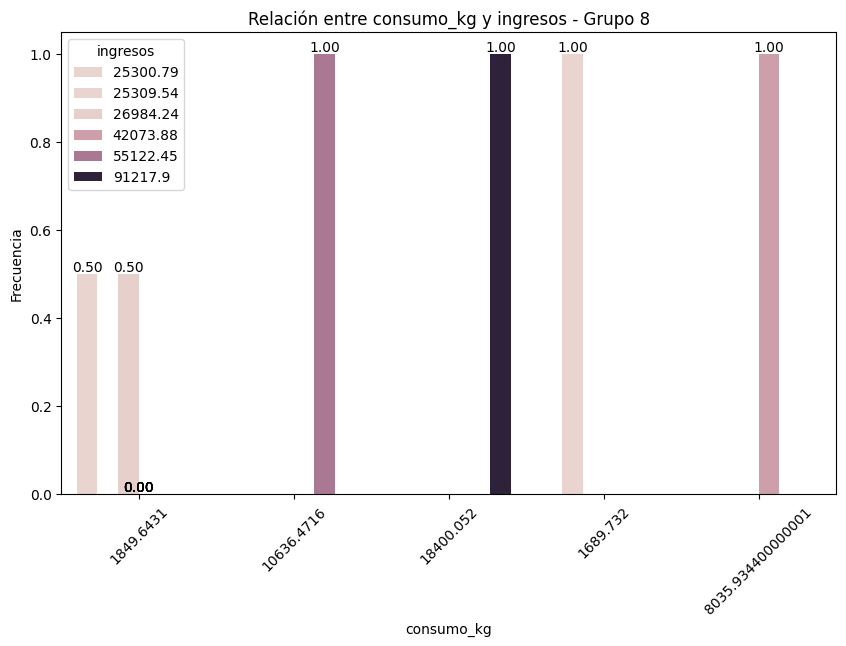

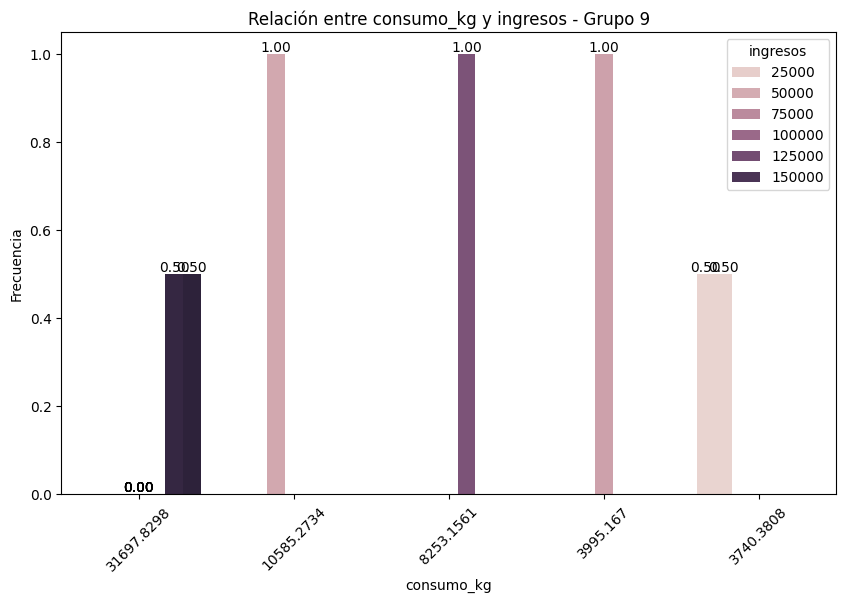

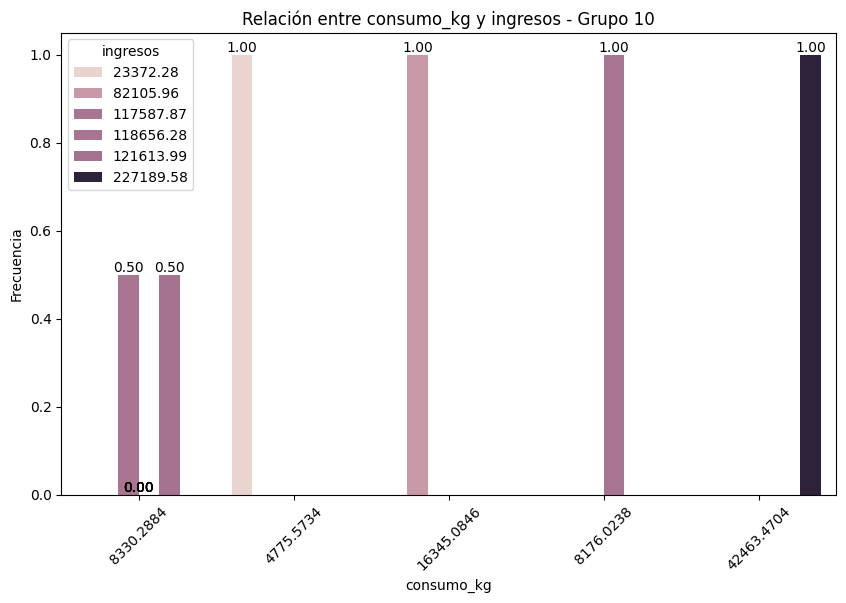

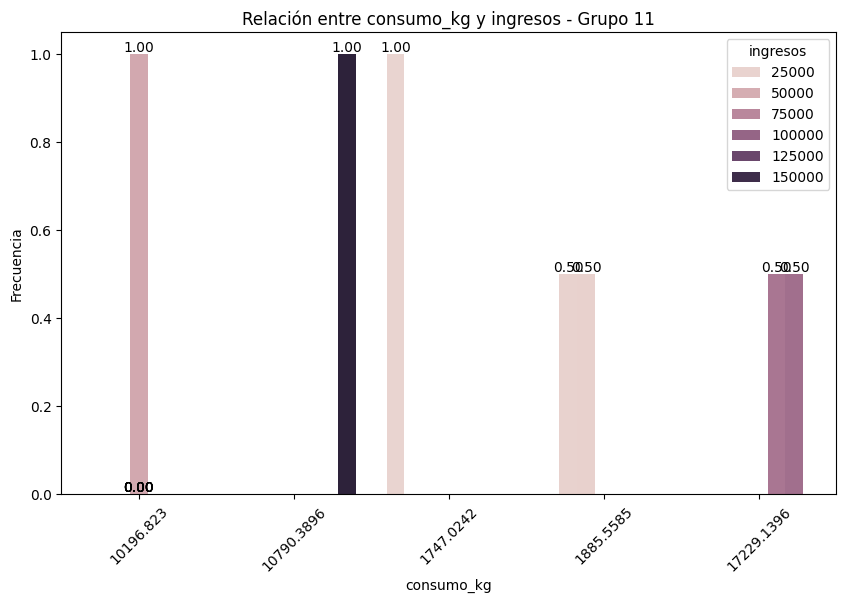

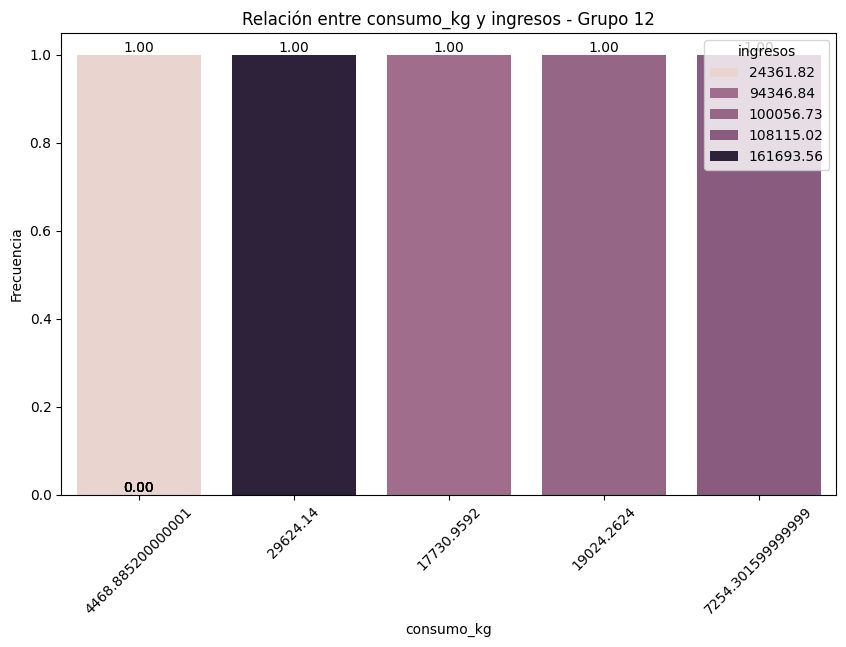

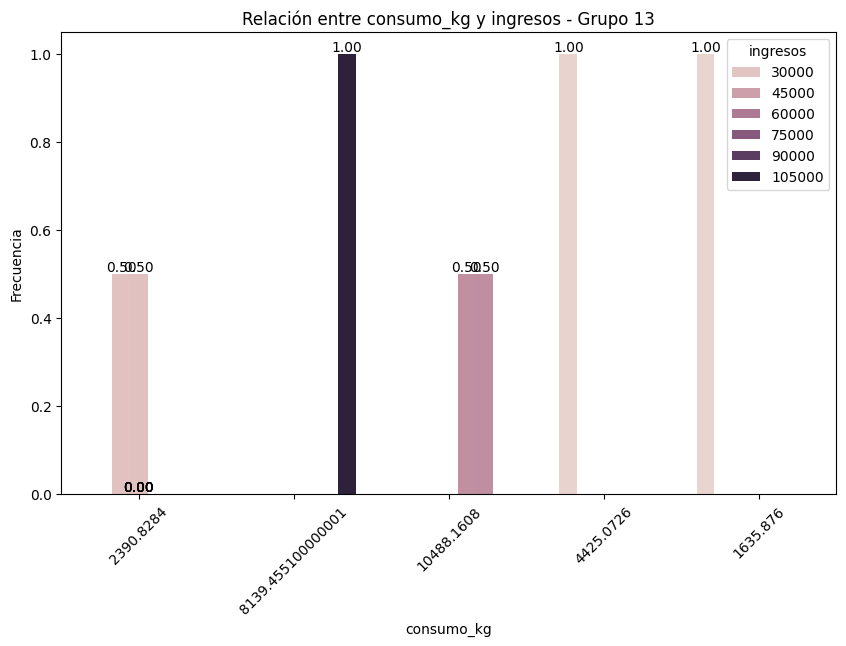

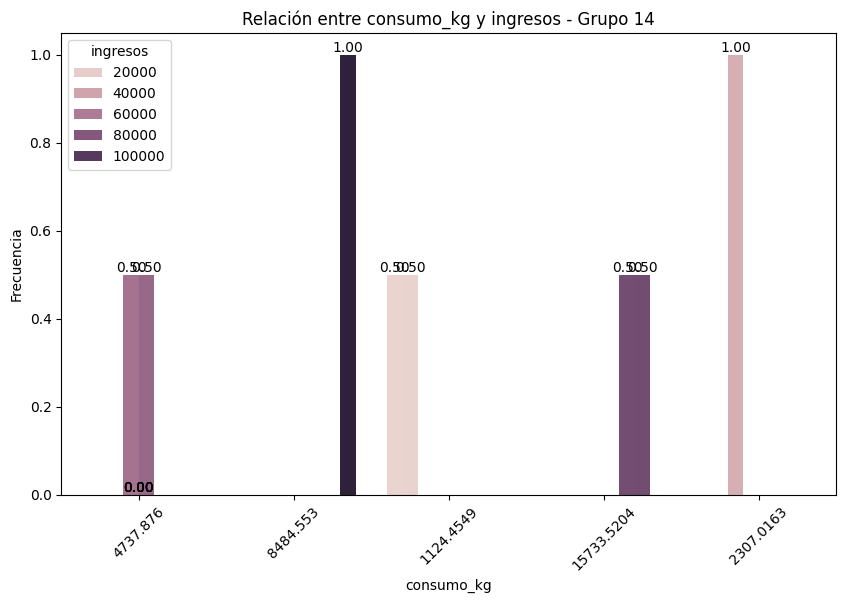

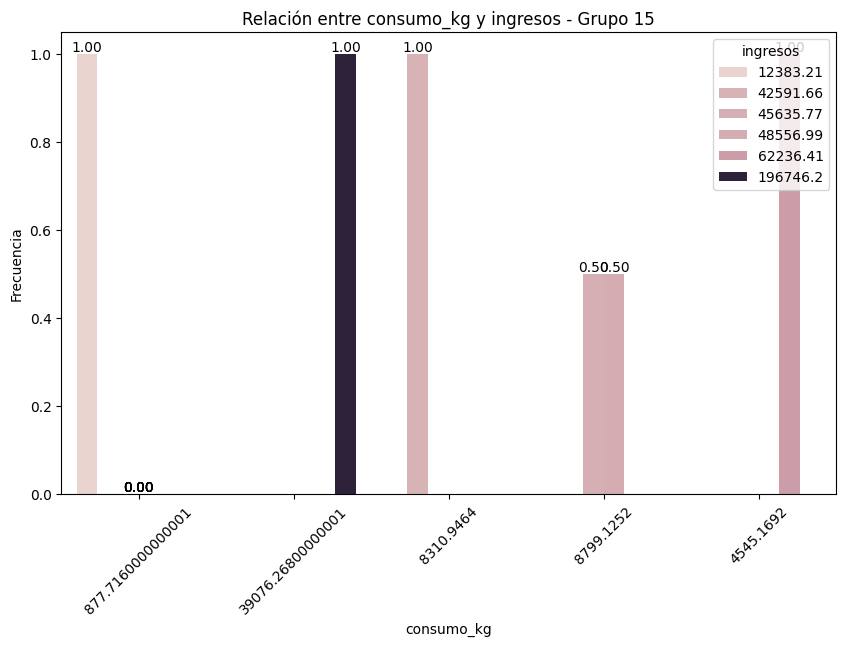

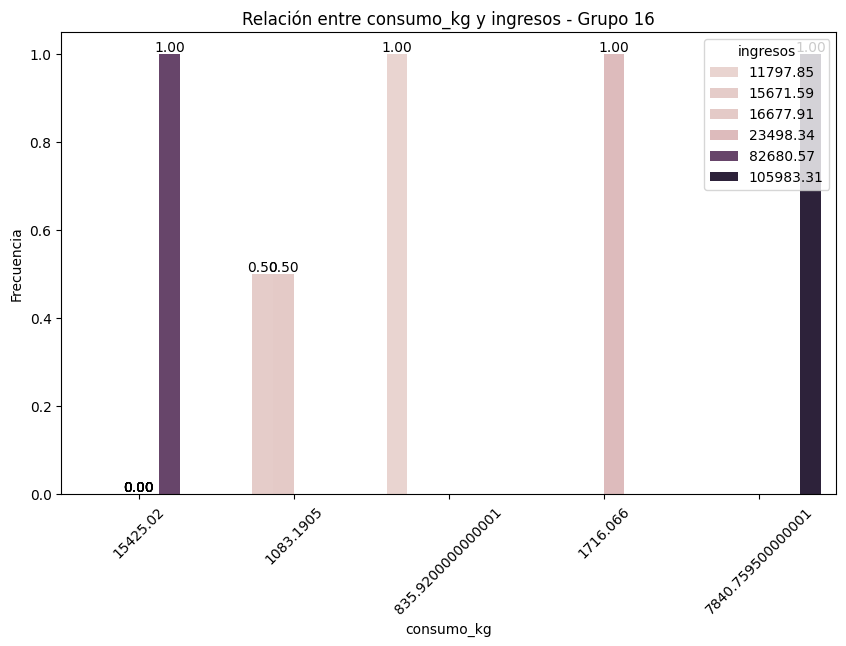

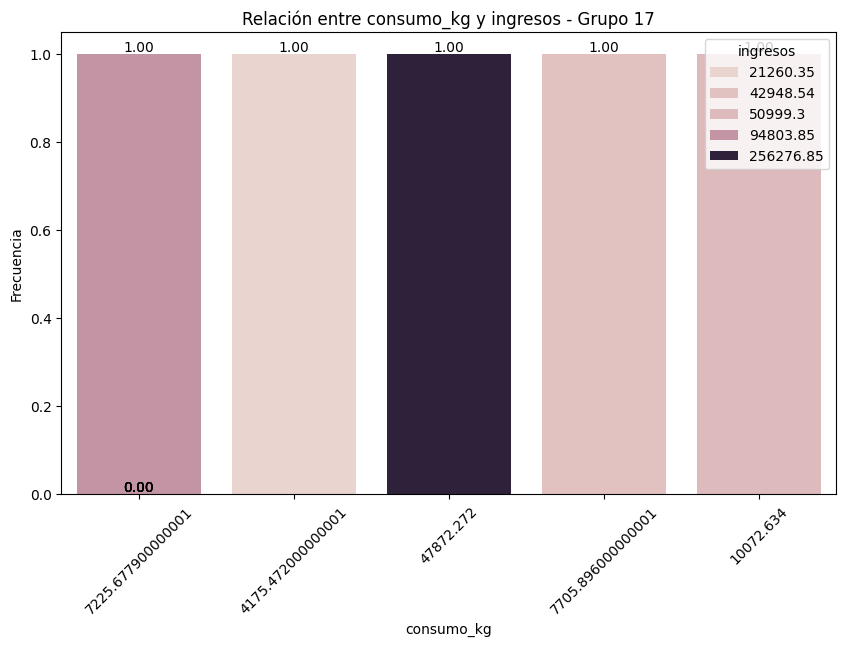

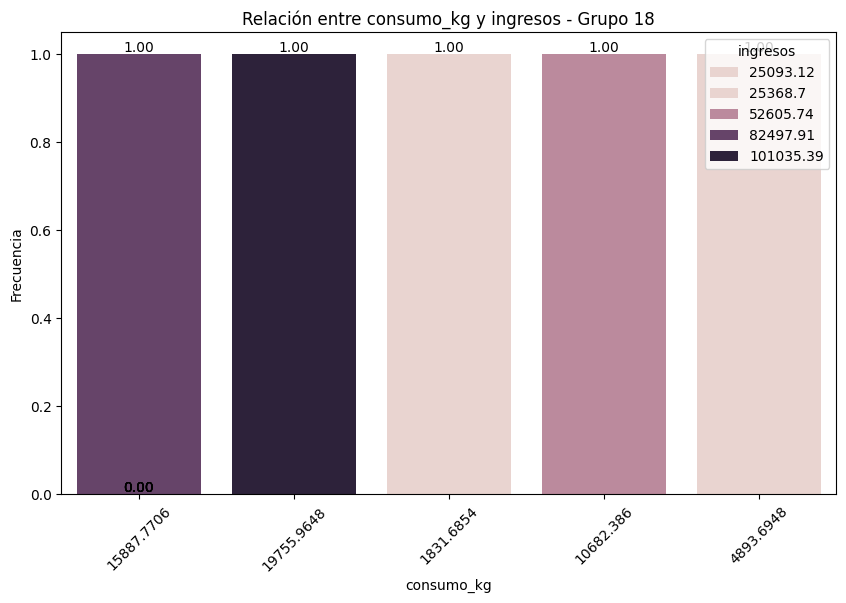

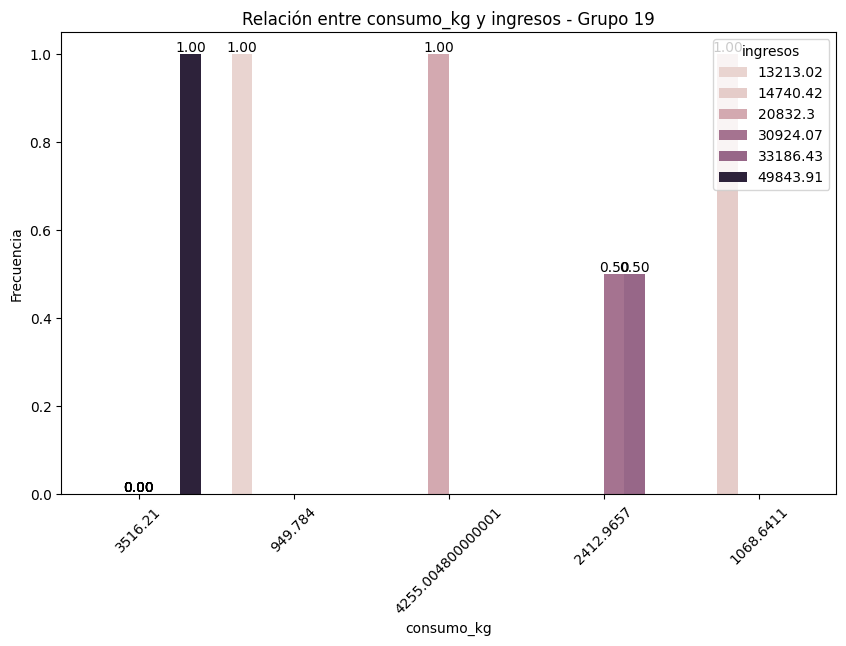

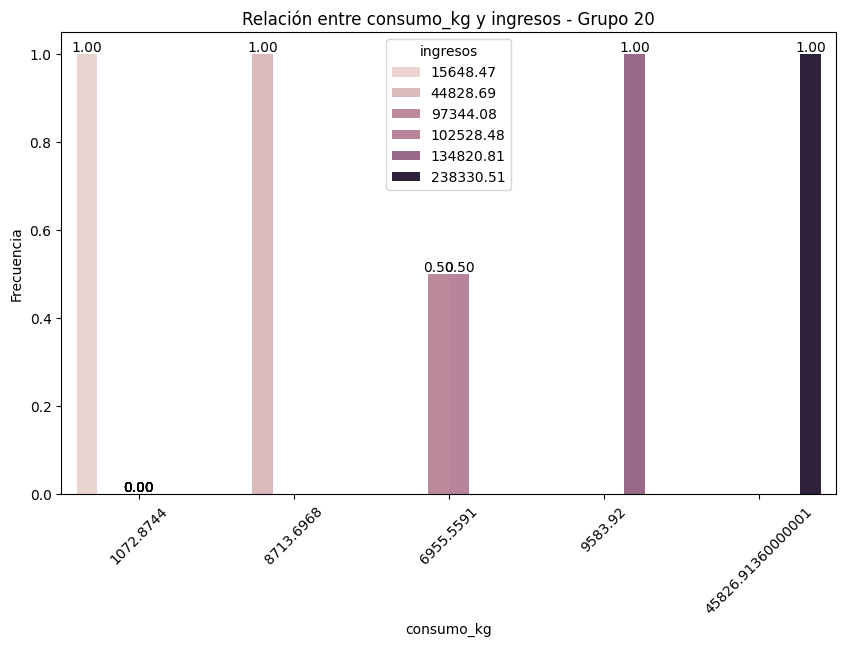

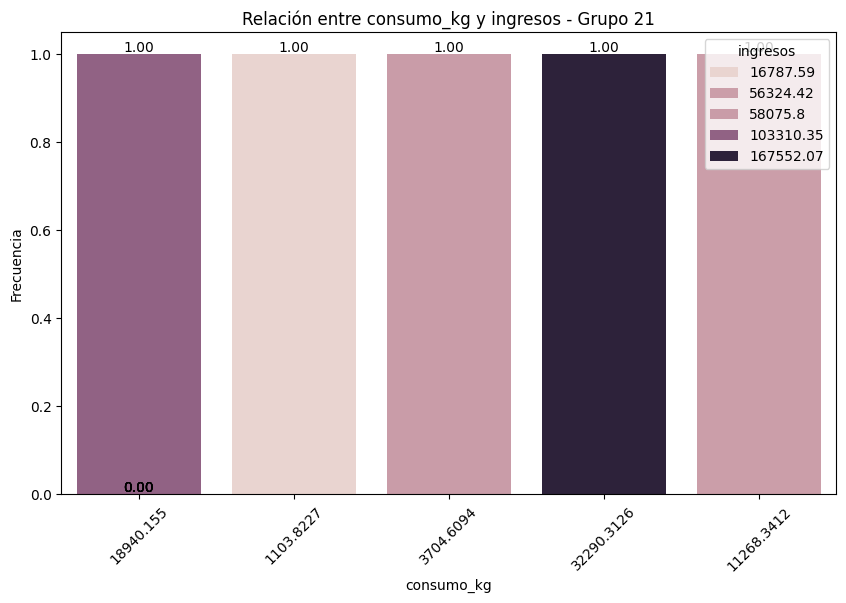

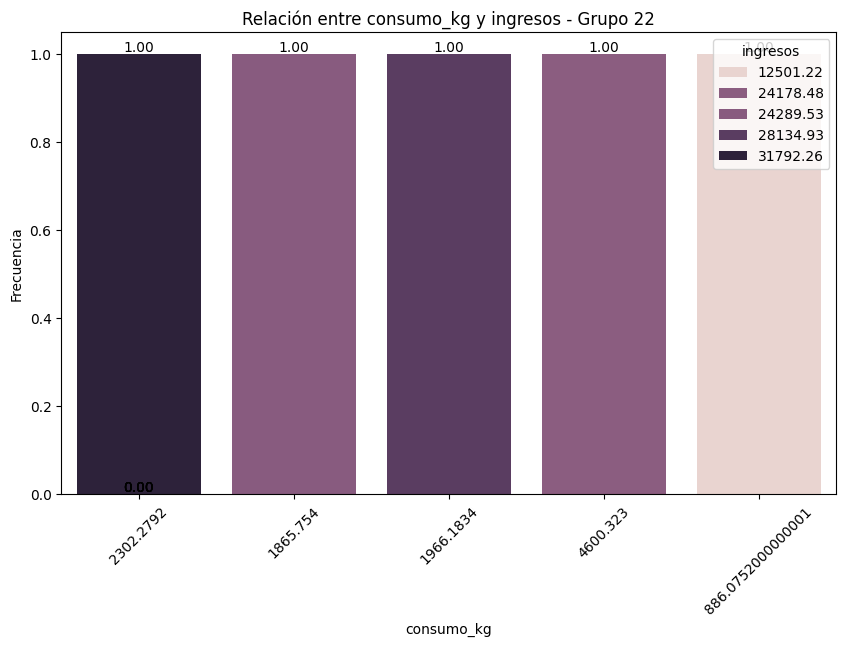

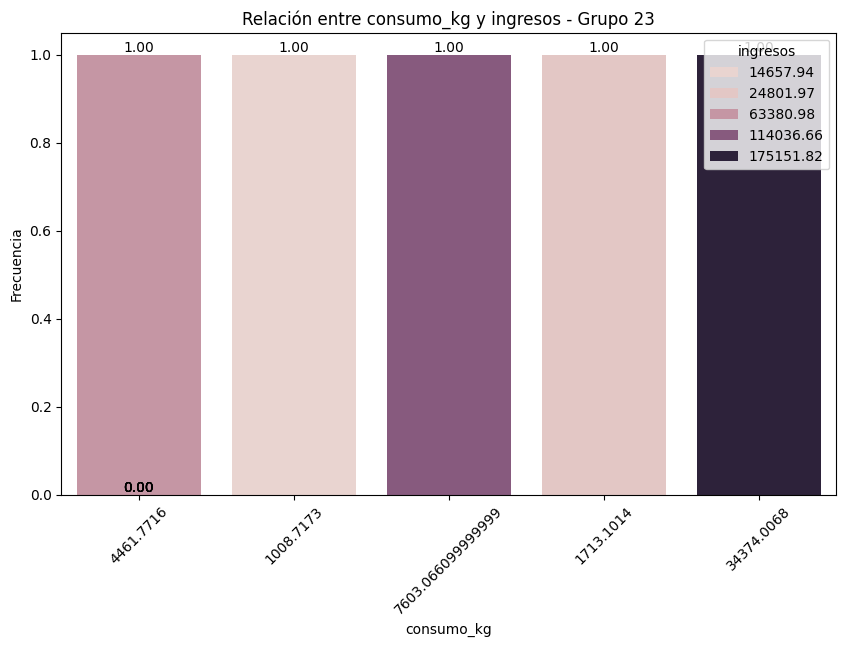

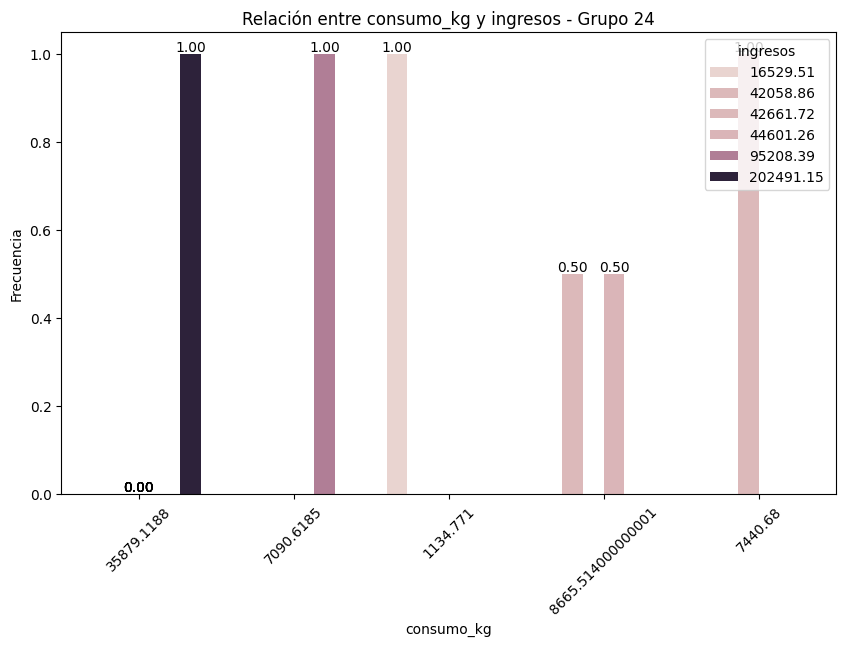

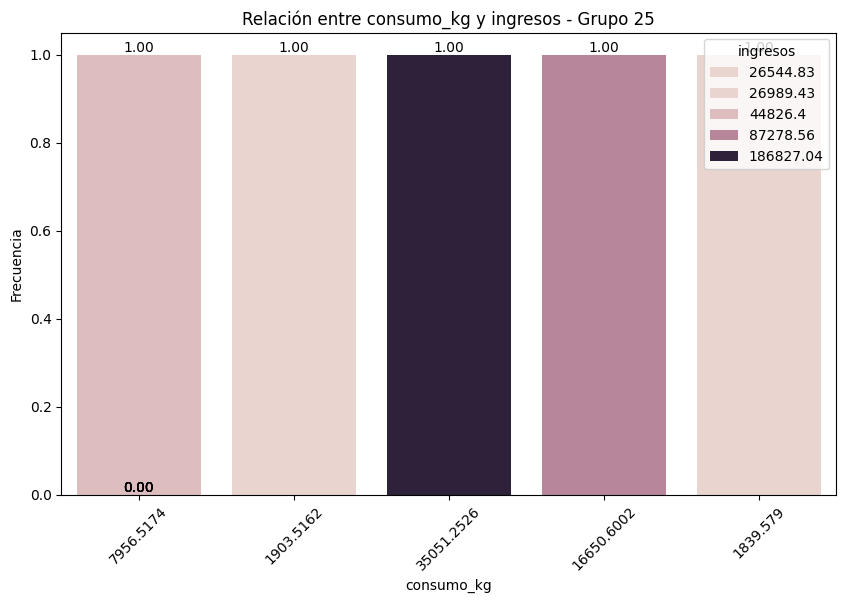

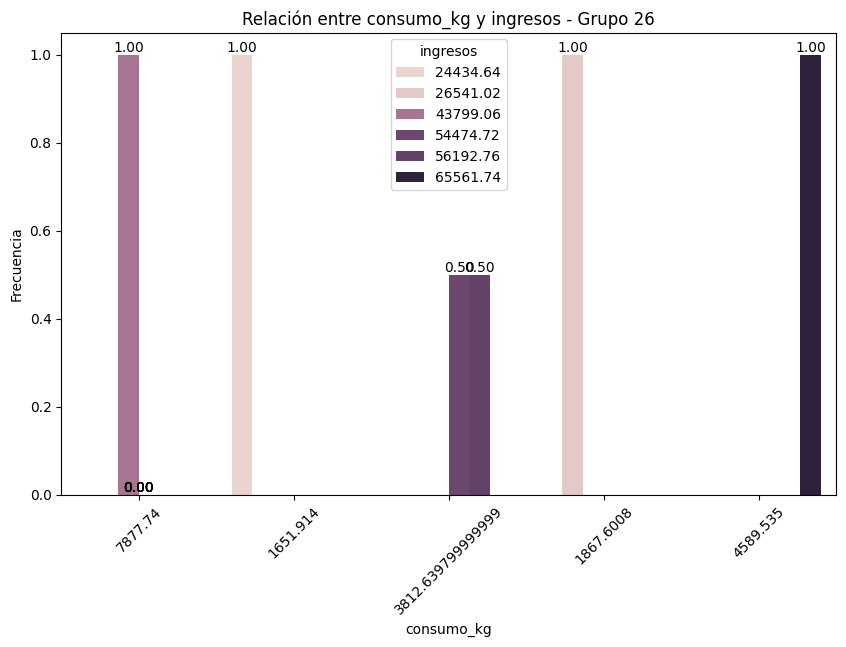

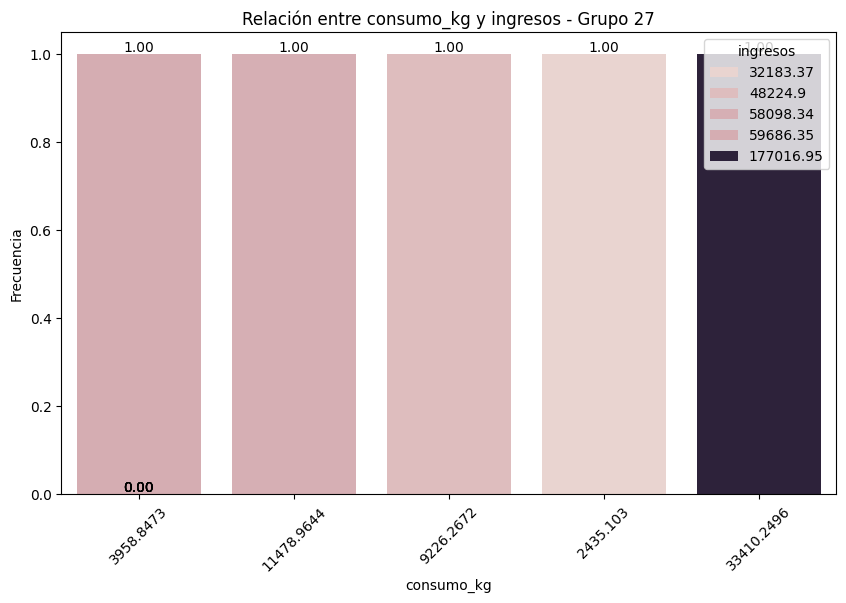

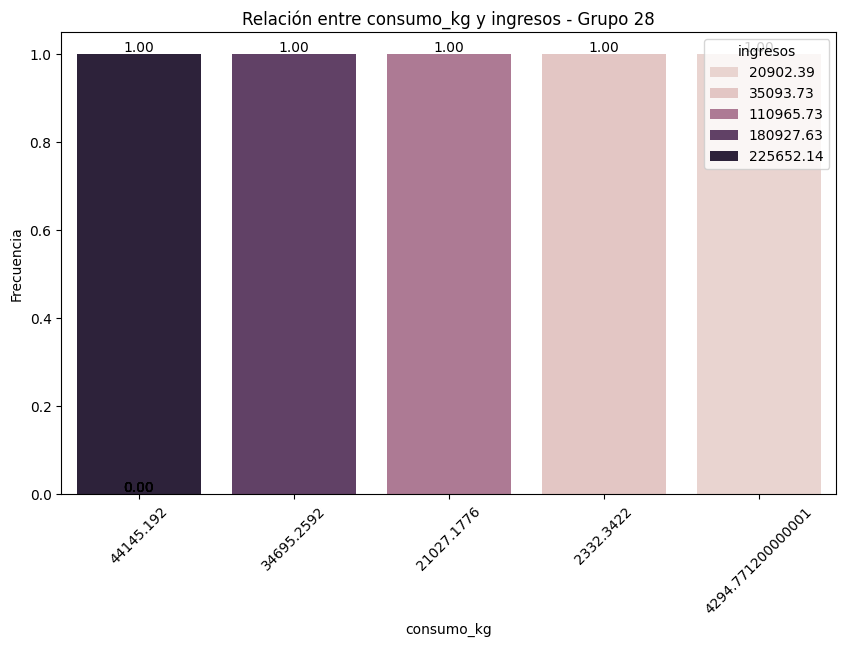

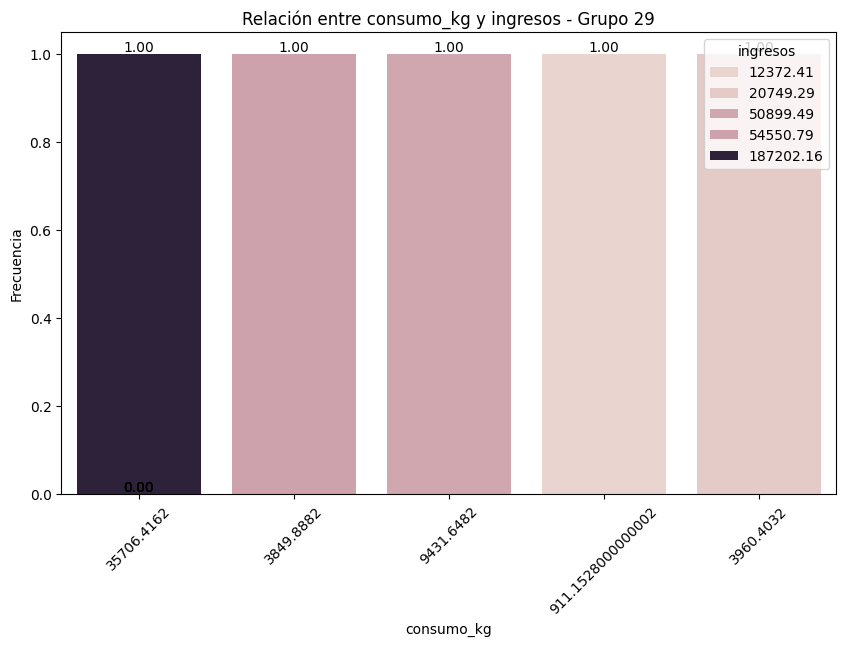

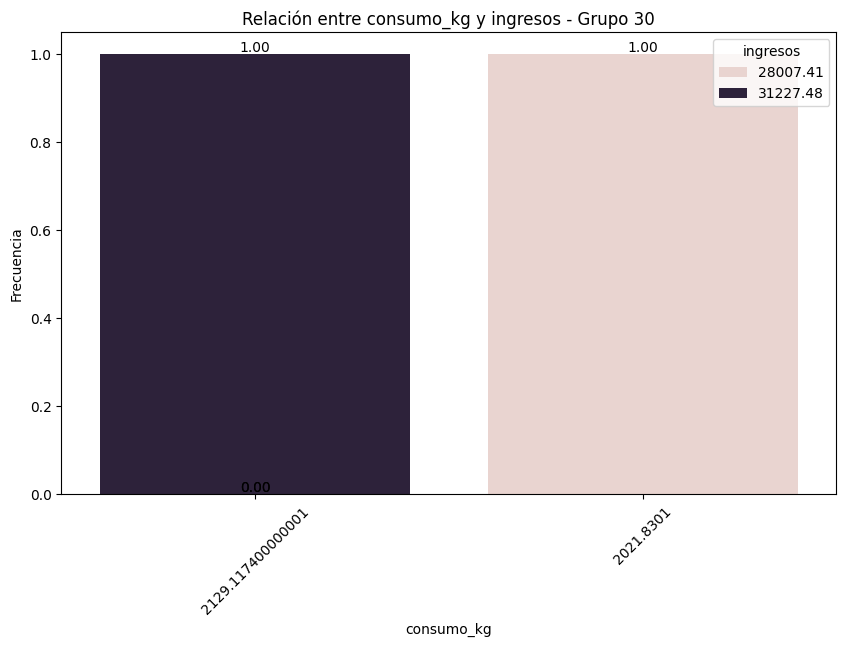

Respuesta Larga:


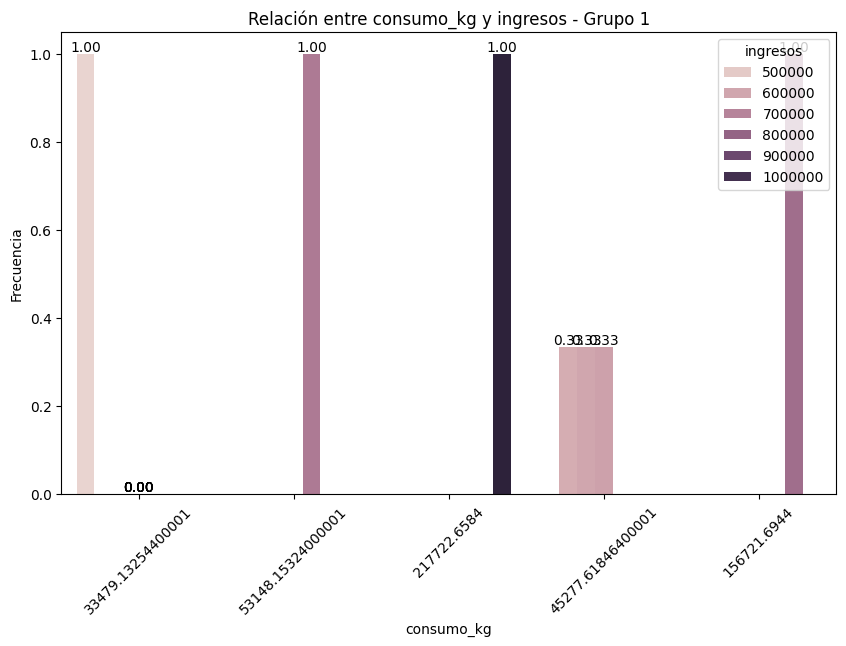

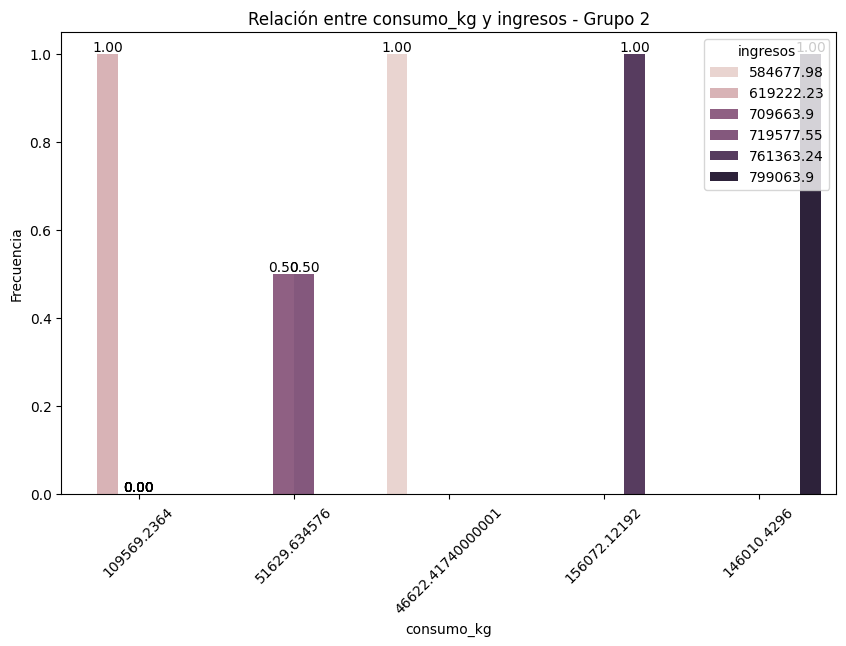

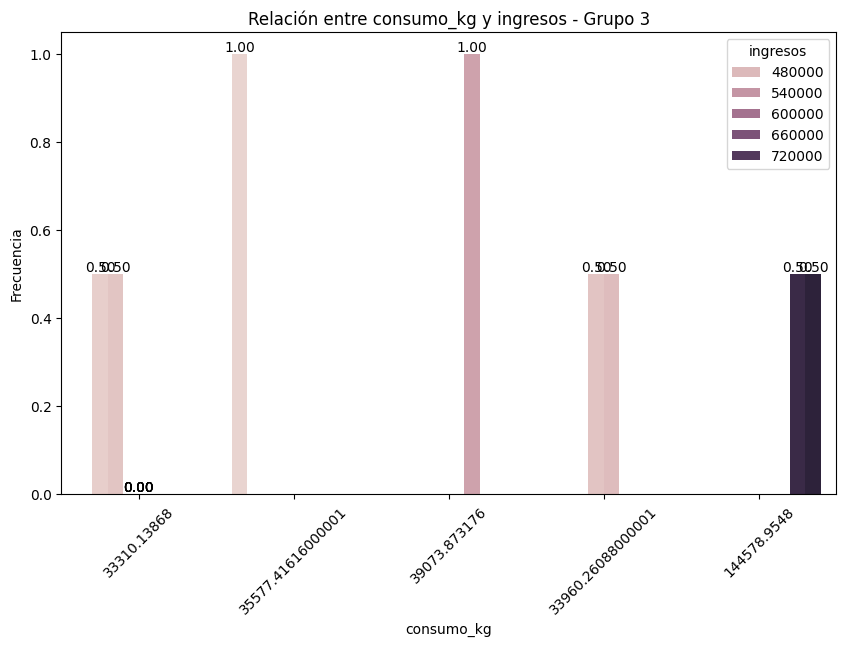

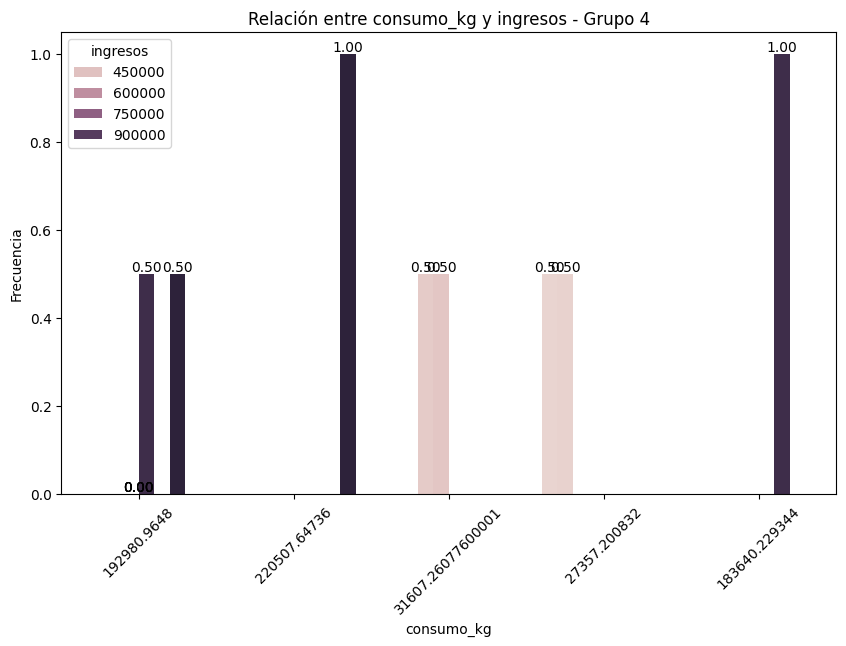

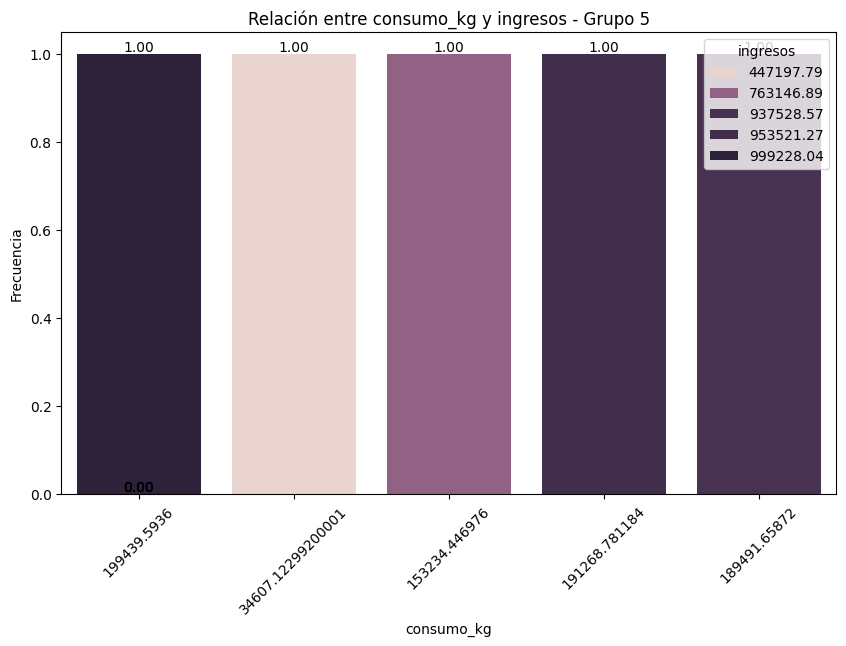

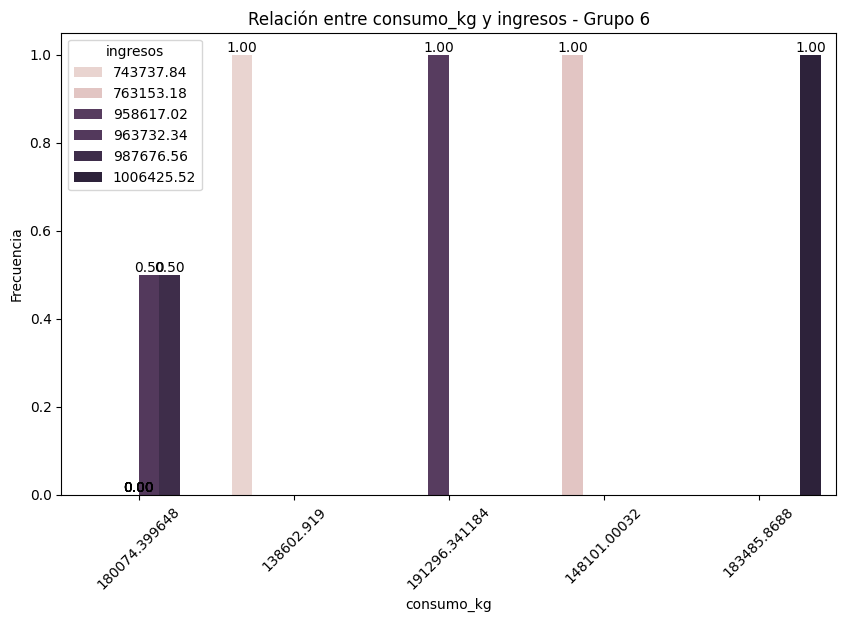

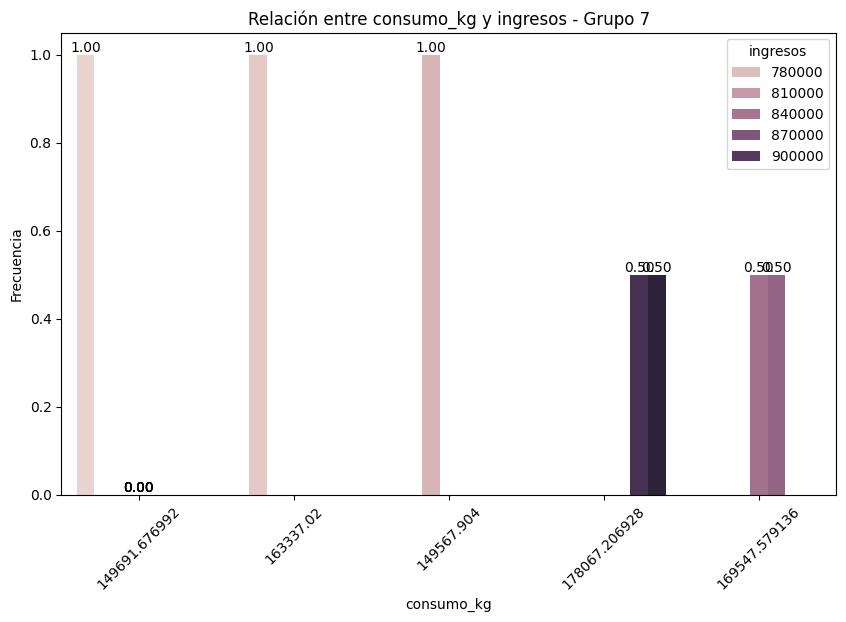

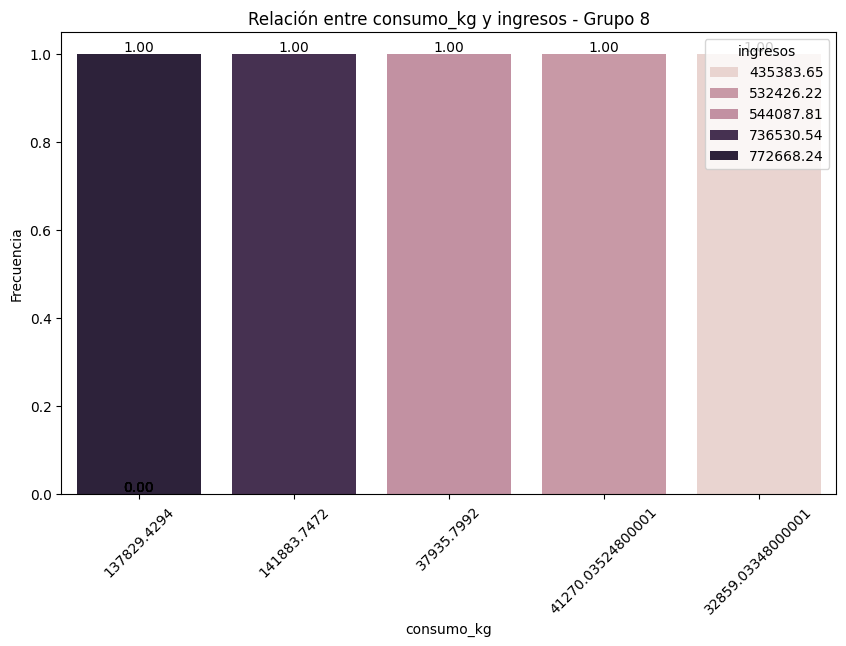

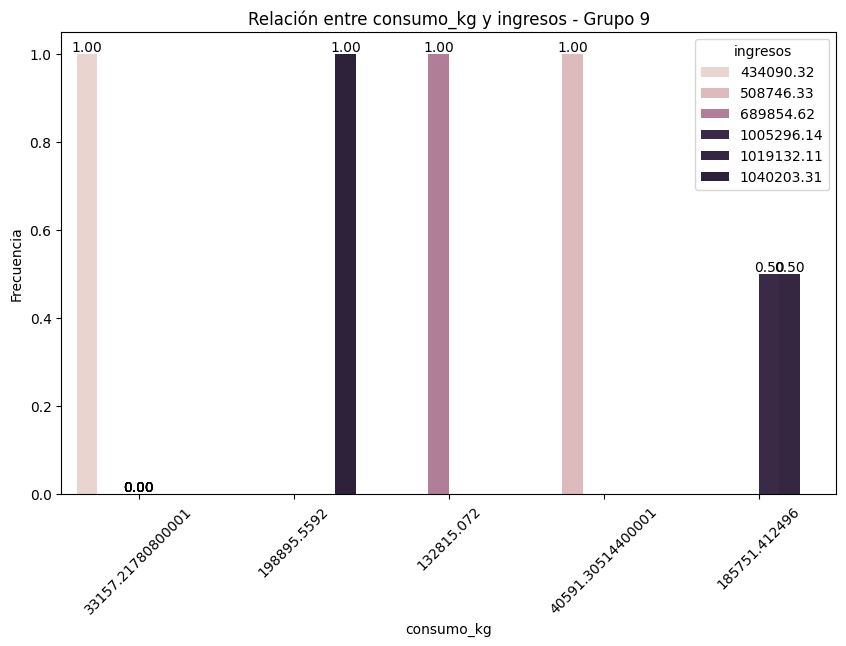

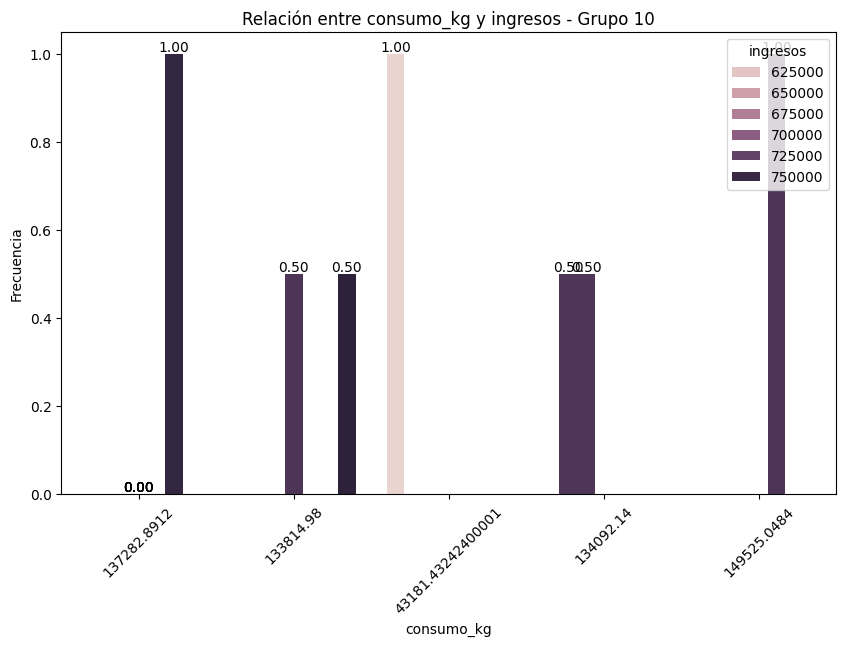

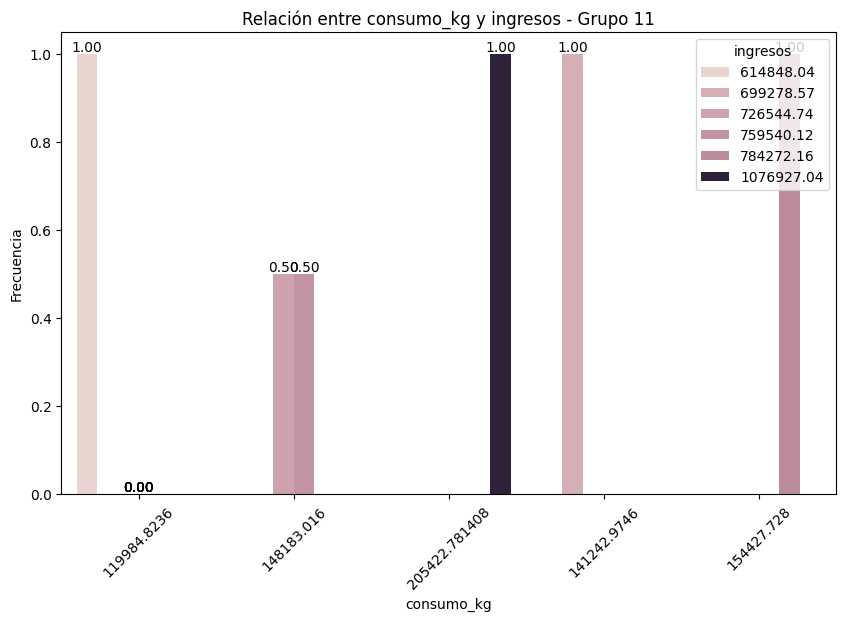

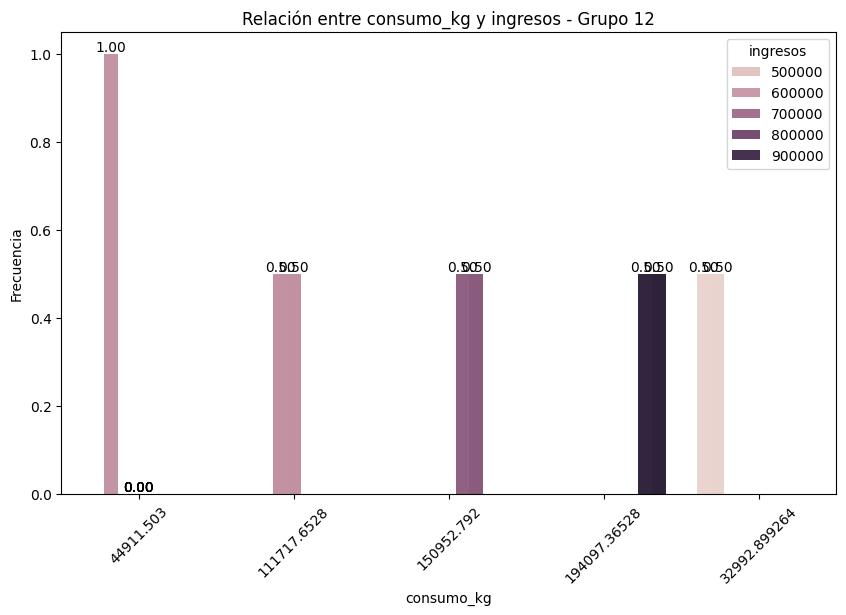

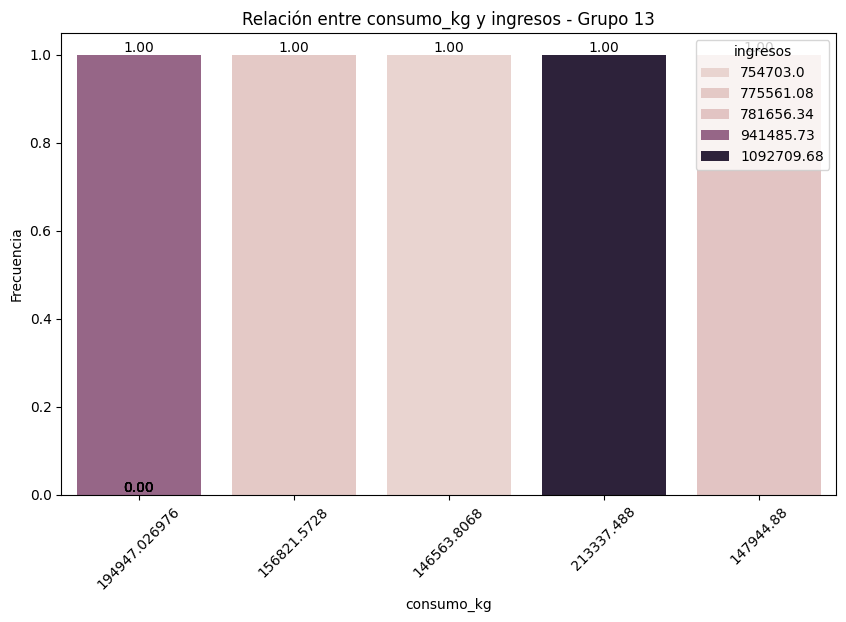

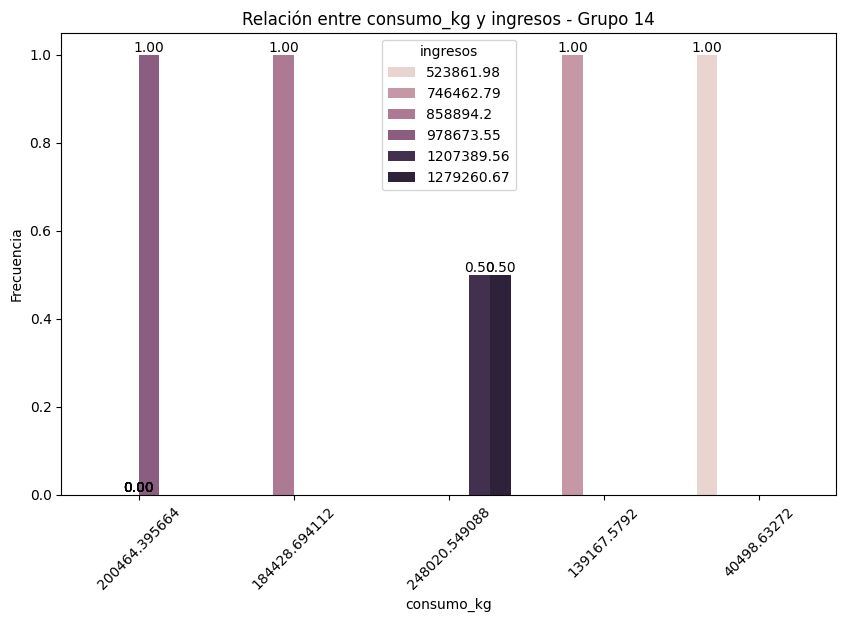

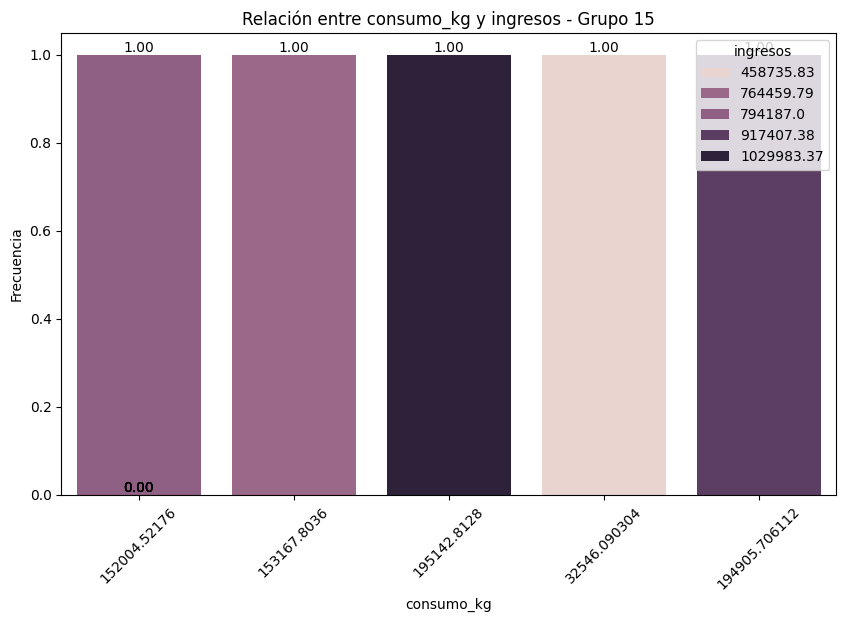

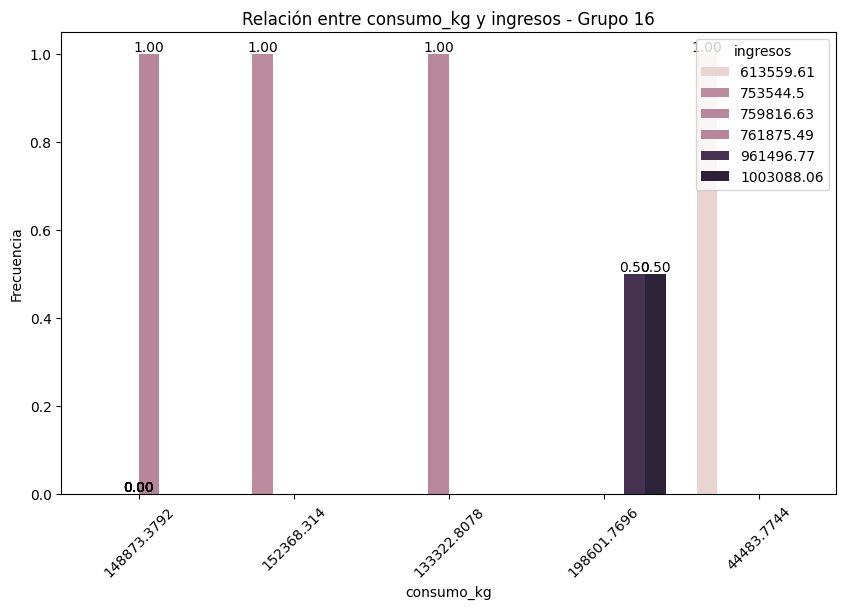

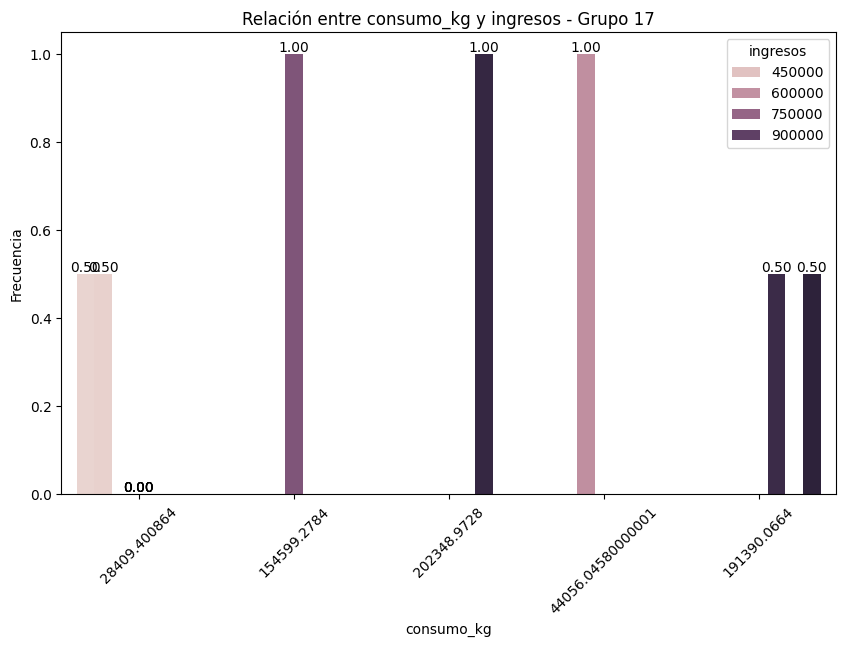

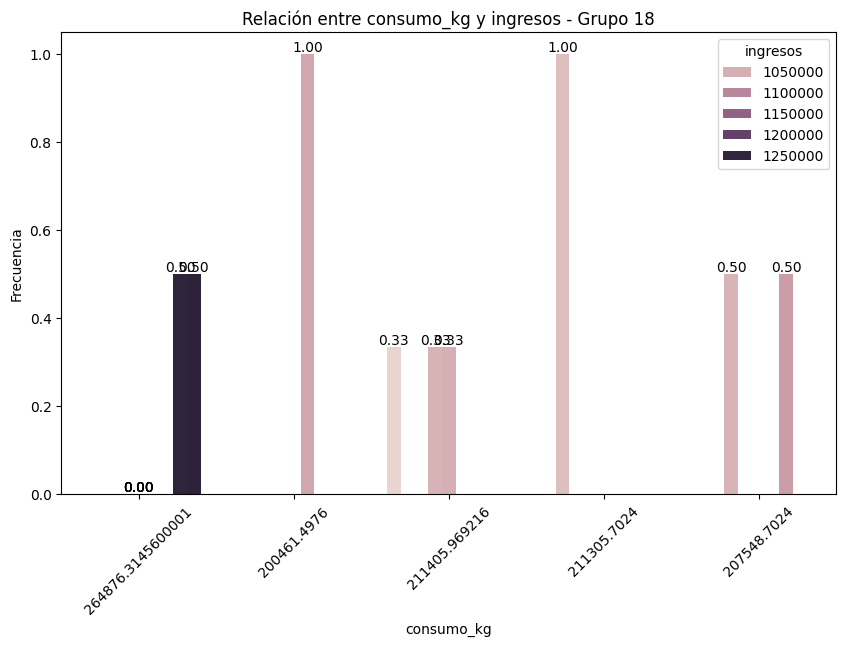

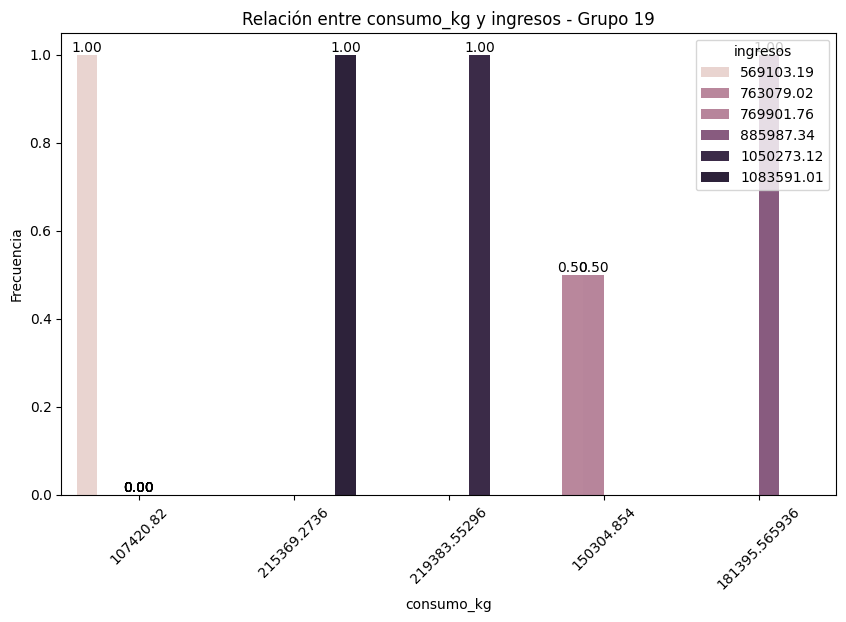

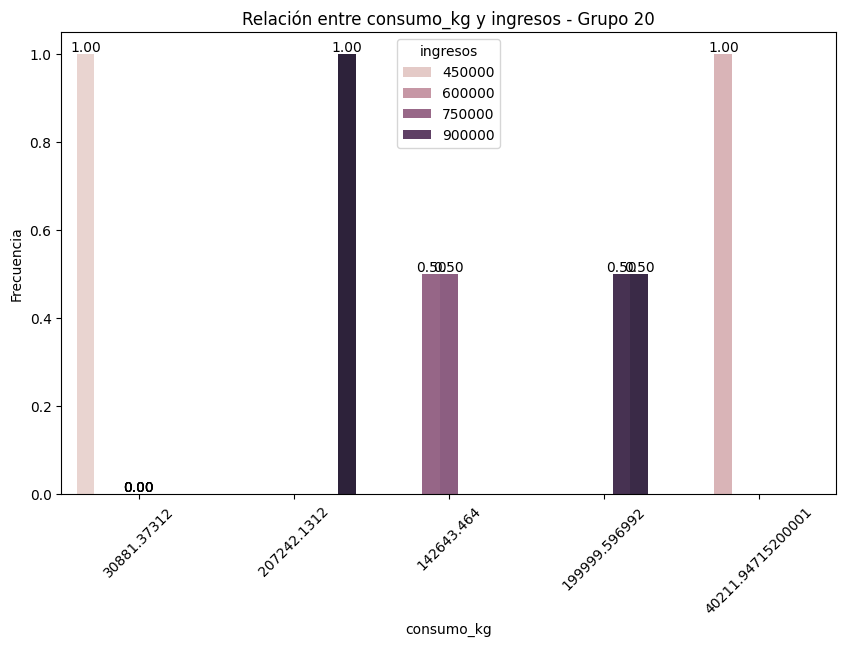

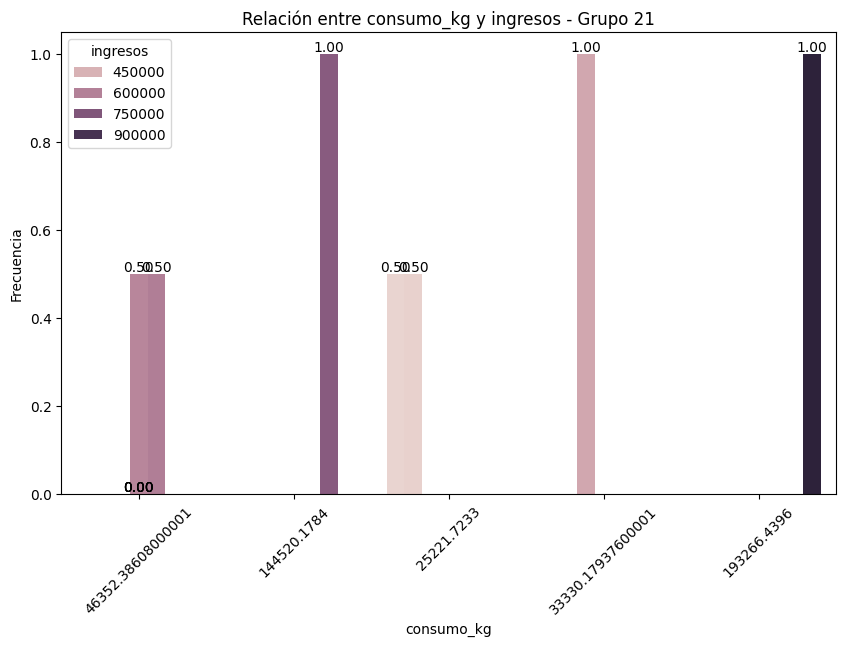

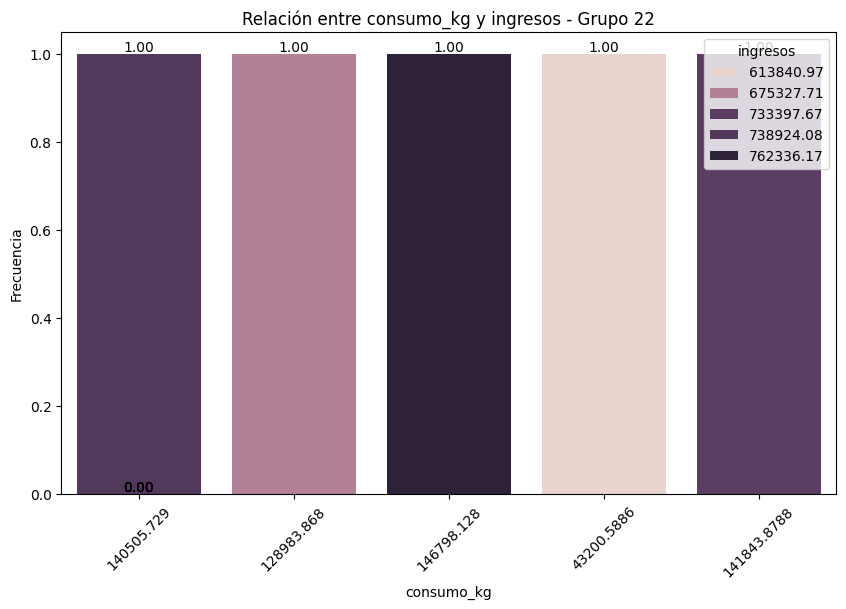

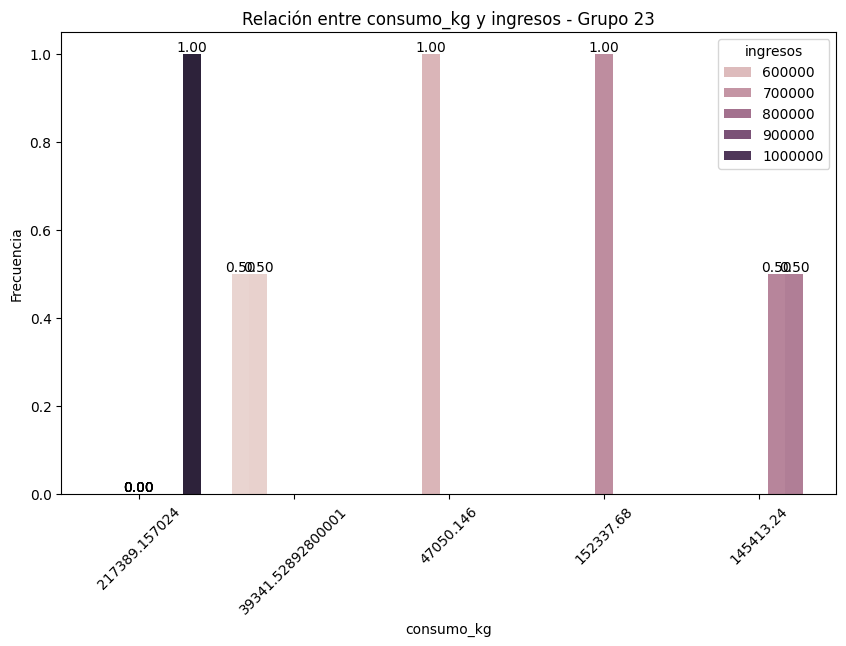

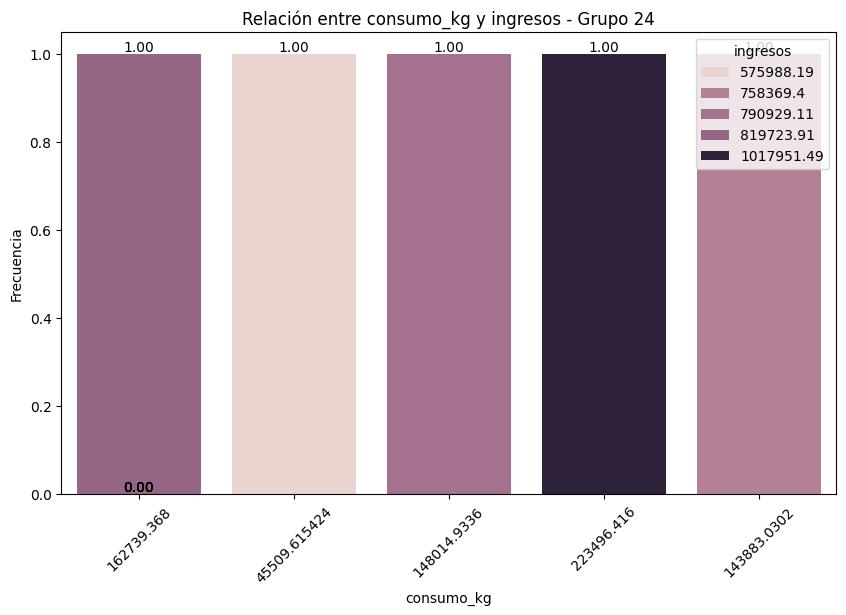

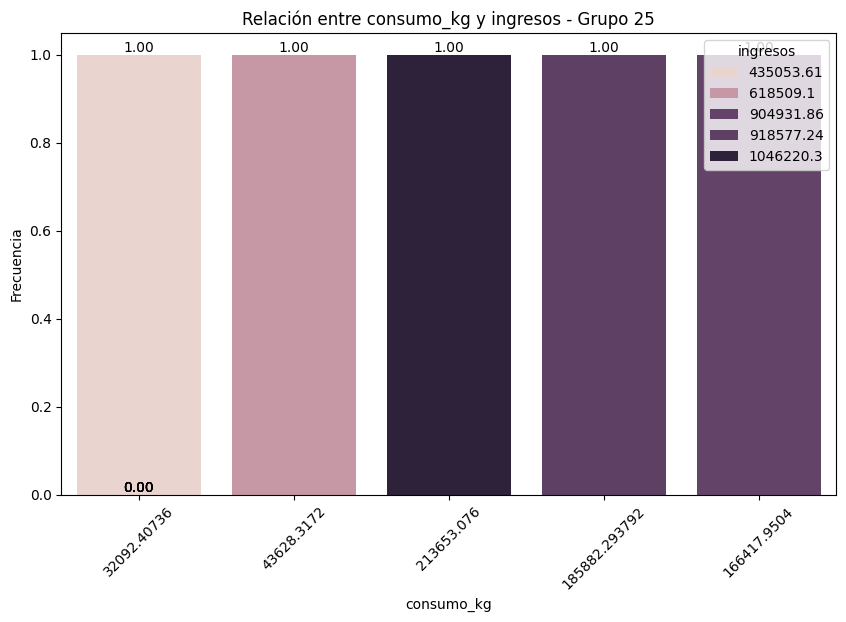

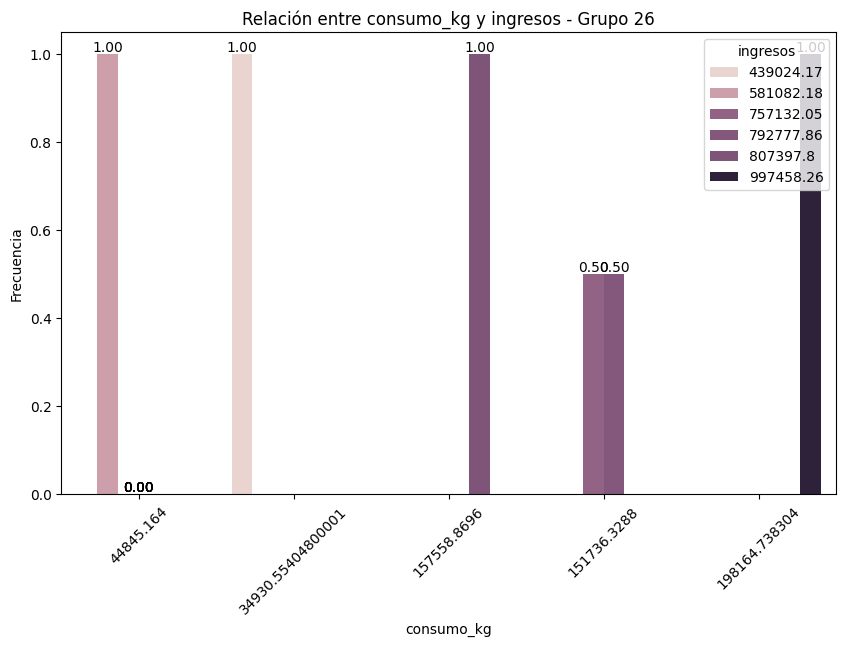

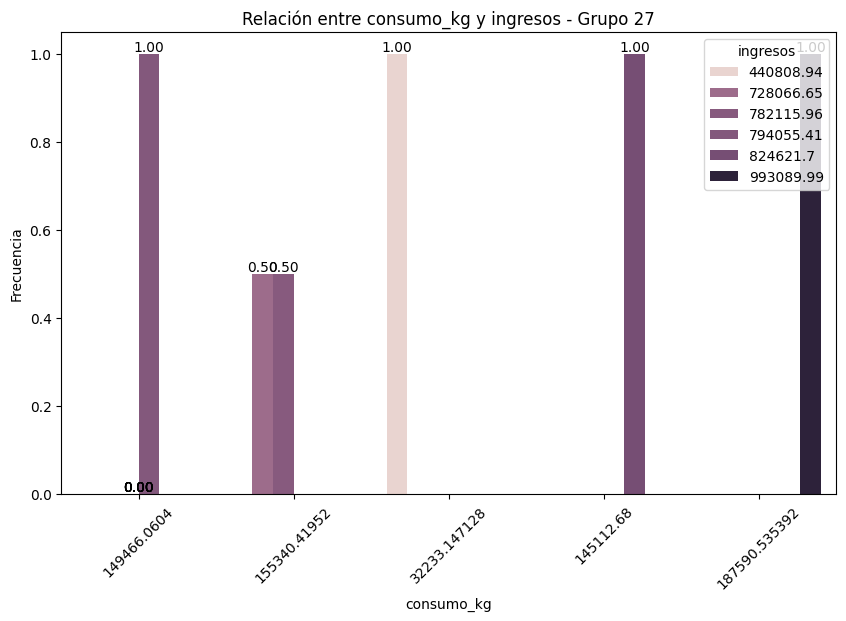

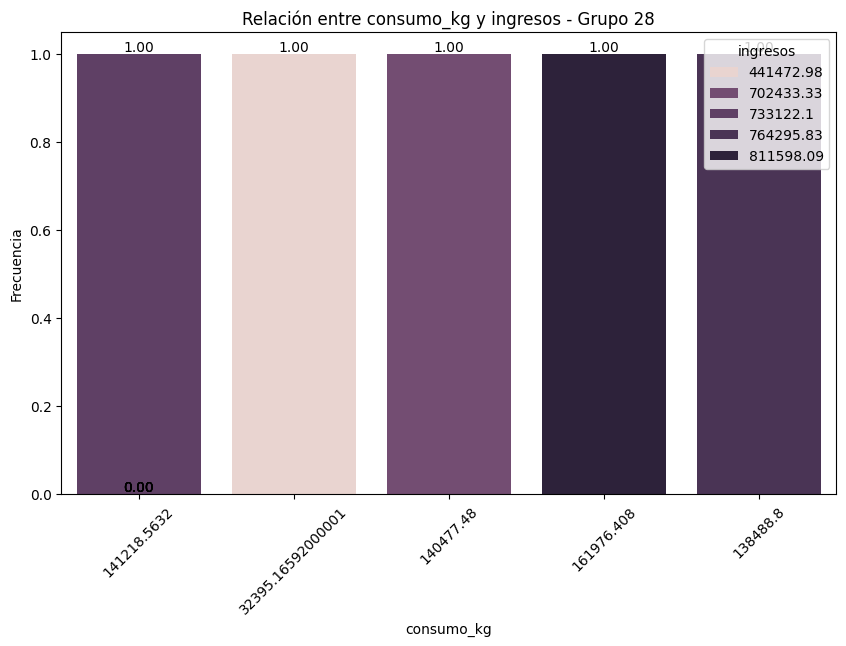

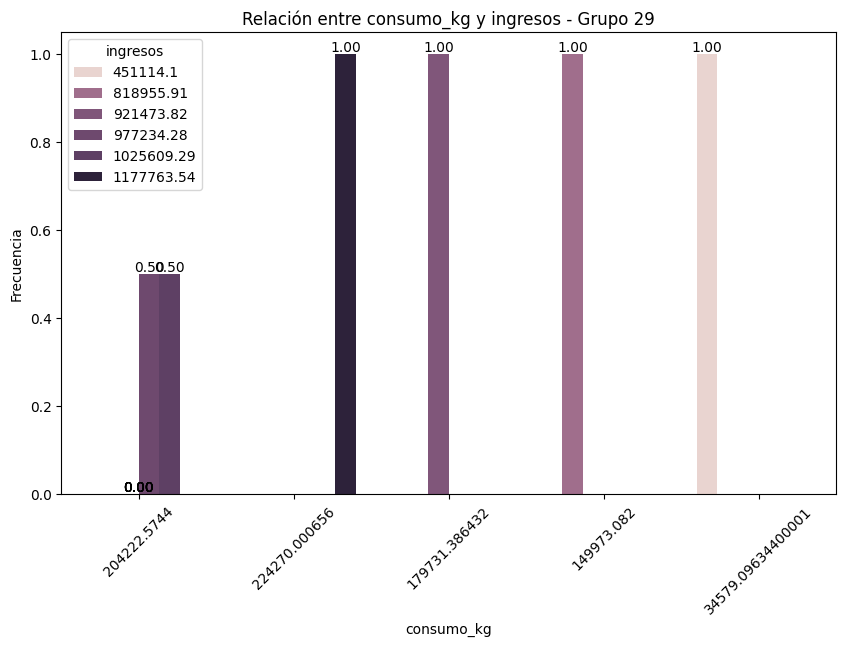

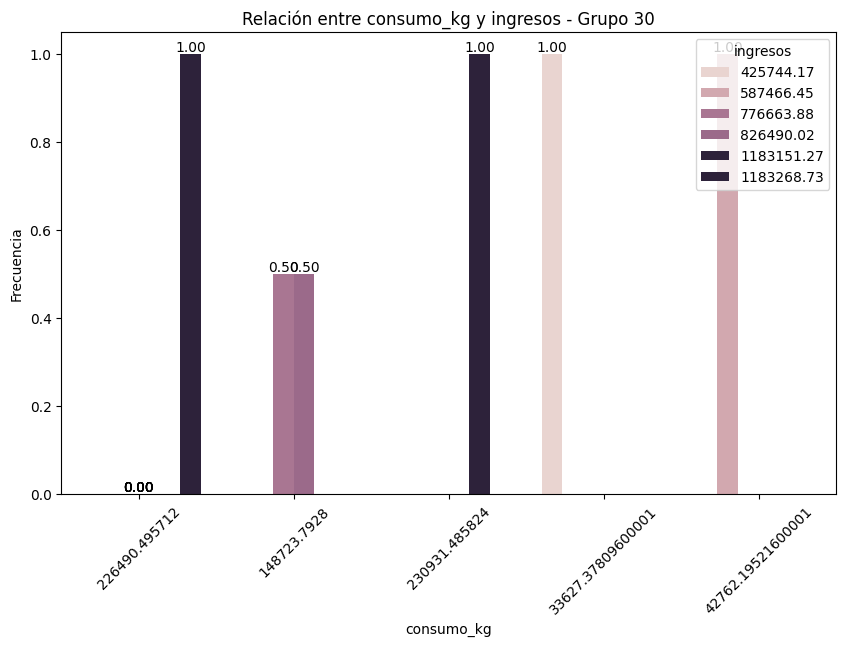

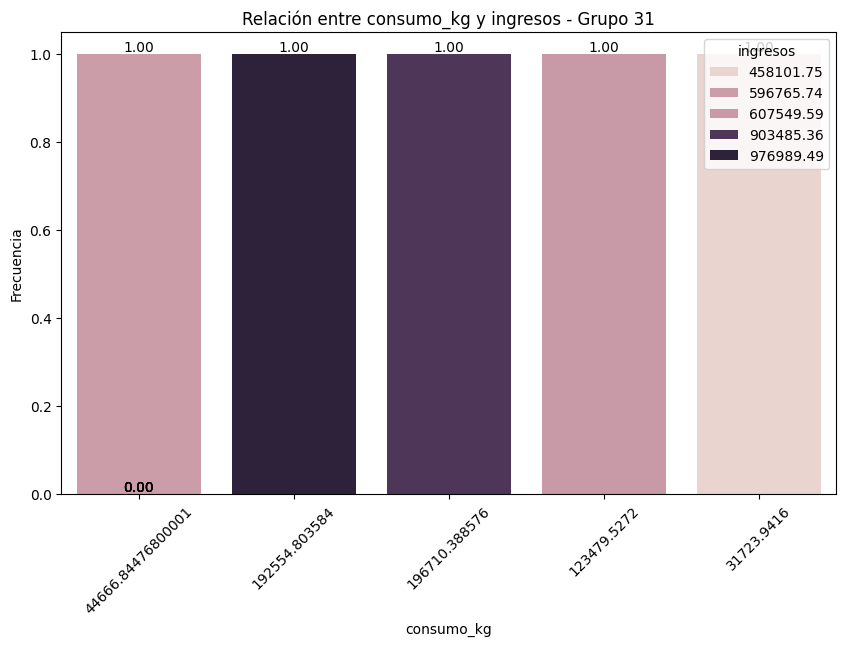

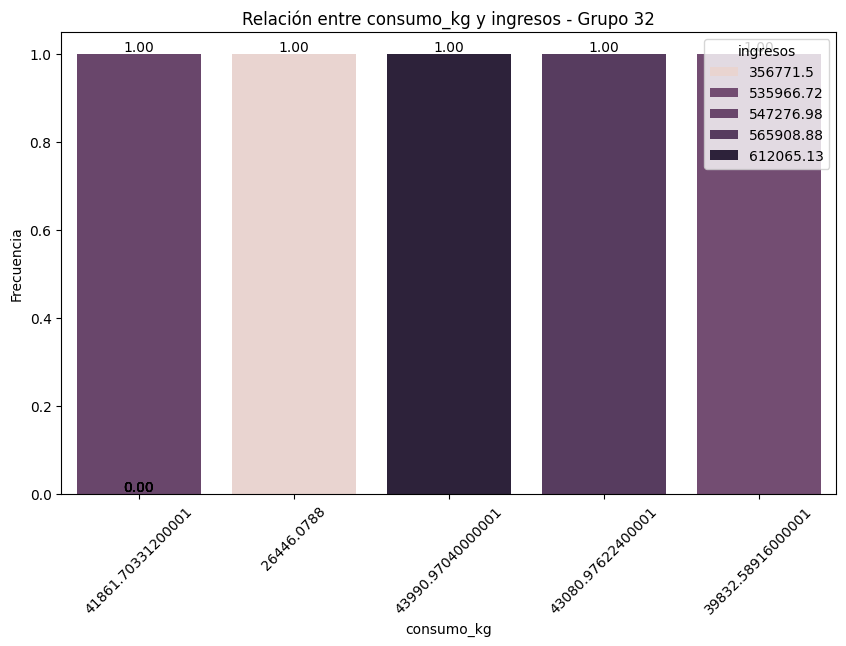

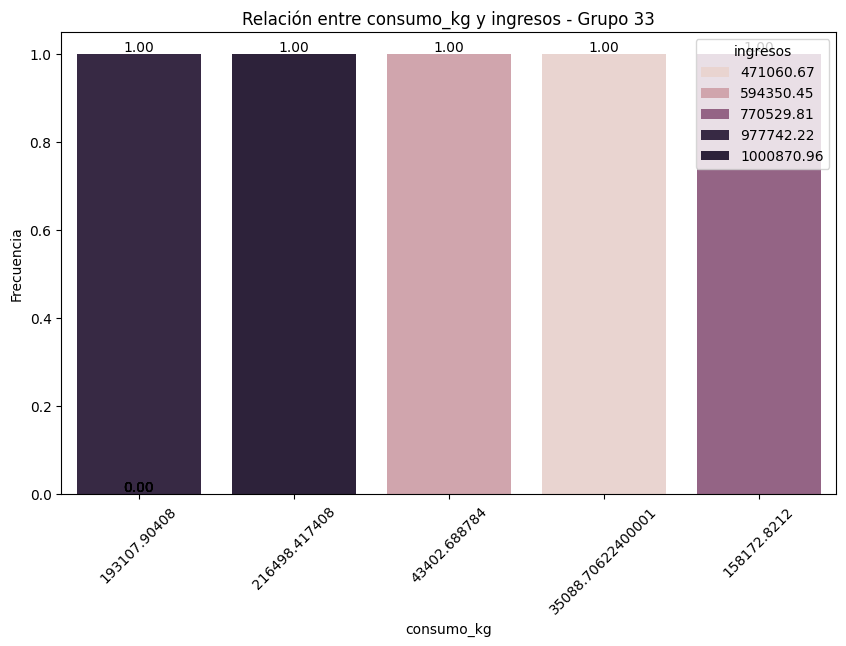

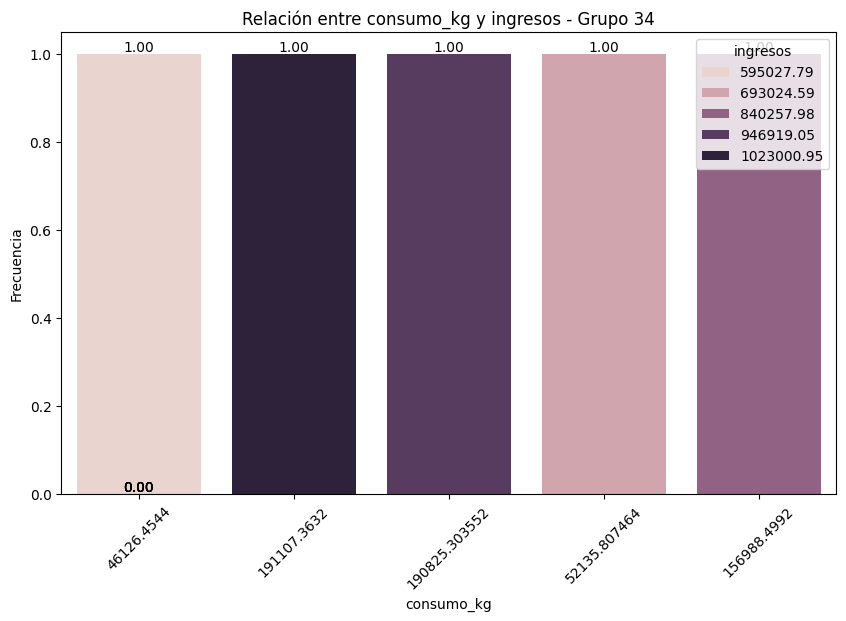

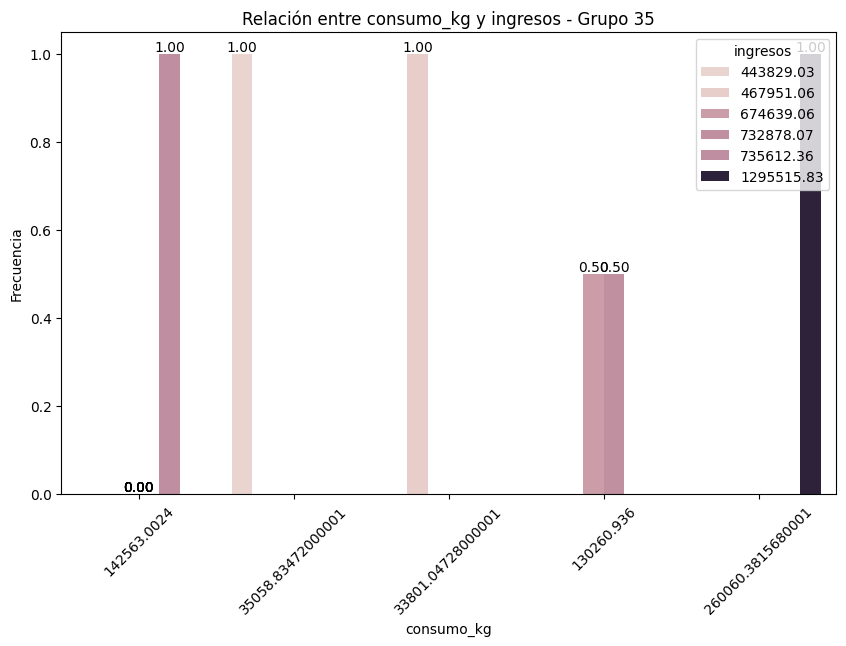

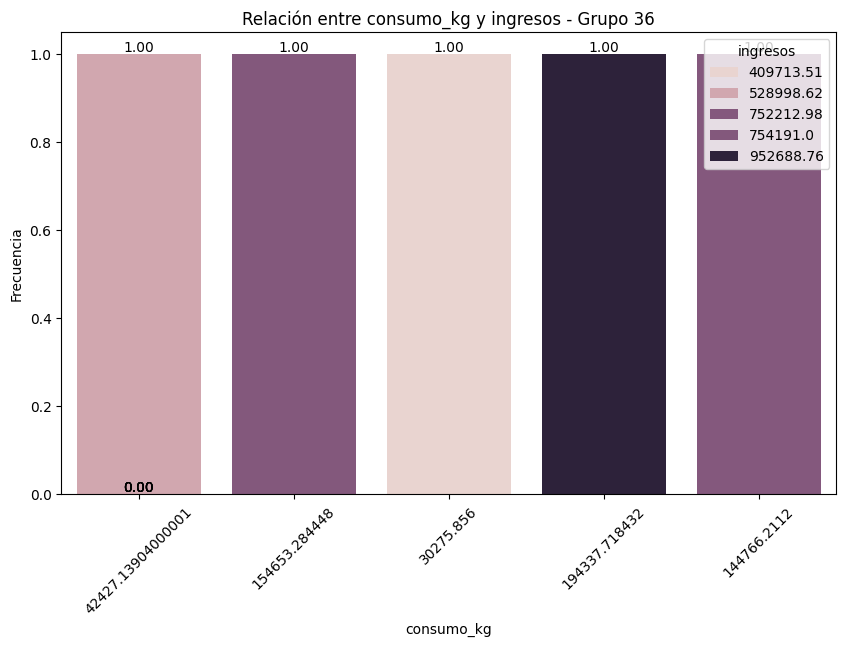

Respuesta Media:


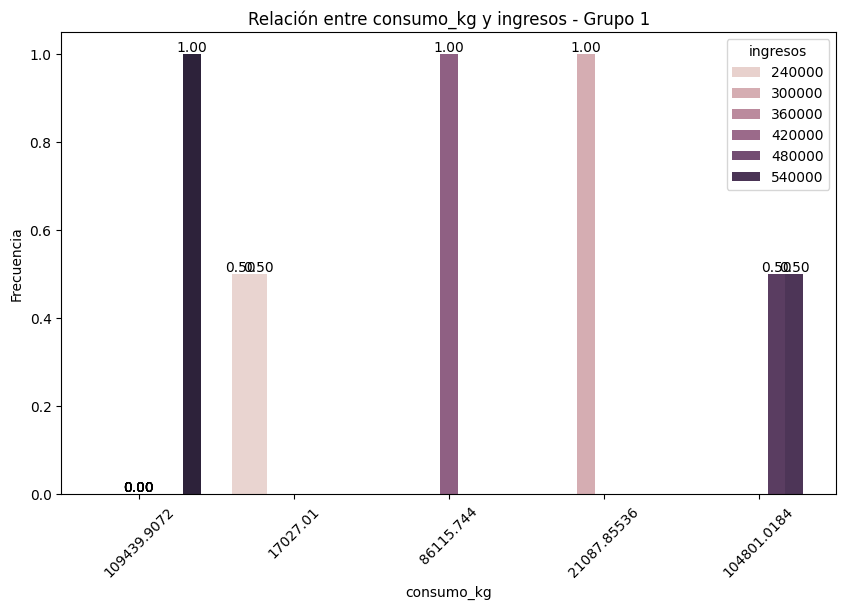

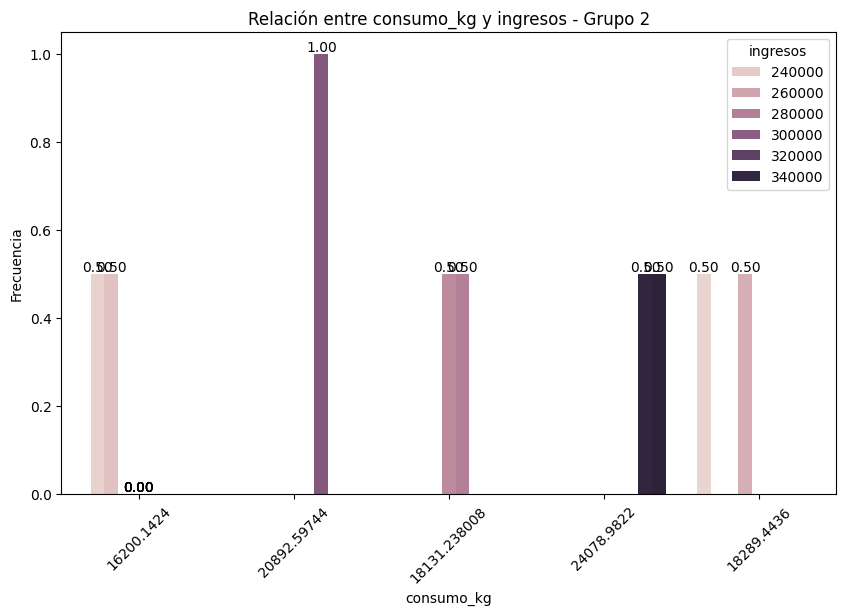

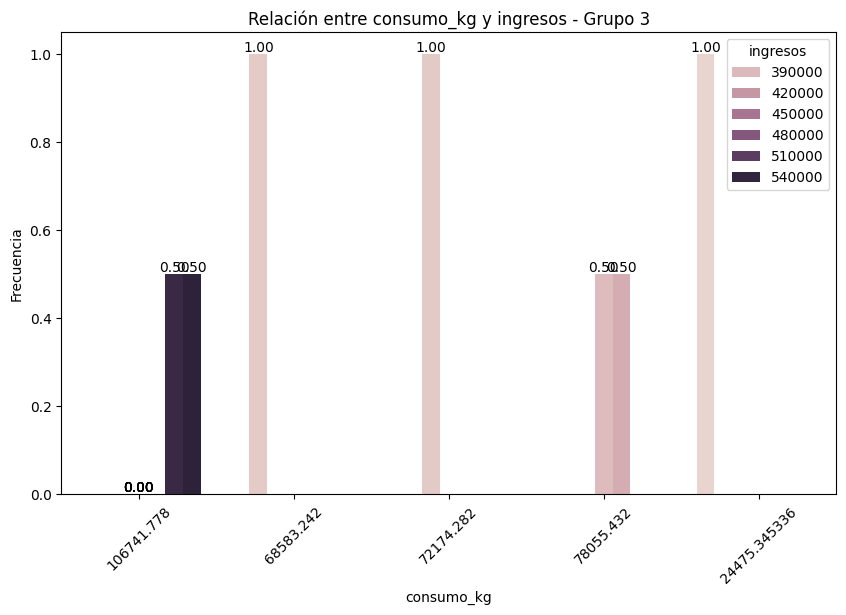

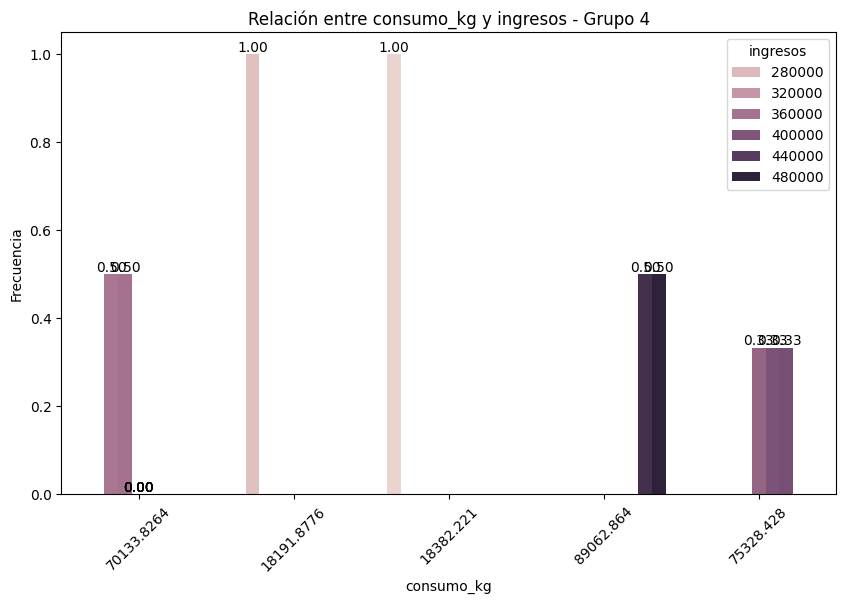

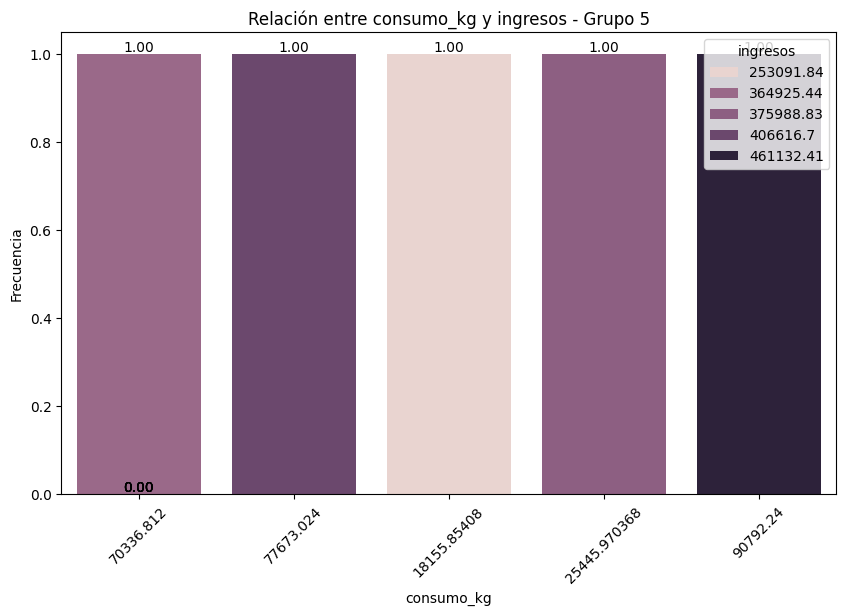

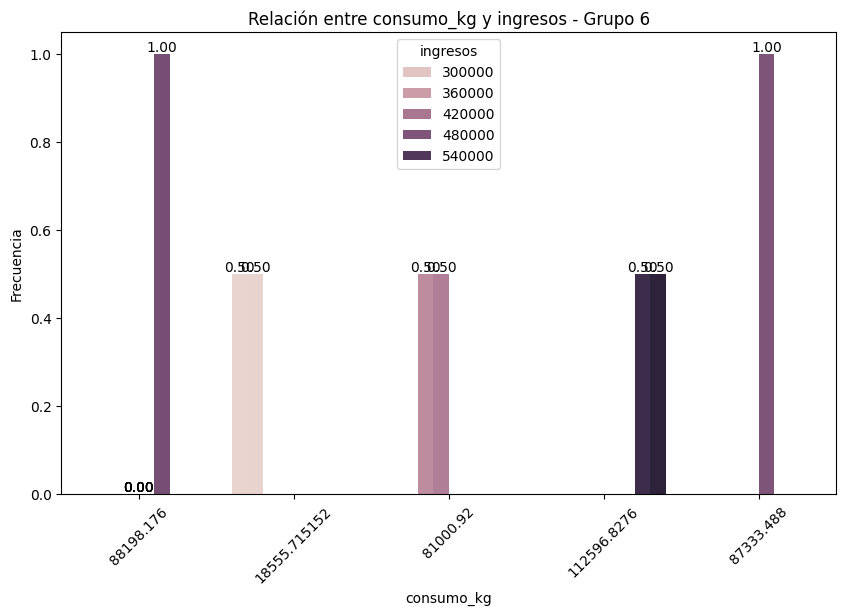

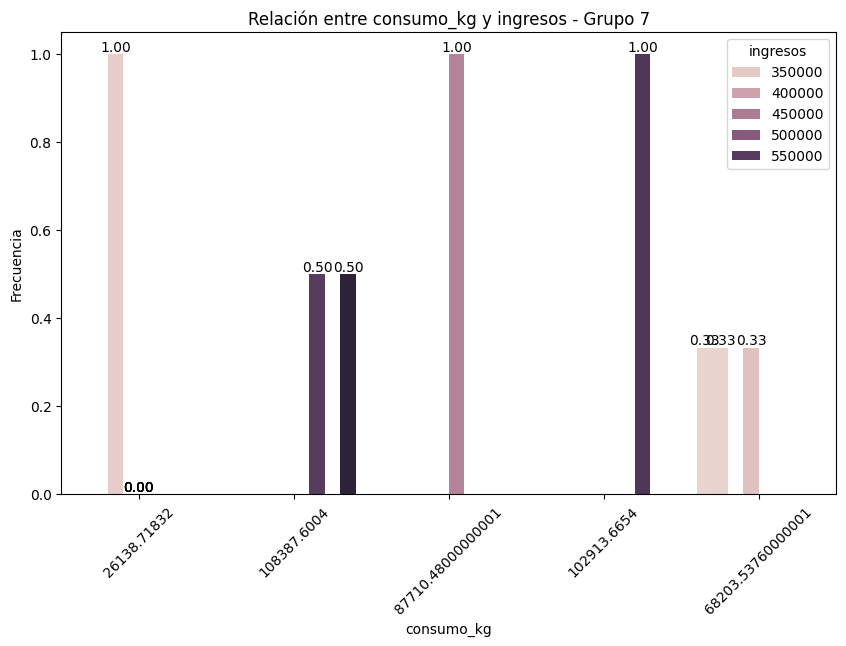

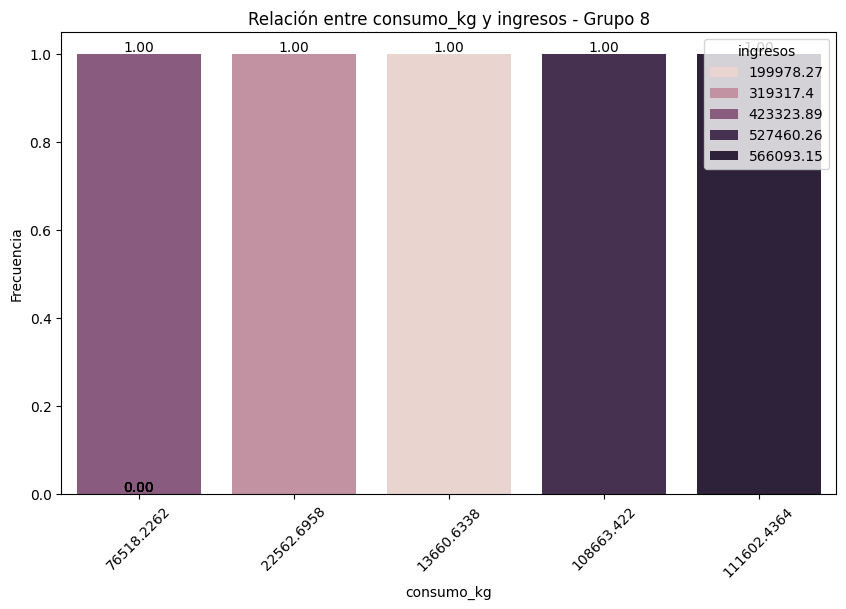

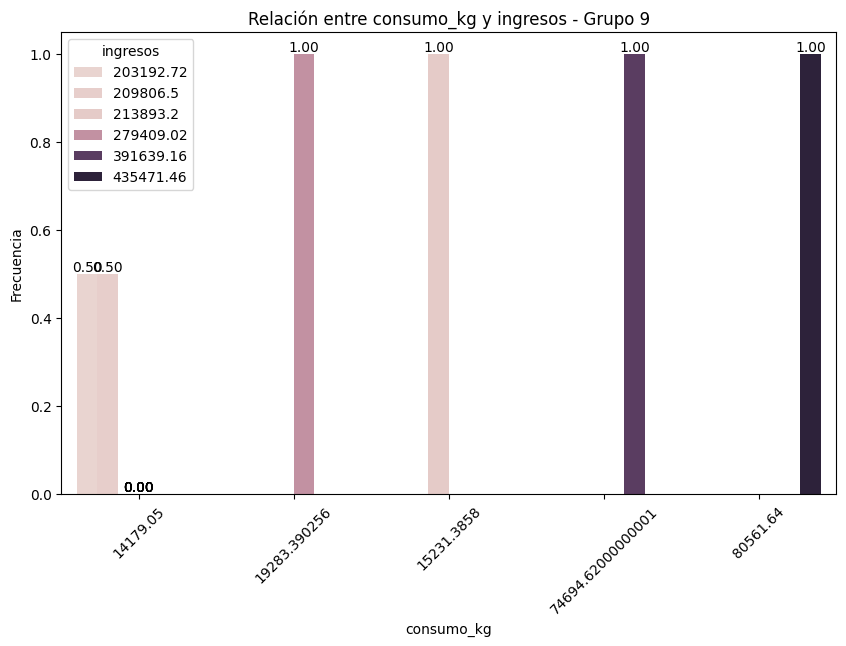

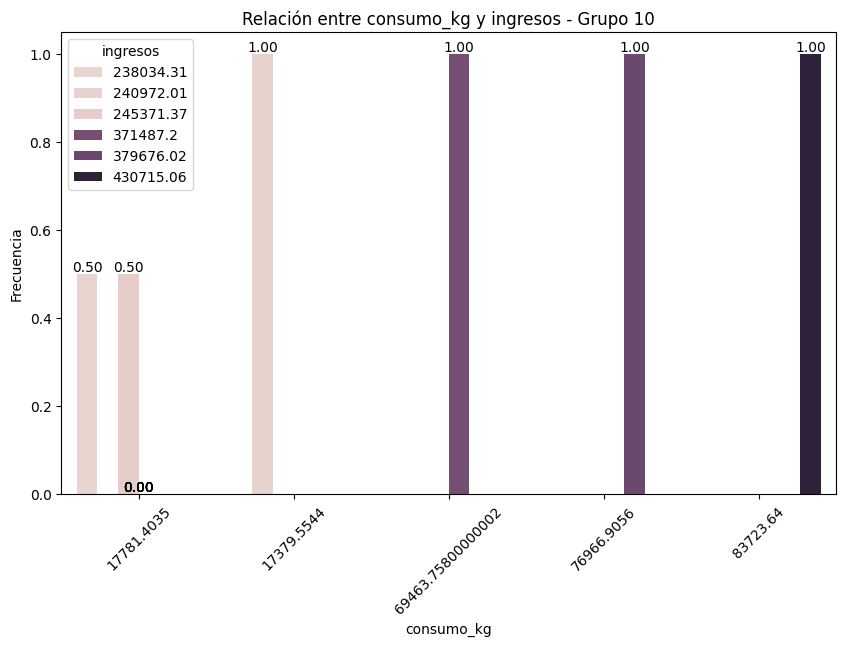

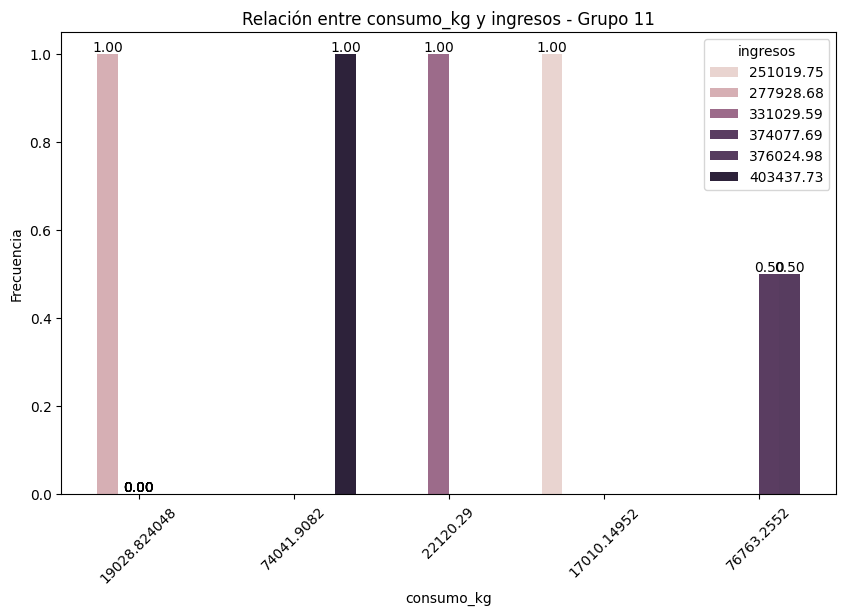

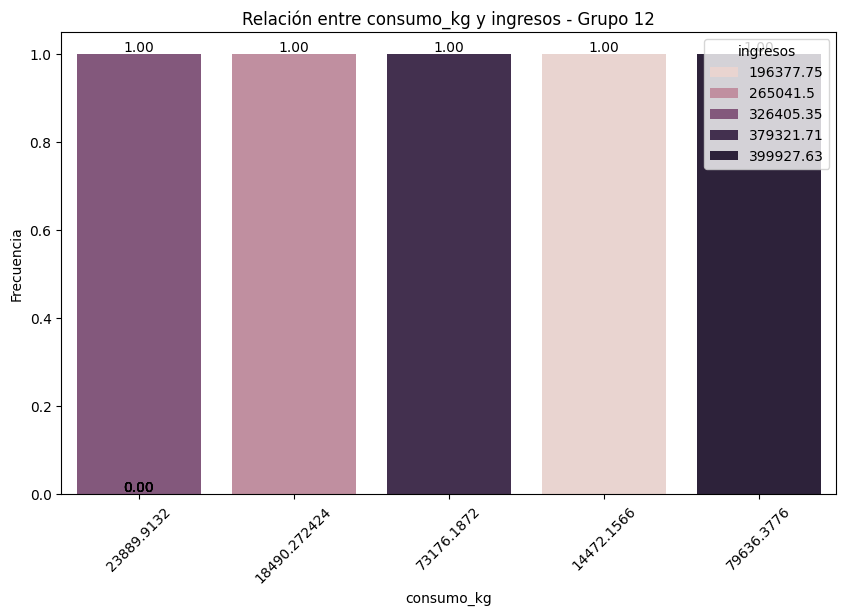

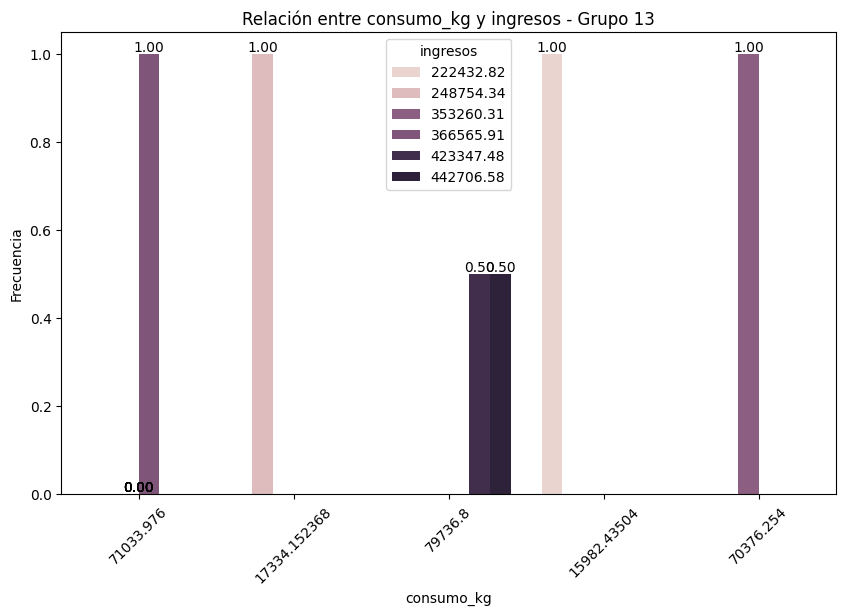

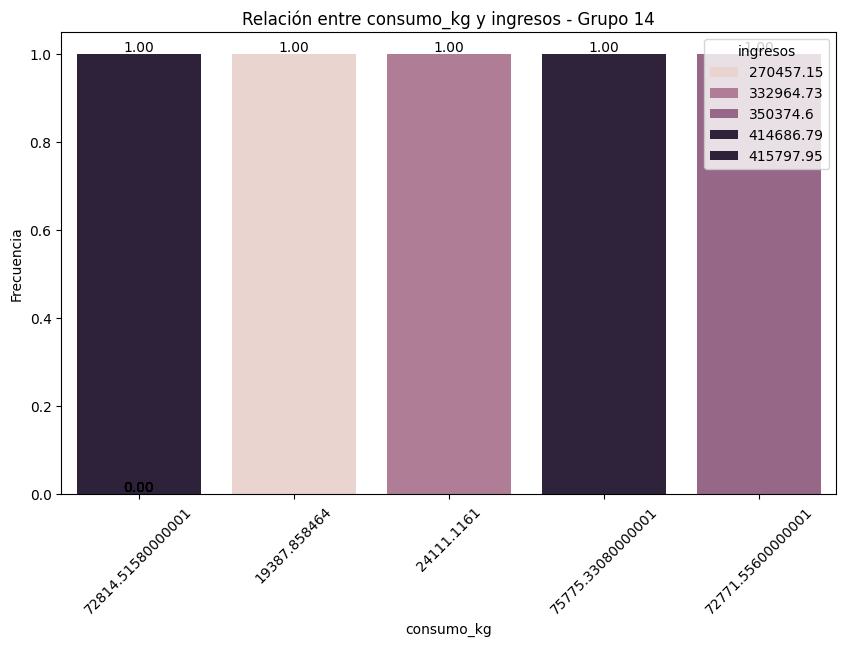

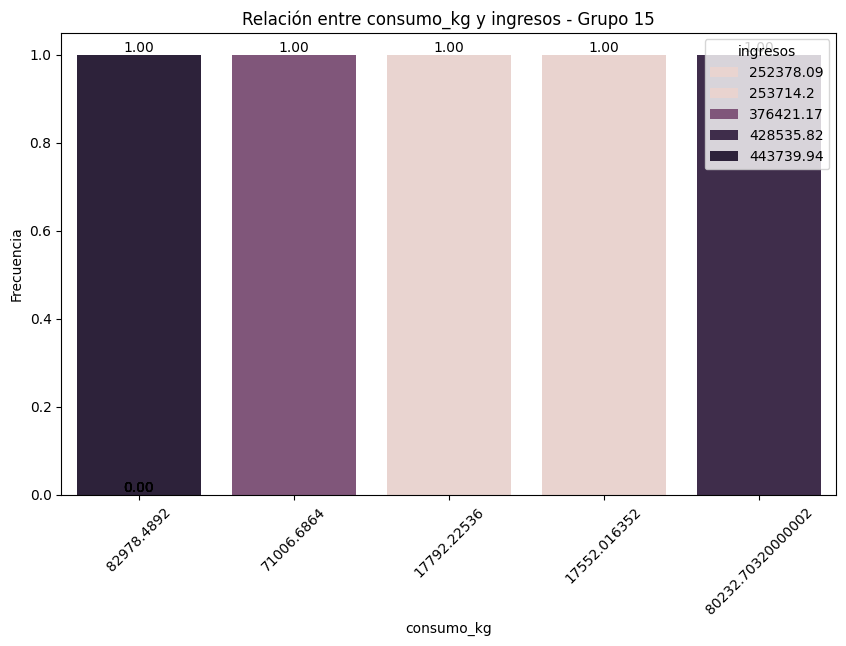

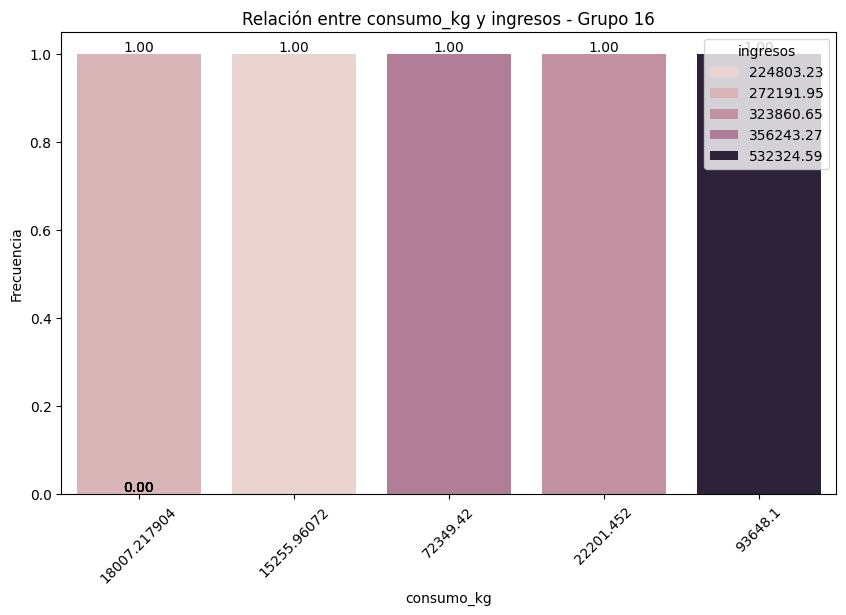

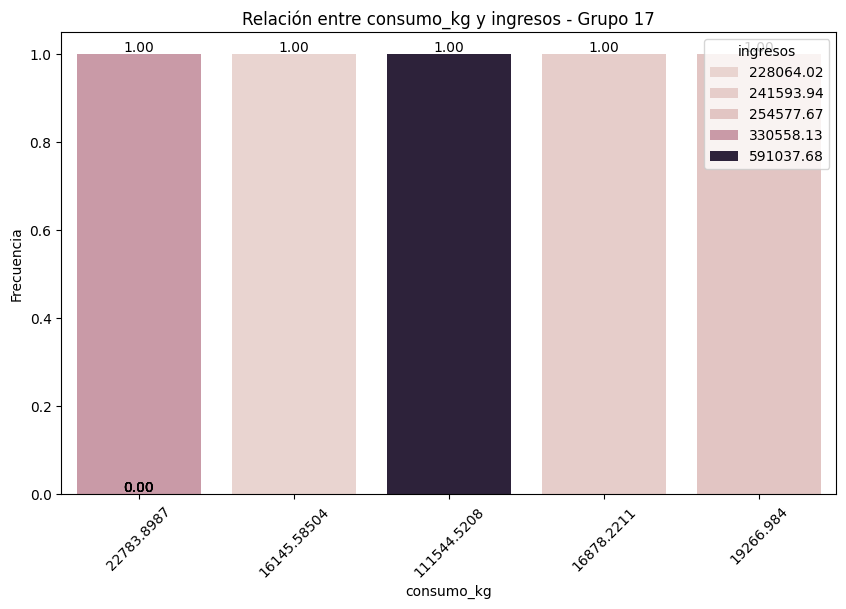

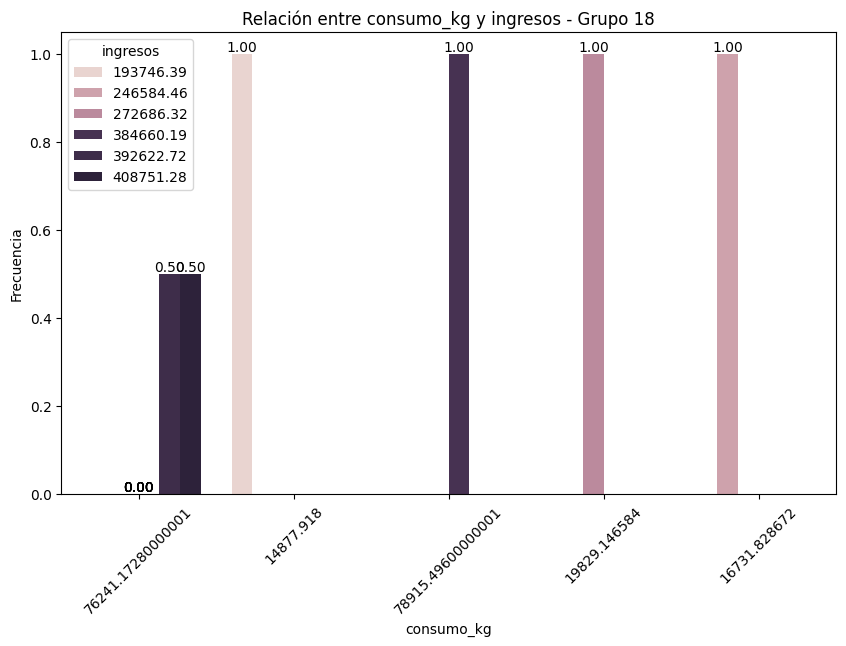

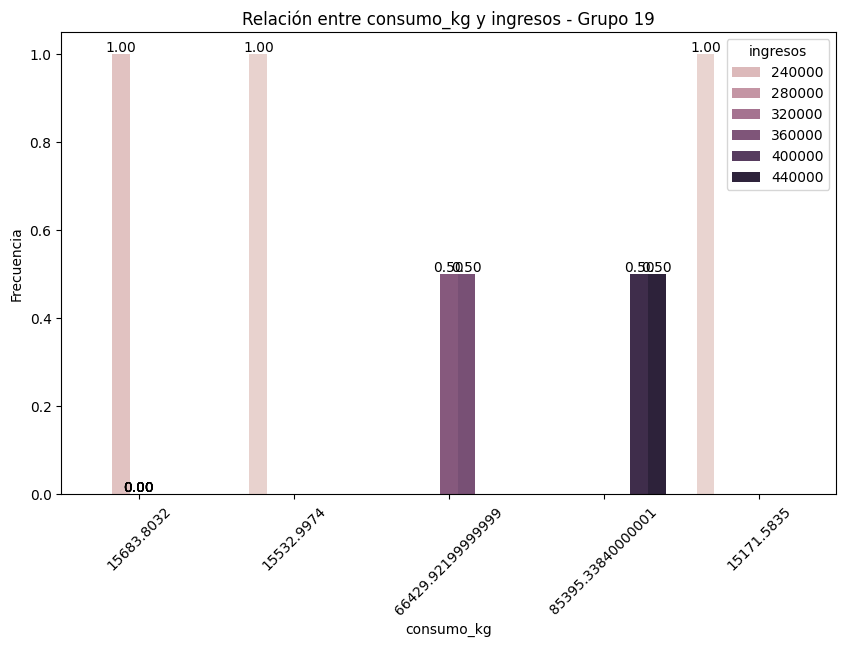

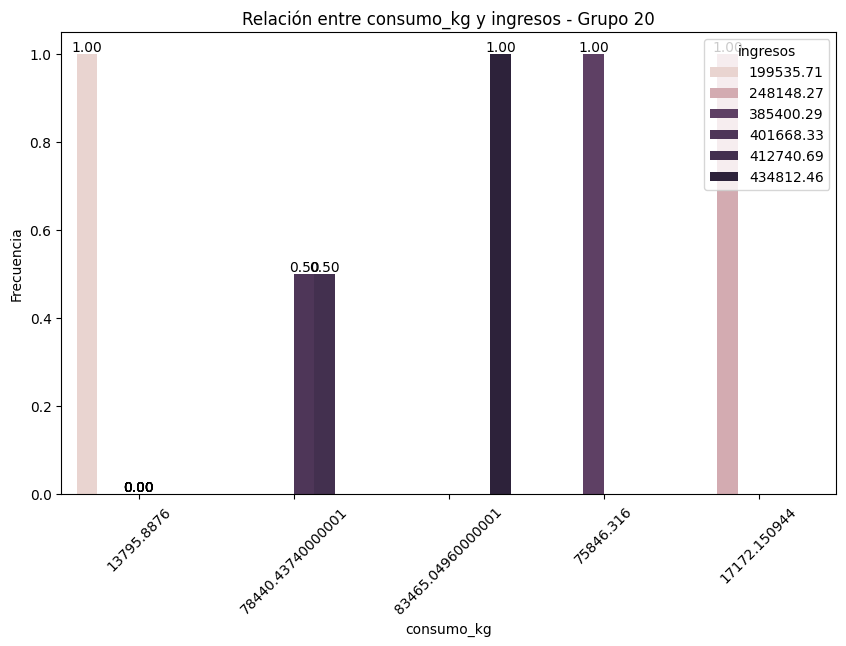

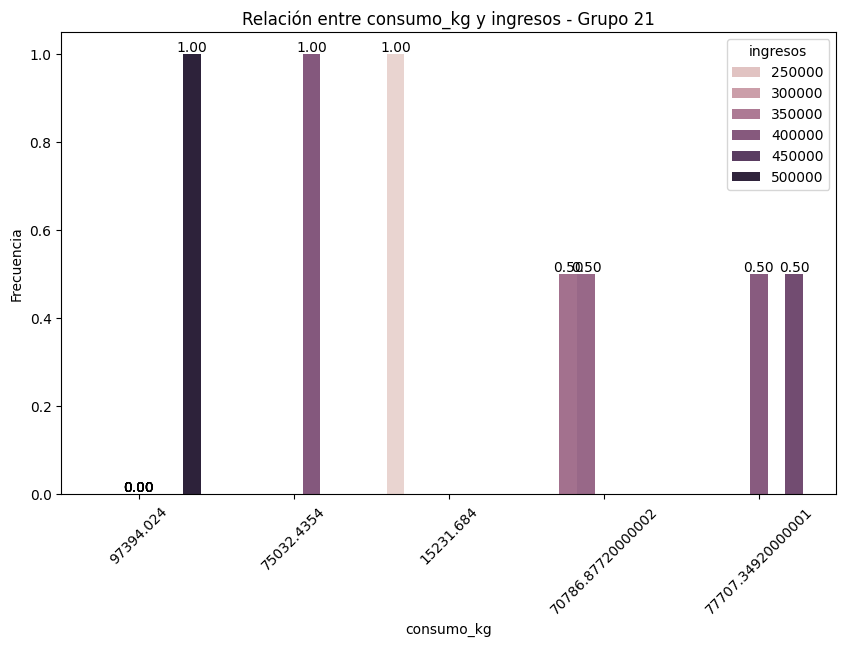

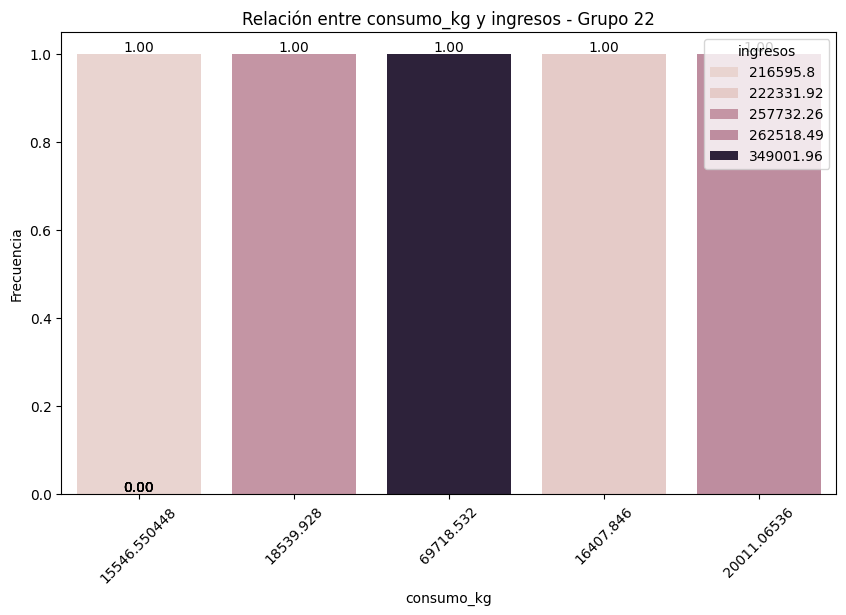

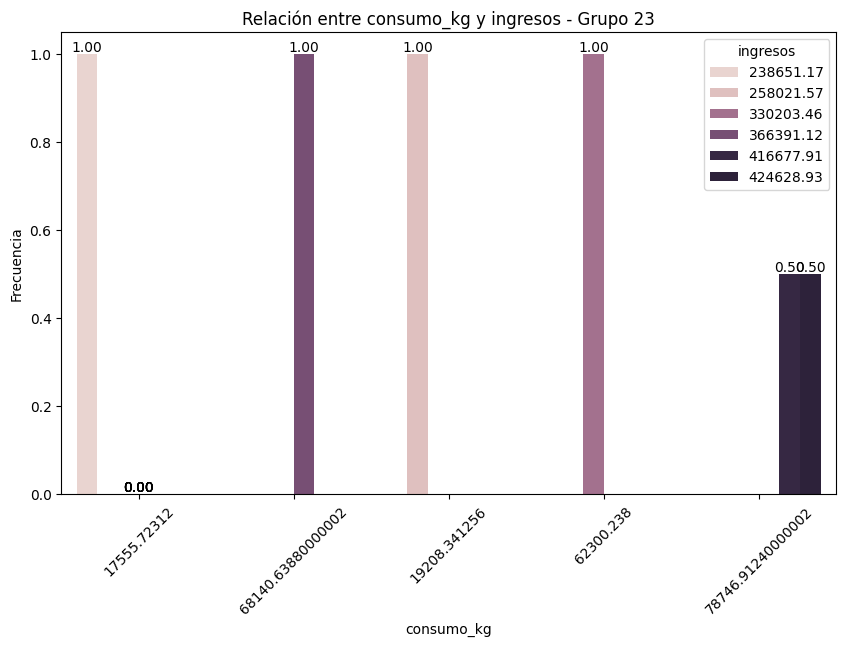

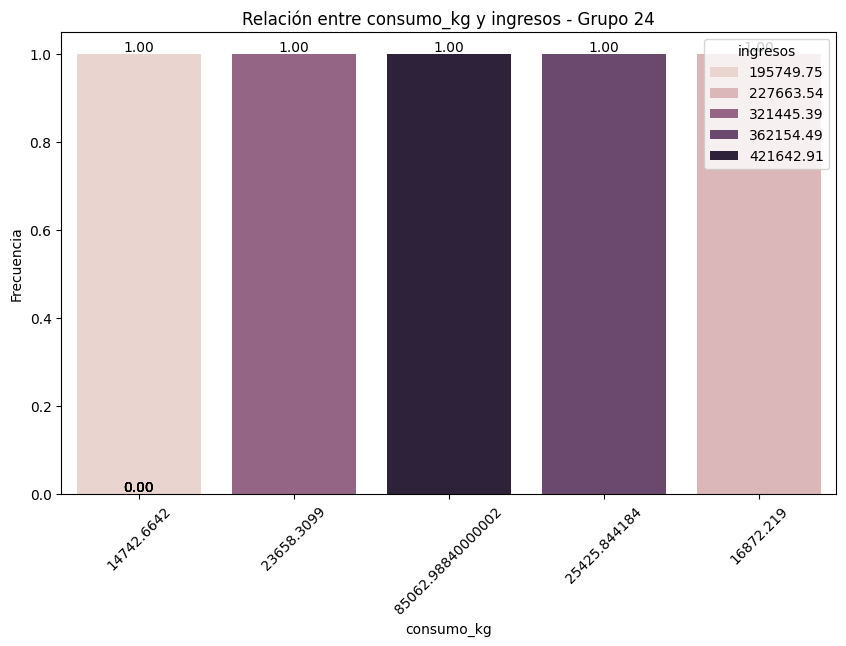

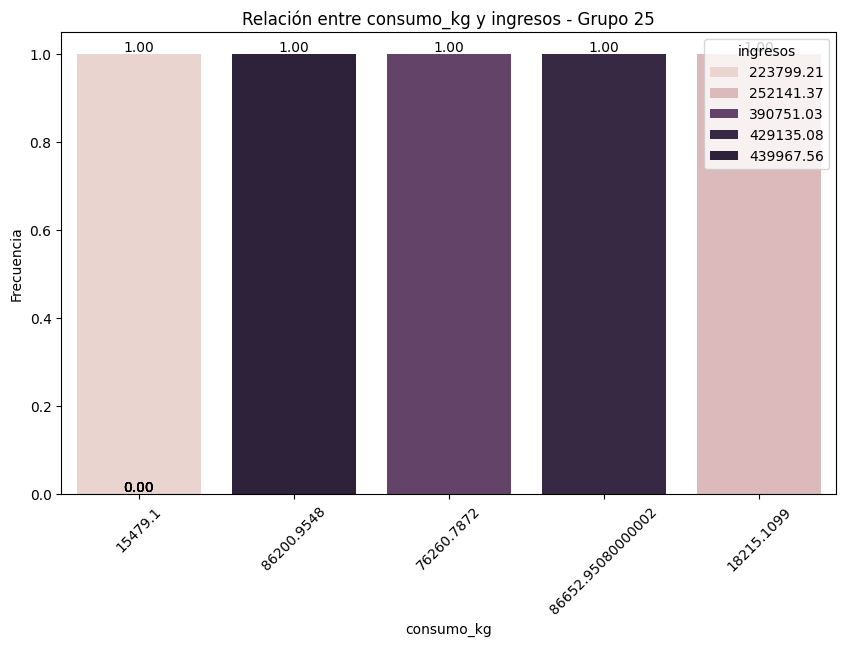

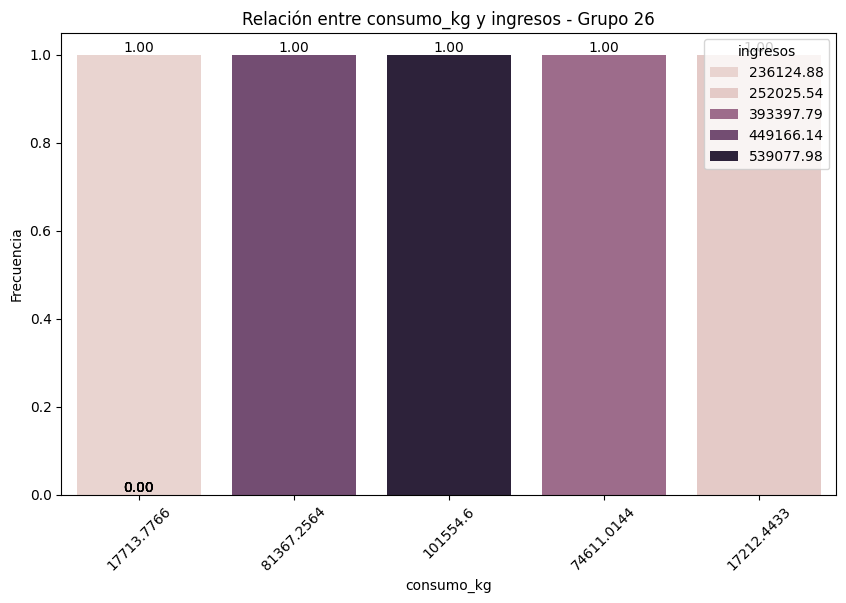

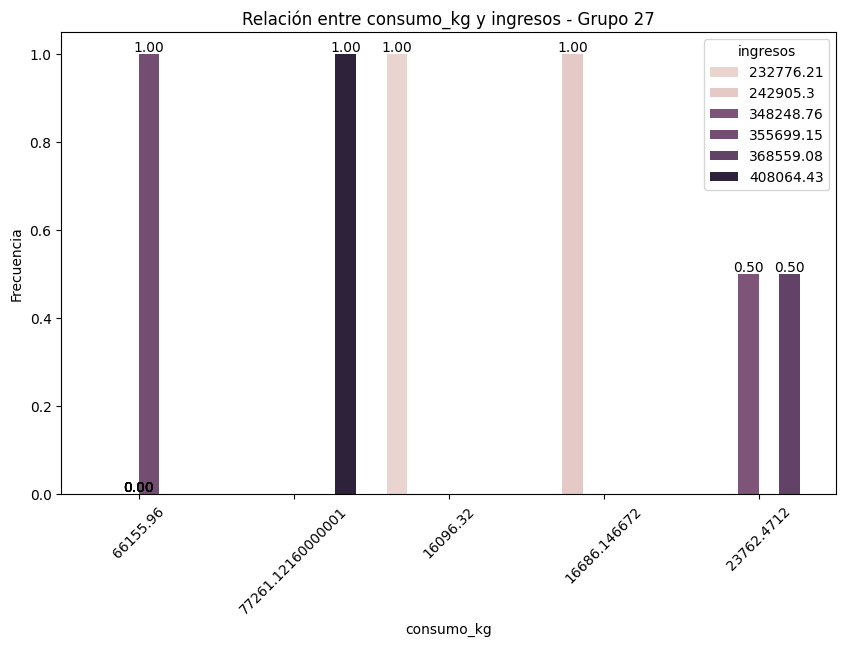

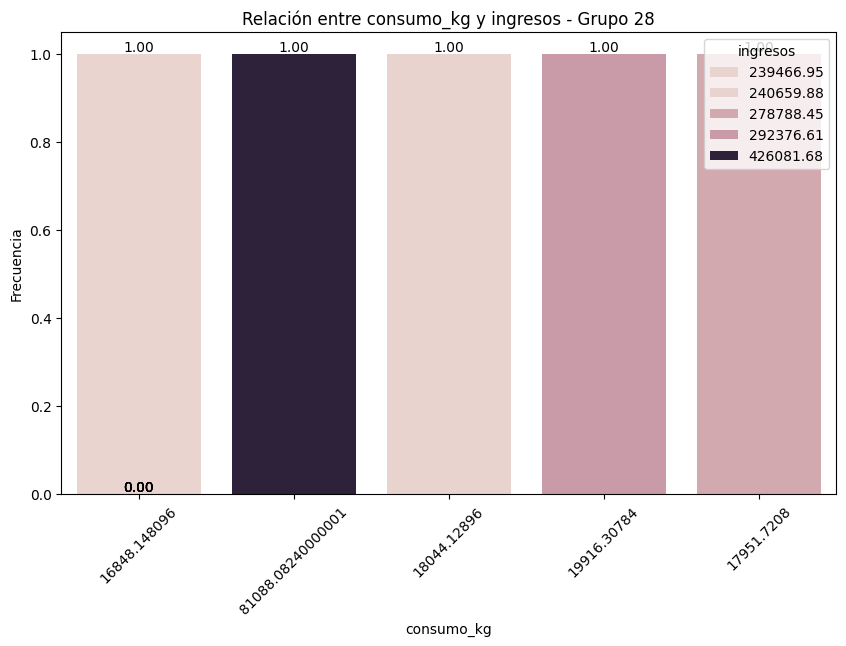

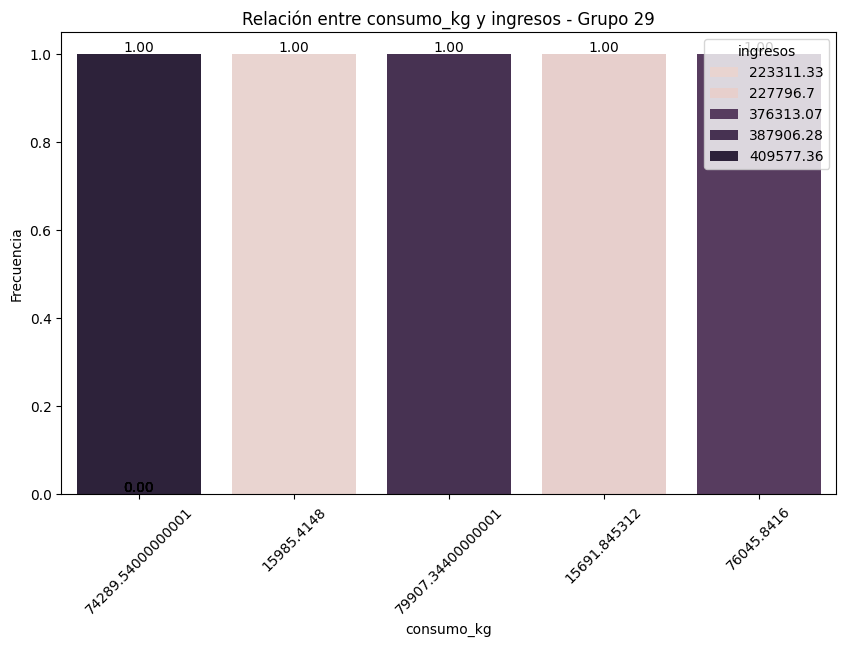

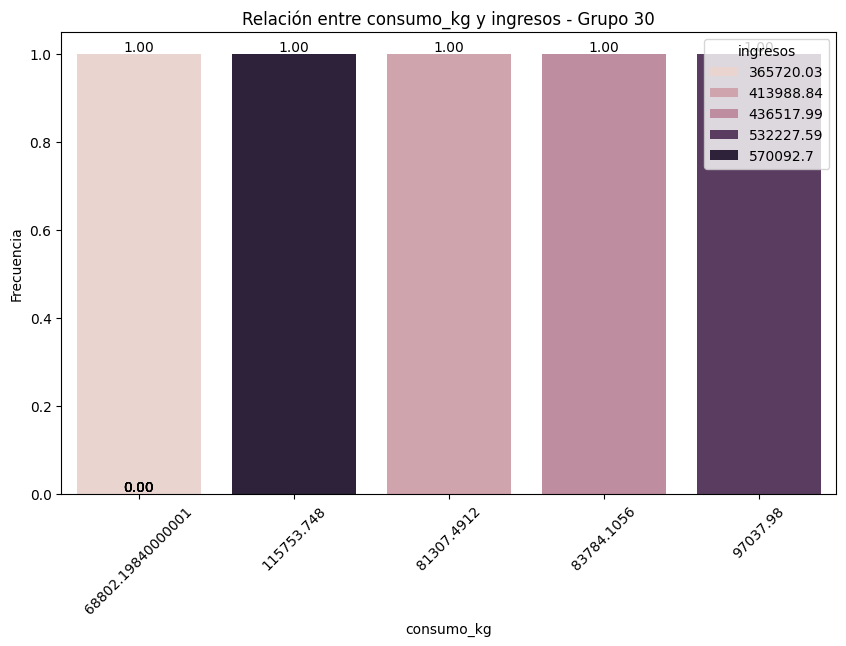

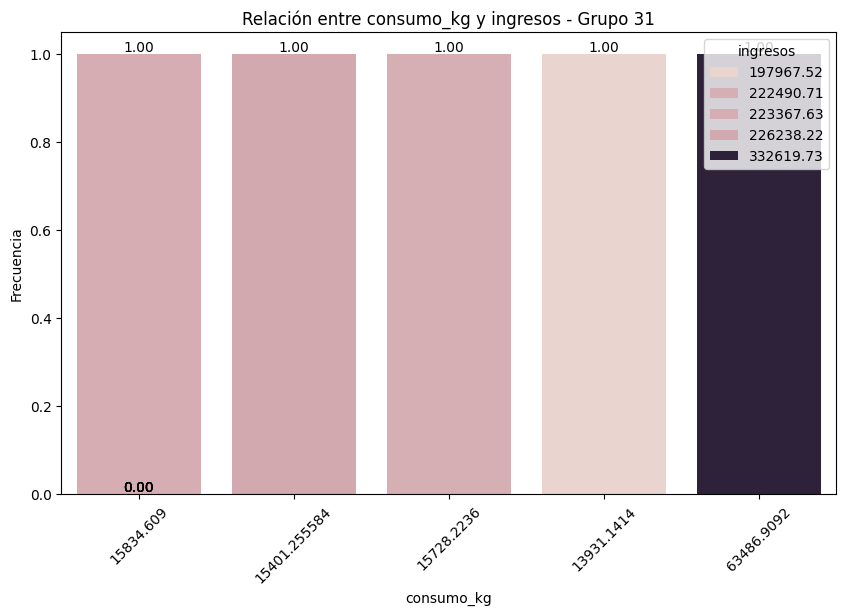

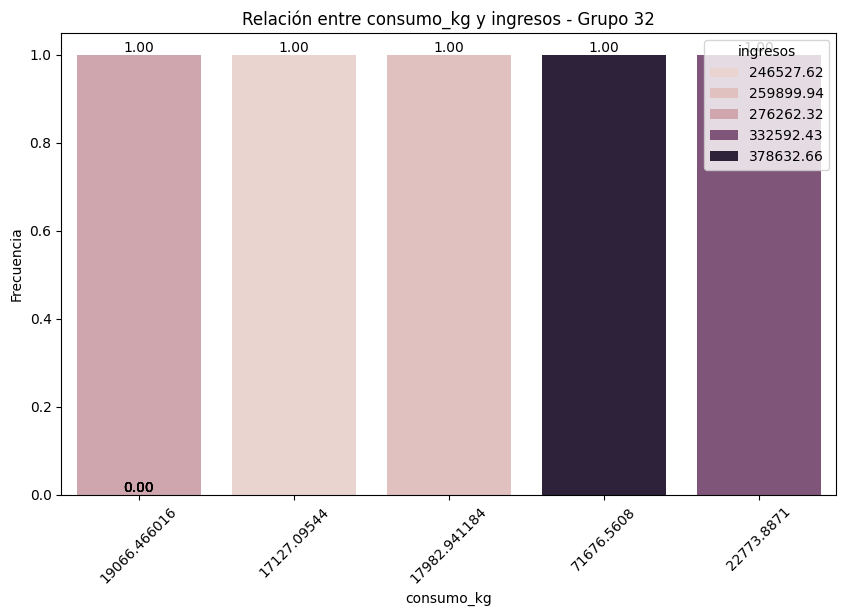

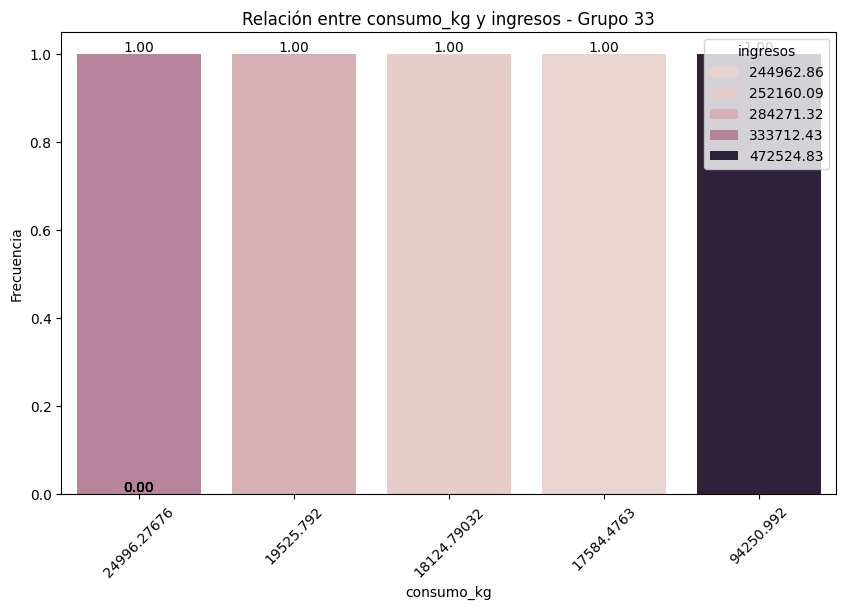

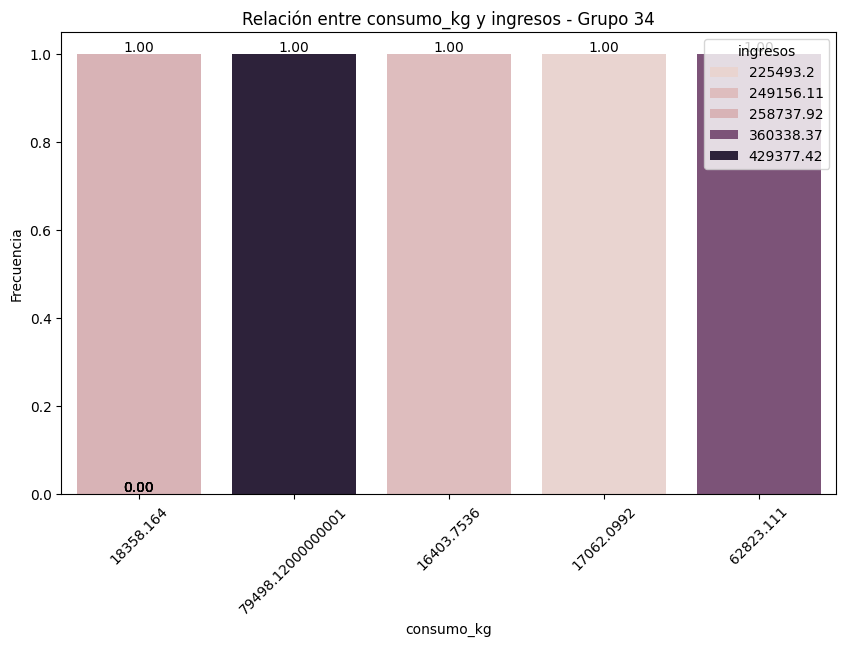

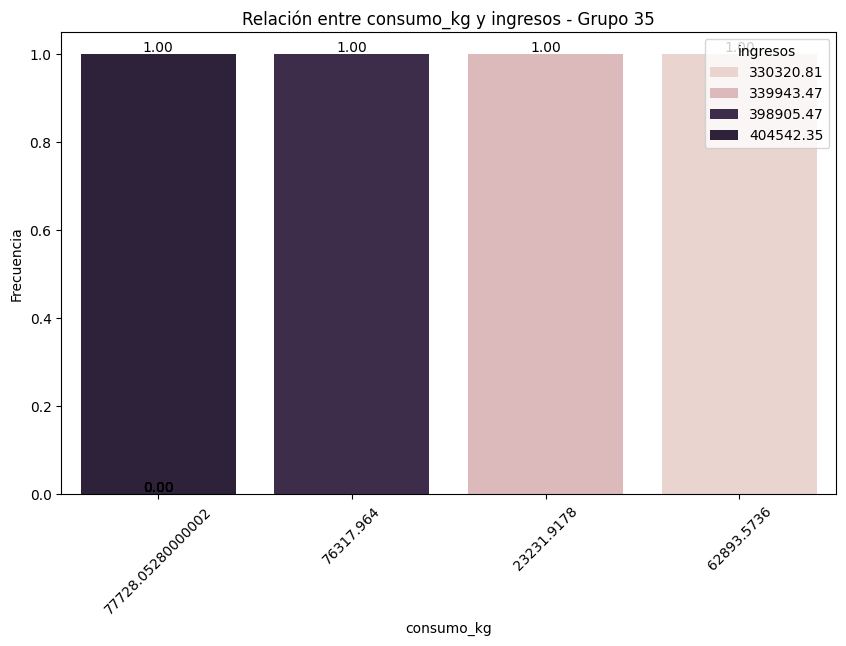

In [86]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.